# **PMR3401 - Mecânica Computacional - EP1**
-----------------------------------------

### Rodrigo Gebara Reis - NUSP: 11819880

### Victor Rocha da Silva - NUSP: 11223782
-----------------

### Bibliotecas em Geral

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%matplotlib inline

----------------

## **1. Parte 1** 

*(Adaptado do enunciado)* Um carro com velocidade $v = 50\textrm{ km/h}$ (constante) entra repentinamente numa estrada de terra sinuosa (figura 1). O virabrequim do carro, que possui um raio de giro $r = 0,045$ m e uma massa $m_e = 20$ kg, gira a $f_e = 2100$ rpm (constante). O ponto $C$ representa o centro de massa do carro. Os graus de liberdade $x(t)$ e $\theta(t)$ são utilizados para descrever o movimento do carro.

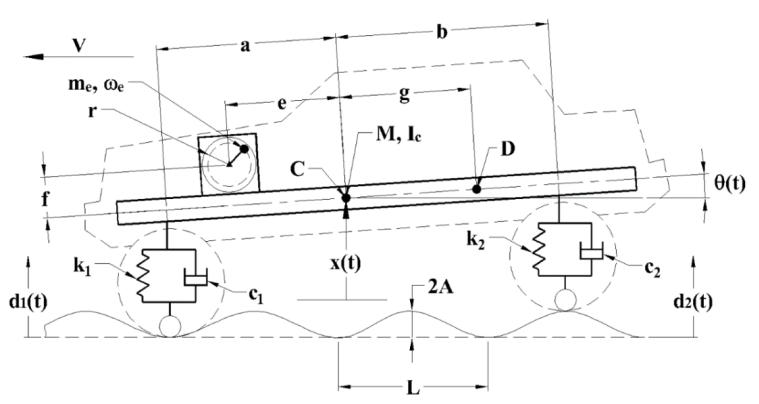

Na imagem, são apresentados:
- $d_1(t)$ e $d_2(t)$ são os movimentos de entrada impostos nos pneus dianteiro e traseiro do carro, respectivamente;
- $M$ é a massa do carro;
- $I_c$ é o momento de inércia do carro;
- $k_1$ e $k_2$ indicam as respectivas constantes de mola das suspensões dianteira e traseira, incluindo a rigidez dos pneus;
- $c_1$ e $c_2$ indicam as respectivas constantes de amortecimento das suspensões dianteira e traseira;
- $a$ e $b$ são as respectivas distâncias entre os pontos de apoio das suspensões dianteira e traseira;
- $F_n = m_e\omega_e^2r$ é a força transmitida pelo virabrequim à estrutura;
- $e$ e $f$ são as distâncias do eixo do virabrequim ao centro de massa C.

Considera-se também que as funções $d_1(t)$ e $d_2(t)$ ocorrem ao mesmo tempo.

**Nota:** é interessante perceber que $F_n$ é uma força centrípeta de módulo constante, mas sua direção e sentido mudam com o tempo. Dessa forma, atua na direção do grau de liberdade $x$ apenas a componente vertical, dada por $(F_n)_x = F_n\sin(\omega_e t)$. Em termos de rotação, entretanto, as componentes vertical e horizontal geram torque em relação ao centro de massa $C$ do carro, com valores $F_n\sin(\omega_e t)\cdot e$ e $F_n\cos(\omega_e t)\cdot f$, no sentido negativo de $\theta$. Essas informações são cruciais para o equacionamento do movimento.


### **1.1 Item (A)**

-   Resolva as equações para $0 \leq 𝑡 \leq 4𝑠$ utilizando o Método de Runge-Kutta de 4ª ordem. Verifique a influência do passo "$\Delta𝑡$" sobre a solução. Escolha três passos diferentes (pequeno, médio e grande). Em que aspectos você vai verificar essa influência? Por quê?

-   Para cada item e valor de "$\Delta𝑡$" plote $\theta$, $\dot{\theta}$, $\ddot{\theta}$ num mesmo gráfico e $x$, $\dot{x}$, $\ddot{x}$ num mesmo
gráfico em função de $t$. Utilize escalas diferentes na plotagem de $\theta$, $\dot{\theta}$, $\ddot{\theta}$, $x$, $\dot{x}$, $\ddot{x}$ de forma que todos os gráficos apareçam.

### **1.1.1 Definindo constantes no SI**

No enunciado do Exercício Programa, foi dada uma tabela com as constantes pertinentes ao problema. Contudo, nem todas estavam em unidades do Sistema Internacional. Sendo assim, foram realizadas as transformações necessárias na célula abaixo.

In [2]:
# Constantes do enunciado no SI
v = 50/3.6 # 50 km/h
r = 0.045  
m_e = 20   
f_e = 2100/60 # 2100 rpm
w_e = 2*np.pi*f_e # velocidade (frequência) angular, rad/s

# Constantes do problema no SI
M = 1783
k1 = 2.8*10**7
k2 = 2.8*10**7
c1 = 3*10**4
c2 = 3*10**4
a = 1220*10**(-3)
b = 1500*10**(-3)
I_c = 4000
e = 0.75
L = 0.5
A = 60*10**(-3)
f = 0.35

# Condições iniciais do movimento
x0 = 0
xdot0 = 0
th0 = 0.09
thdot0 = 0

F_n = m_e*(w_e)**2*r # Forca transmitida a estrutura pelo virabrequim

### **1.1.2 Movimentos de entrada nos pneus e suas derivadas**

Observando a figura 1, as funções de distância $d_1(t)$ e $d_2(t)$ são dadas por:

$$d_1(t) = \begin{cases}
                A(1-\cos\omega t),\, 0 < t < 2\textrm{ s}\\
                0,\, t > 2\textrm{ s}
           \end{cases}$$

$$d_2(t) = \begin{cases}
                A(1+\cos\omega t),\, 0 < t < 2\textrm{ s}\\
                0,\, t > 2\textrm{ s}
           \end{cases}$$

Note que estão defasadas de meio período. Para definição completa, entretanto, é necessário conhecer $\omega$. Observando a figura ADICIONAR FIGURA DO ENUNCIADO!!!!!, percebe-se que o carro percorre uma distância $L$ em um período $T$, a uma velocidade constante de $v = 50\textrm{ km/h}$. Dessa forma, temos:

$$V = \frac{L}{T} \Leftrightarrow T = \frac{L}{v}$$

$$\omega = \frac{2\pi}{T} \Rightarrow \omega = \frac{2\pi}{L/v}$$

In [3]:
w = 2*np.pi/(L/v) # Frequencia de oscilacao do movimento de entrada nos pneus

Conhecendo agora as funções $d_1(t)$ e $d_2(t)$, definimos em código:

In [4]:
# Movimentos de entrada nos pneus
def d1(t):
    if (0 < t < 2):
        result = A*(1-np.cos(w*t))
    else:
        result = 0
    return result

def d2(t):
    if (0 < t < 2):
        result = A*(1+np.cos(w*t))
    else:
        result = 0
    return result

Dadas as formulações para as funções, e dado que não são definidas para $t=0$ e $t=2$, pode-se derivá-las em cada um dos intervalos pertinentes, isto é:

$$\dot{d_1}(t) = \begin{cases}
                \omega A\sin(\omega t),\, 0 < t < 2\textrm{ s}\\
                0,\, t > 2\textrm{ s}
           \end{cases}$$

$$\dot{d_2}(t) = \begin{cases}
                -\omega A\sin(\omega t),\, 0 < t < 2\textrm{ s}\\
                0,\, t > 2\textrm{ s}
           \end{cases}$$

Ambas são declaradas na célula abaixo.

In [5]:

def d1dot(t):
    if (0 < t < 2):
        result = A*w*np.sin(w*t)
    else:
        result = 0
    return result

def d2dot(t):
    if (0 < t < 2):
        result = -A*w*np.sin(w*t)
    else:
        result = 0
    return result

### **1.1.3 Criando o algoritmo RK4**

Para um sistema tal que:
$$[Y] = \begin{bmatrix}
            y_1\\
            y_2\\
            \vdots\\
            y_n
        \end{bmatrix},\, \frac{d}{dt}[Y] = [f(t, y_1, \dots, y_n)] = [f(t, [Y])],$$

o método de Runge-Kutta de 4ª ordem clássico é dado por:

$$[Y]_{i+1} = [Y]_i + \frac{h}{6}([K_1]+2[K_2]+2[K_3]+[K_4]),$$

$$[K_1] = [f(t_i, [Y_i])]$$
$$[K_2] = \left[f\left(t_i+\frac{h}{2}, [Y_i]+\frac{h}{2}[K_1]\right)\right]$$
$$[K_3] = \left[f\left(t_i+\frac{h}{2}, [Y_i]+\frac{h}{2}[K_2]\right)\right]$$
$$[K_4] = [f\left(t_i+h, [Y_i]+h[K_3]\right)]$$

Aqui, pressupõe-se condição inicial conhecida $[Y]_0$, e passo definido $h$.

Note que é necessário que o vetor $\frac{d}{dt}[Y]$ contenha apenas derivadas de primeira ordem, isto é, que as equações estejam no formato de espaço de estados. Com isso, define-se a função ``rk4``, que soluciona um sistema nesse formato. Ela recebe como entrada o sistema de equaões, os instantes inicial ($x_0$) e final ($x_f$), as condições iniciais das variáveis e o passo $h$. Retorna a discretização utilizada do intervalo $[x_0,\,x_f]$, e os vetores solução $[Y]$.

Para este caso, há uma peculiaridade: as equações do problema proposto são de segunda ordem, e, portanto, fazendo com que:

$$[Y] = \begin{bmatrix}
            x\\
            \dot{x}\\
            \theta\\
            \dot{\theta}
        \end{bmatrix}$$

os elementos de índice par (ímpar na programação) são as derivadas das outras variáveis. Para melhor análise posteriormente, é interessante também calcular os valores das derivadas segundas, ou seja, das derivadas dos elementos de índice par. Isso é realizado calculando o valor de $f[(t, [Y])]$ nessas variáveis.


In [6]:
def rk4(f, y_0, x_0, x_f, h):
    """
    Algoritmo Runge Kutta de 4a ordem para resolver um sistema de EDOs na forma de espaço de estados.
    Essa funcao tambem retorna as segundas derivadas das variaveis envolvidas no problema.
     Entradas:
        f       -  sistema de equacoes
        y_0     -  condicoes inicias (vetor)
        x_0     -  instante inicial
        x_f     -  instante final
        h       -  passo
    Saidas:
        x       -  discretização (vetor)
        y       -  solucao neste intervalo (vetor)
        ydotdot -  derivada segunda das variaveis (vetor)
    """
    
    x = np.arange(x_0,x_f,h)
    n = len(x)
    y = np.zeros((n, len(y_0)))
    y[0] = y_0
    
    ydotdot = np.zeros((n, len(y_0)//2))
    
    for i in range(n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + (h/2)*k1)
        k3 = f(x[i] + h/2, y[i] + (h/2)*k2)
        k4 = f(x[i] + h, y[i] + h*k3)
        
        y[i + 1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        ydotdot[i+1,:] = f(x[i]+h, y[i,:])[1::2]  # Extrai as derivadas segundas (idx impar)
    
    return x, y, ydotdot # Retorna o intervalo e a solucao

### **1.1.4 Definindo o sistema de EDOs**

As equações que descrevem o movimento em questão são trivialmente (analisar deformação das molas e amortecedores, calcular torque em relação ao centro de massa do carro) dadas por:

$$
\begin{cases}
    M\ddot{x} = -k_1[x-a\theta -d_1(t)]-k_2[x+b\theta-d_2(t)]-c_1[\dot{x}-a\dot{\theta}-\dot{d}_1(t)]-c_2[\dot{x}+b\dot{\theta}-\dot{d}_2(t)]+F_n\sin(\omega_et)\\
    I_c\ddot{\theta} = k_1[x-a\theta -d_1(t)]a-k_2[x+b\theta-d_2(t)]b+c_1[\dot{x}-a\dot{\theta}-\dot{d}_1(t)]a-c_2[\dot{x}+b\dot{\theta}-\dot{d}_2(t)]b-F_n\sin(\omega_et)e-F_n\cos(\omega_et)f
\end{cases}$$

Sendo assim, organiza-se no formato de espaço de estados como:

$$
\frac{d}{dt}\begin{bmatrix}
                x\\
                \dot{x}\\
                \theta\\
                \dot{\theta}
            \end{bmatrix} = \frac{d}{dt}\begin{bmatrix}
                                y_1\\
                                y_2\\
                                y_3\\
                                y_4
                            \end{bmatrix}

                = [f(t, [Y])] = \frac{d}{dt}\begin{bmatrix}
                                    y_2\\
                                    \frac{1}{M}\{-k_1[y_1-ay_3 -d_1(t)]-k_2[y_1+by_3-d_2(t)]-c_1[y_2-ay_4-\dot{d}_1(t)]-c_2[y_2+by_4-\dot{d}_2(t)]+F_n\sin(\omega_et)\}\\
                                    y_4\\
                                    \frac{1}{I_c}\{k_1[y_1-ay_3 -d_1(t)]a-k_2[y_1+by_3-d_2(t)]b+c_1[y_2-ay_4-\dot{d}_1(t)]a-c_2[y_2+by_4-\dot{d}_2(t)]b-F_n\sin(\omega_et)e-F_n\cos(\omega_et)f\}
                                \end{bmatrix}
$$


Isso está explicitado na célula abaixo.

In [7]:
""""
Na declaracao em espaco de estados do sistema, a ordem das equacoes apresentadas deve obrigatoriamente estar 
como primeira derivada da variavel (idx par) - segunda derivada da variavel (idx impar) como no exemplo abaixo:
def f(t, y):
    dydt = np.zeros(4)
    dydt[0] = y[1]    # y[0] = x, y[1] = x'
    dydt[1] = -y[0]   # x'' = -x
    dydt[2] = y[3]    # y[2] = y, y[3] = y'
    dydt[3] = -y[2]   # y'' = -y
    return dydt
"""
# Espaco de estados no sistema de equações (y = [x, xdot, th, thdot])
def fxdot(t, y):
    dydt = np.zeros(4)
    dydt[0] = y[1]
    dydt[1] = (-k1*(y[0]-a*y[2]-d1(t))-k2*(y[0]+b*y[2]-d2(t))-c1*(y[1]-a*y[3]-
               d1dot(t))-c2*(y[1]+b*y[3]-d2dot(t))+F_n*np.sin(w_e*t))/M
    dydt[2] = y[3]
    dydt[3] = (k1*(y[0]-a*y[2]-d1(t))*a-k2*(y[0]+b*y[2]-d2(t))*b+c1*(y[1]-a*y[3]-
               d1dot(t))*a-c2*(y[1]+b*y[3]-d2dot(t))*b-F_n*np.sin(w_e*t)*e-
               F_n*np.cos(w_e*t)*f)/I_c
    return dydt

### **1.1.5 Condições Iniciais e Intervalo de Interesse**

Pelo enunciado, deve-se resolver as equações para o intervalo $t\in[0,\,4]$, fazendo uso do método RK4 clássico implementado acima. Para isso, as condições iniciais (já definidas na seção 1.1.1) são formatadas no vetor $[Y]_0$:

In [8]:
y0 = [x0, xdot0, th0, thdot0] # Condicoes iniciais

# Intervalo de interesse
t0 = 0.0
tf = 4.0

Para análise da solução, são utilizados três passos de diferentes magnitudes. Foram escolhidos:
- Passo grande: $h = 0.01$
- Passo médio: $h = 0.001$
- Passo pequeno: $h = 0.0001$


Note que cada um é 10 vezes menor do que o anterior. Isso leva a distintas soluções, que serão comparadas após a execução de cada uma. Em todos os casos, foram plotados dois gráficos: o primeiro, com $x$, $\dot{x}$ e $\ddot{x}$, e o segundo, com $\theta$, $\dot{\theta}$ e $\ddot{\theta}$.

### **1.1.6 Passo Grande $(h=0.01)$**

In [9]:
dt = 0.01
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

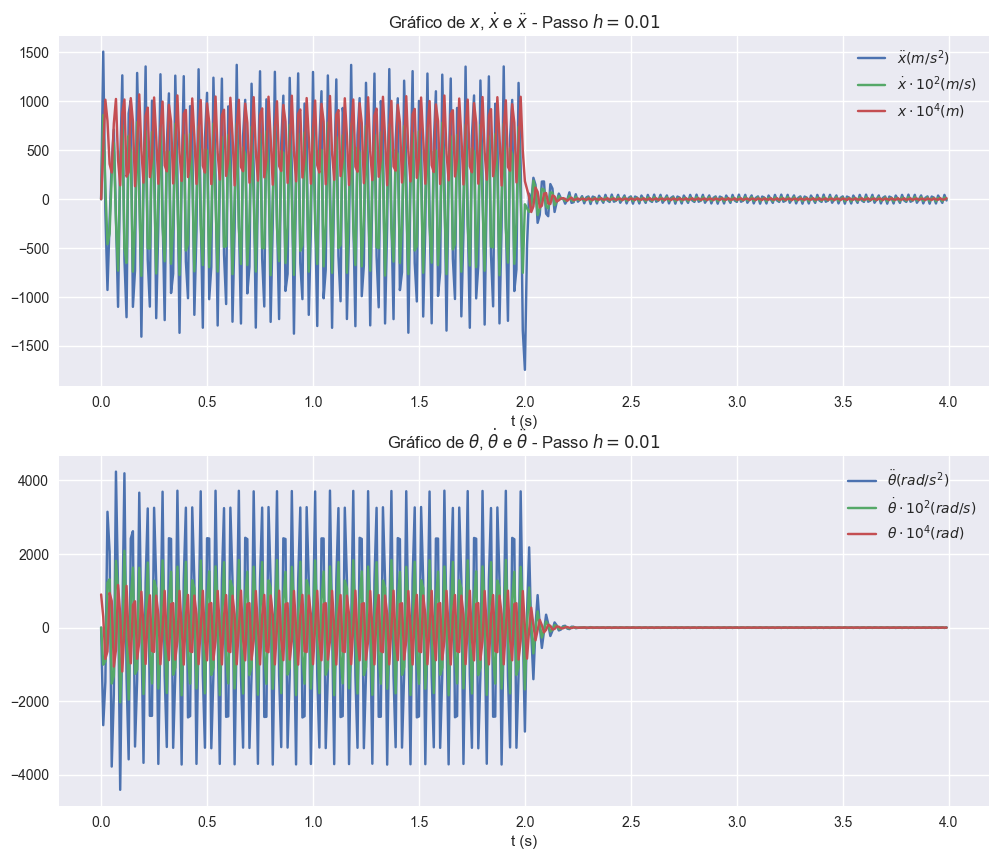

In [10]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - Passo $h=0.01$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - Passo $h=0.01$')
plt.legend()

plt.show()

### **1.1.7 Passo Médio $(h=0.001)$**

In [11]:
dt = 0.001
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

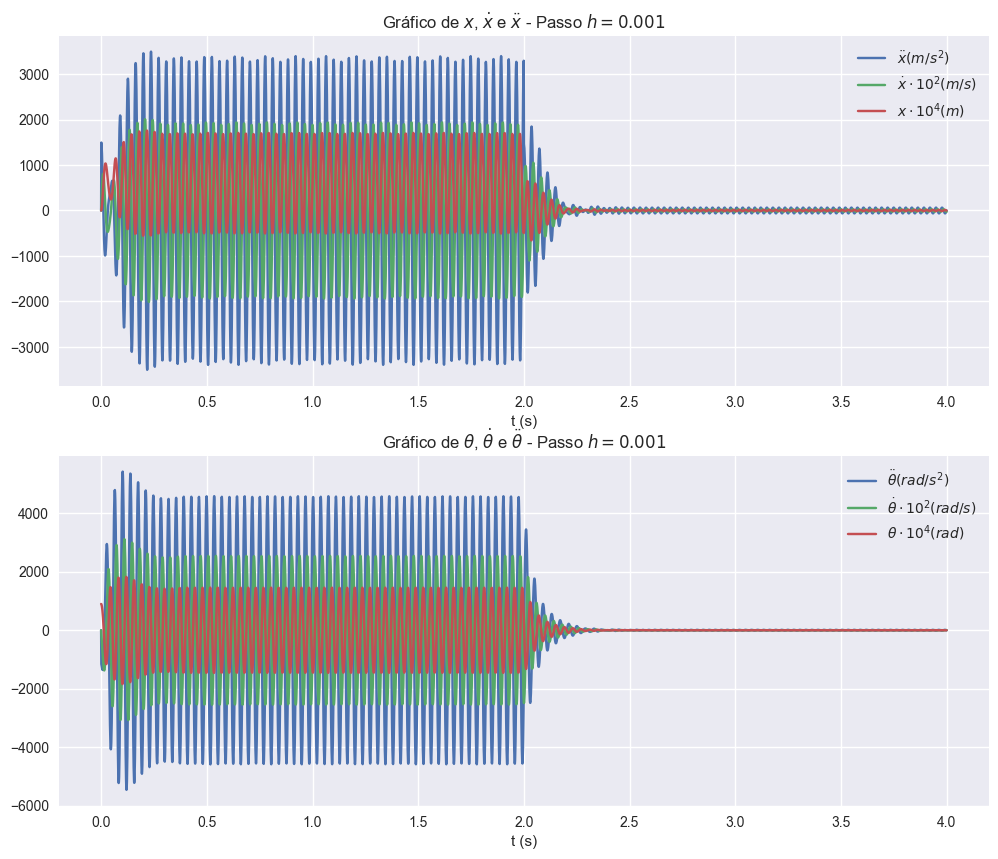

In [12]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - Passo $h=0.001$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - Passo $h=0.001$')
plt.legend()

plt.show()

### **1.1.8 Passo Pequeno $(h=0.0001)$**

In [13]:
dt = 0.0001
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

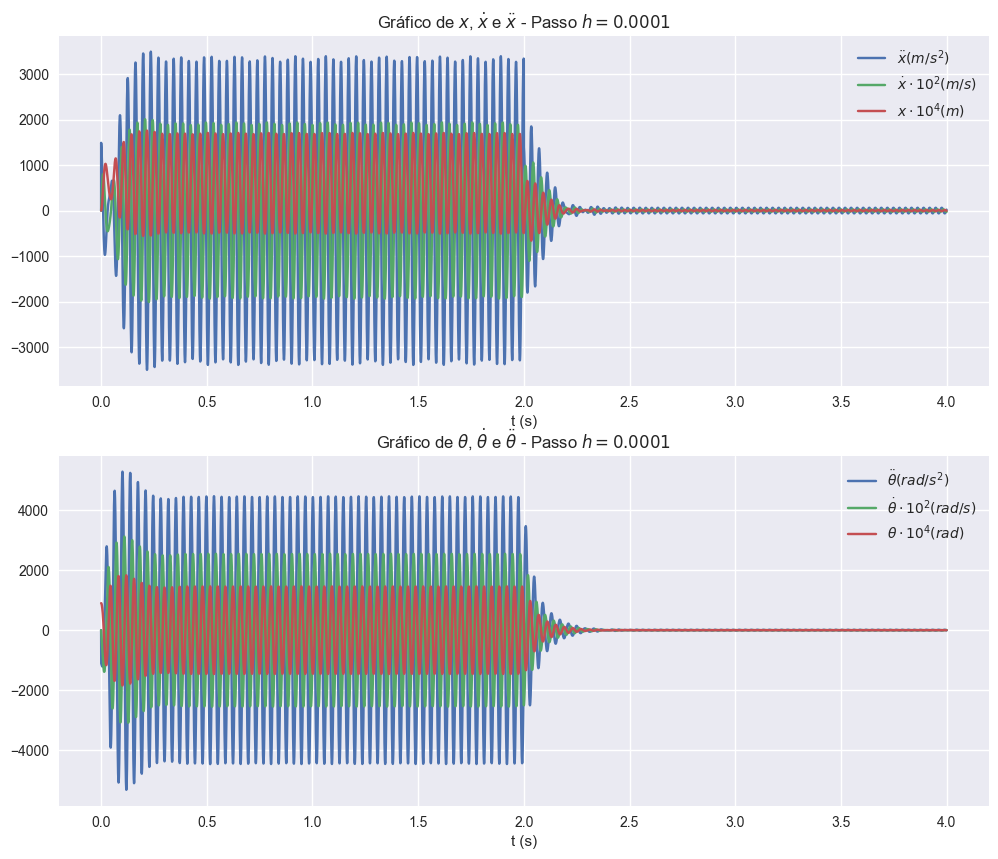

In [14]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - Passo $h=0.0001$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - Passo $h=0.0001$')
plt.legend()

plt.show()

### **1.1.9 Conclusões**

O tamanho do passo ($\Delta t$) no Método de Runge-Kutta de 4ª ordem tem um impacto significativo na solução de uma equação diferencial. Existem várias considerações a serem feitas em relação ao tamanho do passo para obter uma solução precisa, eficiente e numericamente estável.

Em primeiro lugar, um passo menor ($\Delta t$) geralmente resulta em uma solução mais precisa. Isso ocorre porque um passo menor permite que o método faça uma aproximação mais detalhada da curva da solução. Isso é particularmente importante para equações com comportamentos complexos ou situações em que a precisão é crucial. Além disso, o Método de Runge-Kutta de 4ª ordem possui um erro de truncamento local de ordem $O(\Delta t^5)$. Portanto, reduzir o tamanho do passo ($\Delta t$) leva a uma redução significativa no erro de truncamento, resultando em uma solução mais precisa, especialmente quando a função $y$ possui derivadas de alta ordem ou quando a solução precisa ser calculada com alta precisão.

Além disso, o comportamento da função também desempenha um papel na escolha do tamanho do passo. Se a função varia rapidamente em um intervalo específico ou possui pontos de descontinuidade, um passo pequeno ($\Delta t$) é necessário para capturar com precisão essas variações. Caso contrário, o Método de Runge-Kutta pode "saltar" sobre as mudanças rápidas ou não conseguir lidar adequadamente com as descontinuidades, resultando em uma solução imprecisa ou instável. No entanto, é importante considerar a eficiência computacional ao escolher o tamanho do passo. Reduzir o tamanho do passo ($\Delta t$) aumenta o número de iterações necessárias para percorrer um determinado intervalo de tempo, o que pode resultar em um tempo de processamento mais longo. Portanto, em problemas onde a precisão não é crítica e a eficiência é importante, é possível escolher um passo menor para obter uma solução aproximada suficientemente boa, reduzindo o tempo de cálculo.

Por fim, a estabilidade numérica também é uma consideração essencial. Para algumas equações diferenciais, especialmente aquelas que envolvem oscilações ou crescimento/decrescimento exponenciais, um passo muito grande pode fazer com que o Método de Runge-Kutta se torne instável. Nesses casos, é necessário reduzir o tamanho do passo para garantir a estabilidade numérica do método e evitar soluções que divergem ou oscilam de maneira incontrolável.

----------------

### **1.2 Parte 1 - (B)**

- Resolva as equações novamente com passo apropriado e plote como
indicado no item anterior, considerando:


#### $(i)$ Mesmas constantes da figura, mas $V$ = {$30 \, km/h$ ; $70 \, km/h$}.

Vamos utilizar um passo apropriado de $\Delta t=0.0001s$ para obter resultados satisfatórios:

In [15]:
dt=0.0001

In [16]:
# Constantes do enunciado no SI
v = 30/3.6
r = 0.045
m_e = 20
f_e = 2100/60
w_e = 2*np.pi*f_e

# Constantes do problema no SI
M = 1783
k1 = 2.8*10**7
k2 = 2.8*10**7
c1 = 3*10**4
c2 = 3*10**4
a = 1220*10**(-3)
b = 1500*10**(-3)
I_c = 4000
e = 0.75
th0 = 0.09
L = 0.5
A = 60*10**(-3)
f = 0.35
x0 = 0
xdot0 = 0
thdot0 = 0

F_n = m_e*(w_e)**2*r # Forca transmitida a estrutura pelo virabrequim

w = 2*np.pi/(L/v) # Frequencia de oscilacao do movimento de entrada nos pneus

In [17]:
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

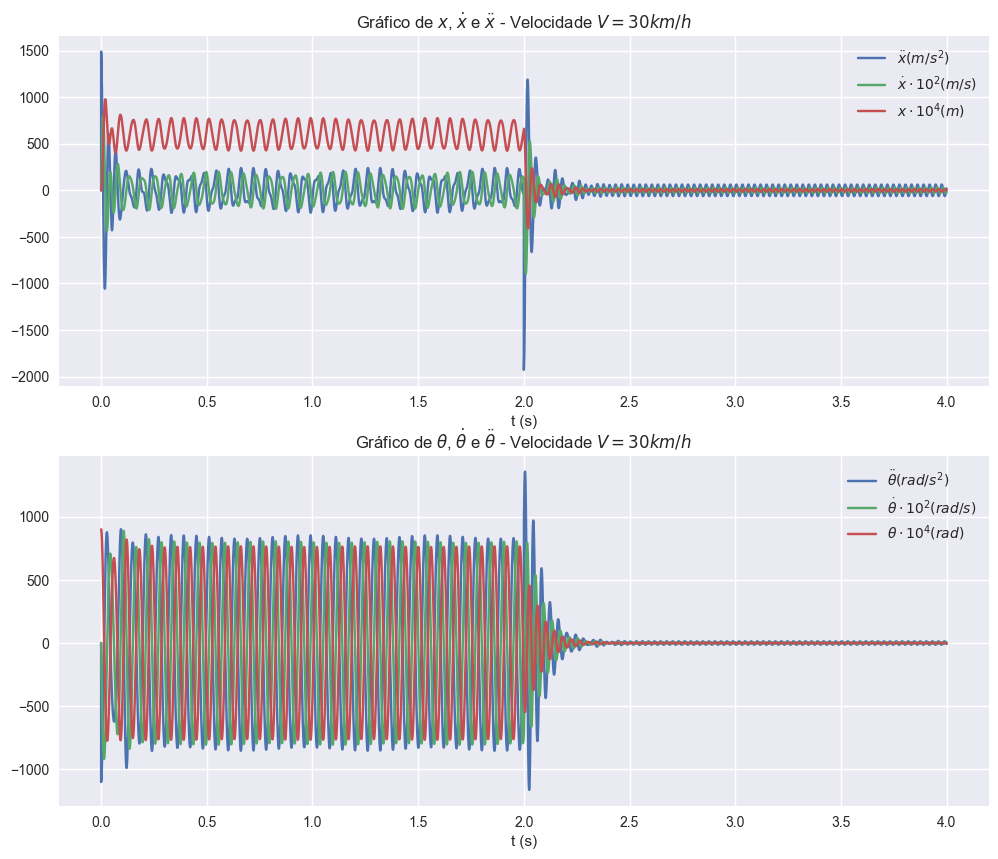

In [18]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - Velocidade $V=30km/h$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - Velocidade $V=30km/h$')
plt.legend()

plt.show()

In [19]:
# Constantes do enunciado no SI
v = 70/3.6
r = 0.045
m_e = 20
f_e = 2100/60
w_e = 2*np.pi*f_e

# Constantes do problema no SI
M = 1783
k1 = 2.8*10**7
k2 = 2.8*10**7
c1 = 3*10**4
c2 = 3*10**4
a = 1220*10**(-3)
b = 1500*10**(-3)
I_c = 4000
e = 0.75
th0 = 0.09
L = 0.5
A = 60*10**(-3)
f = 0.35
x0 = 0
xdot0 = 0
thdot0 = 0

F_n = m_e*(w_e)**2*r # Forca transmitida a estrutura pelo virabrequim

w = 2*np.pi/(L/v) # Frequencia de oscilacao do movimento de entrada nos pneus

In [20]:
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

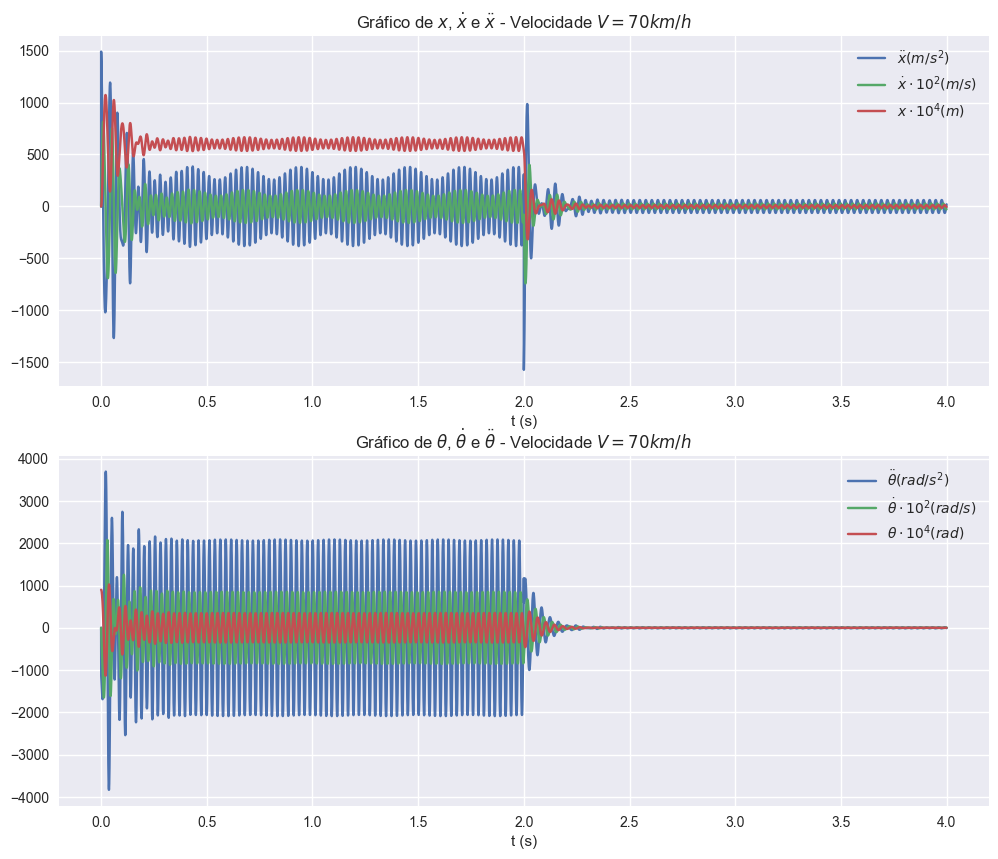

In [21]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - Velocidade $V=70km/h$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - Velocidade $V=70km/h$')
plt.legend()

plt.show()

#### Conclusões

A frequência angular $\omega$ das funções senoidais $d_1(t)$ e $d_2(t)$ de entrada nos pneus dianteiro e traseiro, respectivamente, é diretamente proporcional a velocidade $V$ do carro:

$$\omega = \frac{2\pi}{L/v}$$

Inicialmente, ao reduzir a velocidade do carro de $V=50 \, km/h$ para $V=30 \, km/h$, $\omega$ irá diminuir e o carro tende a oscilar sua posição $x(t)$ com frequência menor, justamente porque as entradas nos pneus oscilam de forma mais lenta. Essa diferença pode ser visualizada no gráfico. O mesmo ocorre para $\dot{x}(t)$ e $\ddot{x}(t)$.
Quanto à amplitude das oscilações, observa-se que também há uma diminuição em relação a $50 \, km/h$.

Posteriormente, ao aumentar a velocidade do carro de $V=50 \, km/h$ para $V=70 \, km/h$, $\omega$ irá aumentar e o carro tende a oscilar sua posição $x(t)$ com frequência maior, justamente porque as entradas nos pneus oscilam de forma mais rápida. Essa diferença pode ser visualizada no gráfico. O mesmo ocorre para $\dot{x}(t)$ e $\ddot{x}(t)$.
Quanto à amplitude, observa-se que também há uma diminuição em relação a $50 \, km/h$.

Comparando as velocidades de $V=30 \, km/h$ e $V=70 \, km/h$, podemos entender fisicamente que, o carro estando mais devagar, tende a "cair" em todos os vales da estrada de terra sinuosa (senoidal) de forma mais suave e com menor impacto. Por outro lado, em alta velocidade, o carro terá menos tempo para se ajustar às oscilações da estrada, resultando em oscilações mais rápidas e potencialmente com maior impacto.

Em resumo, ao reduzir a velocidade do carro, as oscilações ocorrerão em uma taxa mais lenta, resultando em uma menor frequência angular e menor amplitude. Por outro lado, ao aumentar a velocidade do carro, as oscilações ocorrerão em uma taxa mais rápida, resultando em uma maior frequência angular e menor amplitude. A velocidade do carro afeta tanto a frequência quanto a amplitude das oscilações, além de influenciar a forma como o carro interage com a estrada sinuosa.

Para a variável $\theta(t)$ que descreve a inclinação do carro em relação a horizontal, podemos concluir que uma velocidade menor tende a fazer esse ângulo variar mais com o tempo (mais instável), enquanto que uma velocidade maior provoca menores oscilações do ângulo, deixando o carro mais estável.
Repete-se a interpretação física dada acima de que o carro estando mais devagar tende a "cair" em todos os vales da estrada, ou seja, provavelmente, quando a roda dianteira do carro está num vale, a traseira estará em um pico, gerando uma maior inclinação $\theta$ em relação a horizontal, enquanto para velocidades maiores, é como se o carro "pulasse" os vales da estrada (por estar deslocando-se mais rápido), o que gera uma inclinação $\theta$ menor em relação a horizontal.

É importante ressaltar que essas conclusões são baseadas nas informações fornecidas no problema e nas relações matemáticas estabelecidas, mas principalmente nos resultados gráficos obtidos.

---------------

#### $(ii)$ $c_1$ = $c_2$ = {$10^3;\, 5 \cdot 10^4;\, 2,5 \cdot 10^5$} $kg/s$. Demais constantes permanecem inalteradas.

In [22]:
# Constantes do enunciado no SI
v = 50/3.6
r = 0.045
m_e = 20
f_e = 2100/60
w_e = 2*np.pi*f_e

# Constantes do problema no SI
M = 1783
k1 = 2.8*10**7
k2 = 2.8*10**7
c1 = 1*10**3
c2 = 1*10**3
a = 1220*10**(-3)
b = 1500*10**(-3)
I_c = 4000
e = 0.75
th0 = 0.09
L = 0.5
A = 60*10**(-3)
f = 0.35
x0 = 0
xdot0 = 0
thdot0 = 0

F_n = m_e*(w_e)**2*r # Forca transmitida a estrutura pelo virabrequim

w = 2*np.pi/(L/v) # Frequencia de oscilacao do movimento de entrada nos pneus

In [23]:
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

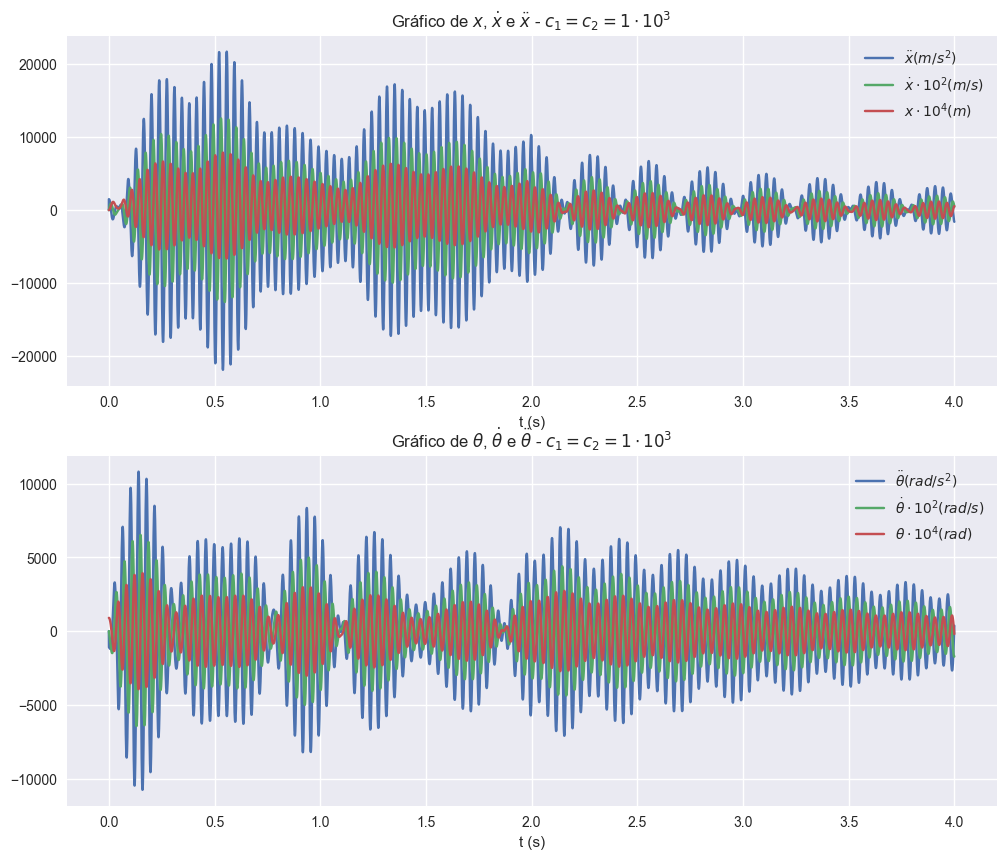

In [24]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - $c_1=c_2=1 \cdot 10^3$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - $c_1=c_2=1 \cdot 10^3$')
plt.legend()

plt.show()

In [25]:
# Constantes do enunciado no SI
v = 50/3.6
r = 0.045
m_e = 20
f_e = 2100/60
w_e = 2*np.pi*f_e

# Constantes do problema no SI
M = 1783
k1 = 2.8*10**7
k2 = 2.8*10**7
c1 = 5*10**4
c2 = 5*10**4
a = 1220*10**(-3)
b = 1500*10**(-3)
I_c = 4000
e = 0.75
th0 = 0.09
L = 0.5
A = 60*10**(-3)
f = 0.35
x0 = 0
xdot0 = 0
thdot0 = 0

F_n = m_e*(w_e)**2*r # Forca transmitida a estrutura pelo virabrequim

w = 2*np.pi/(L/v) # Frequencia de oscilacao do movimento de entrada nos pneus

In [26]:
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

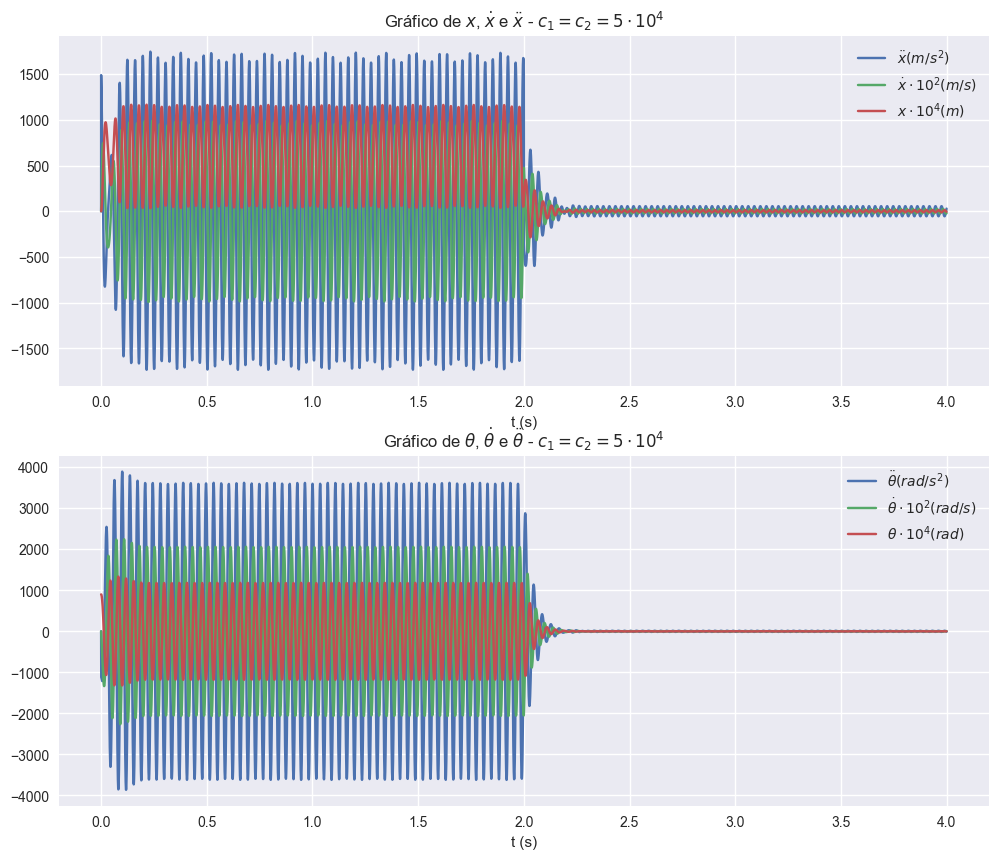

In [27]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - $c_1=c_2=5 \cdot 10^4$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - $c_1=c_2=5 \cdot 10^4$')
plt.legend()

plt.show()

In [28]:
# Constantes do enunciado no SI
v = 50/3.6
r = 0.045
m_e = 20
f_e = 2100/60
w_e = 2*np.pi*f_e

# Constantes do problema no SI
M = 1783
k1 = 2.8*10**7
k2 = 2.8*10**7
c1 = 2.5*10**5
c2 = 2.5*10**5
a = 1220*10**(-3)
b = 1500*10**(-3)
I_c = 4000
e = 0.75
th0 = 0.09
L = 0.5
A = 60*10**(-3)
f = 0.35
x0 = 0
xdot0 = 0
thdot0 = 0

F_n = m_e*(w_e)**2*r # Forca transmitida a estrutura pelo virabrequim

w = 2*np.pi/(L/v) # Frequencia de oscilacao do movimento de entrada nos pneus

In [29]:
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

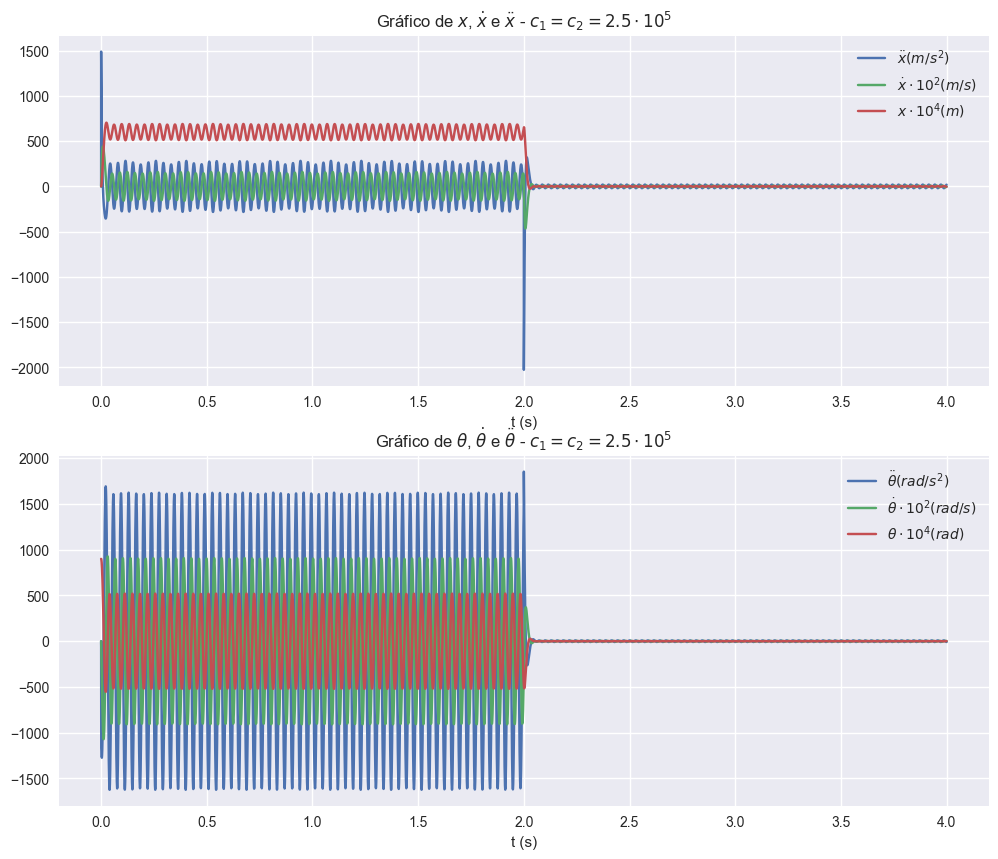

In [30]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - $c_1=c_2=2.5 \cdot 10^5$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - $c_1=c_2=2.5 \cdot 10^5$')
plt.legend()

#### Conclusões

Observando os gráficos obtidos, conclui-se que, quanto mais aumenta-se o valor dos amortecimentos $c_1$ e $c_2$, menor fica a oscilação em $x$ e $\theta$. Isso é esperado, pois o amortecimento é responsável por dissipar energia do sistema. 

O valor inicial é de $c_1 = c_2 = 3\cdot 10^4\, kg/s$. Aumentando-se em 66%, para $5\cdot 10^4$, nota-se que a amplitude de $x$ diminui em quase 50% (de aproximadamente 0,21m para 0,12). A velocidade também é reduzida drasticamente.

No próximo caso, aumenta-se em quase 10 vezes o valor inicial, para tal que $c_1=c_2=2,2.5\cdot 10^5\, kg/s$. Nesse caso, a amplitude de $x$ é reduzida em 88% (de aproximadamente 0,21m para 0,025m). Percebe-se também o mesmo efeito na velocidade.

Já para quando o amortecimento é reduzido para $10^3$, o inverso acontece: a amplitude de $x$ e $\theta$ aumenta drasticamente, para quase 10 vezes o valor base.

Além disso, é interessante notar que, mesmo após os 2 segundos em que ocorrem $d_1(t)$ e $d_2(t)$, o sistema continua oscilando. Contudo, à medida que se aumenta o amortecimento, essa oscilação remanescente é dissipada cada vez mais rápido. Isso é confirmado pelos picos nos gráficos de $\ddot{x}$ e $\ddot{\theta}$, para $t = 2s$, que aumentam, em módulo, para maiores valores de $c_1 = c_2$, o que prova que a posição é restaurada rapidamente após o fim das perturbações.

Finalmente, pode-se observar os gráficos de $\theta$. Variações nesse ângulo correspondem a variações na inclinação do veículo, isto é, quanto menor a amplitude, mais estável fica o carro ao longo das perturbações impostas. Com o aumento do amortecimento, o módulo dessa amplitude fica cada vez menor, e tem-se o mesmo efeito dissipação da oscilação remanescente após $t=2s$.

------------

#### $(iii)$ $k_1$ = $k_2$ = {$2 \cdot 10^4;\, 5 \cdot 10^6;\, 7 \cdot 10^8$} $N/m$. Demais constantes permanecem inalteradas.

In [31]:
# Constantes do enunciado no SI
v = 50/3.6
r = 0.045
m_e = 20
f_e = 2100/60
w_e = 2*np.pi*f_e

# Constantes do problema no SI
M = 1783
k1 = 2*10**4
k2 = 2*10**4
c1 = 3*10**4
c2 = 3*10**4
a = 1220*10**(-3)
b = 1500*10**(-3)
I_c = 4000
e = 0.75
th0 = 0.09
L = 0.5
A = 60*10**(-3)
f = 0.35
x0 = 0
xdot0 = 0
thdot0 = 0

F_n = m_e*(w_e)**2*r # Forca transmitida a estrutura pelo virabrequim

w = 2*np.pi/(L/v) # Frequencia de oscilacao do movimento de entrada nos pneus

In [32]:
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

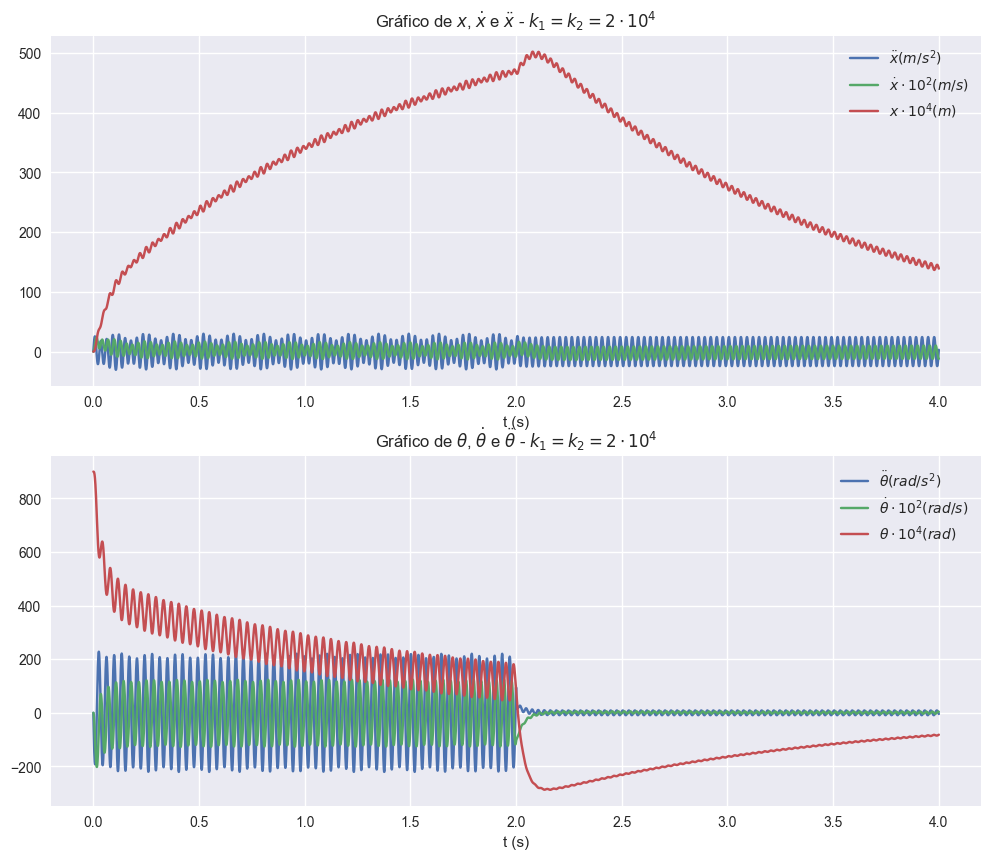

In [33]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - $k_1=k_2=2 \cdot 10^4$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - $k_1=k_2=2 \cdot 10^4$')
plt.legend()

In [34]:
# Constantes do enunciado no SI
v = 50/3.6
r = 0.045
m_e = 20
f_e = 2100/60
w_e = 2*np.pi*f_e

# Constantes do problema no SI
M = 1783
k1 = 5*10**6
k2 = 5*10**6
c1 = 3*10**4
c2 = 3*10**4
a = 1220*10**(-3)
b = 1500*10**(-3)
I_c = 4000
e = 0.75
th0 = 0.09
L = 0.5
A = 60*10**(-3)
f = 0.35
x0 = 0
xdot0 = 0
thdot0 = 0

F_n = m_e*(w_e)**2*r # Forca transmitida a estrutura pelo virabrequim

w = 2*np.pi/(L/v) # Frequencia de oscilacao do movimento de entrada nos pneus

In [35]:
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

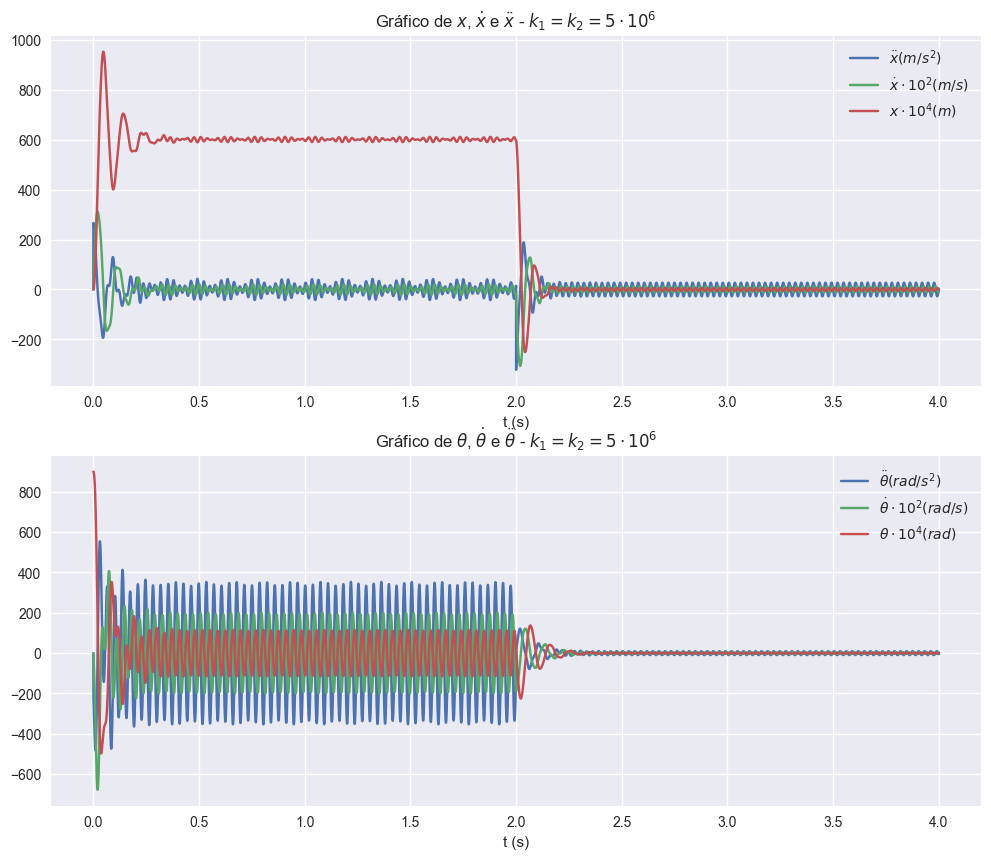

In [36]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - $k_1=k_2=5 \cdot 10^6$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - $k_1=k_2=5 \cdot 10^6$')
plt.legend()

In [37]:
# Constantes do enunciado no SI
v = 50/3.6
r = 0.045
m_e = 20
f_e = 2100/60
w_e = 2*np.pi*f_e

# Constantes do problema no SI
M = 1783
k1 = 7*10**8
k2 = 7*10**8
c1 = 3*10**4
c2 = 3*10**4
a = 1220*10**(-3)
b = 1500*10**(-3)
I_c = 4000
e = 0.75
th0 = 0.09
L = 0.5
A = 60*10**(-3)
f = 0.35
x0 = 0
xdot0 = 0
thdot0 = 0

F_n = m_e*(w_e)**2*r # Forca transmitida a estrutura pelo virabrequim

w = 2*np.pi/(L/v) # Frequencia de oscilacao do movimento de entrada nos pneus

In [38]:
t, y, ydotdot = rk4(fxdot, y0, t0, tf, dt)

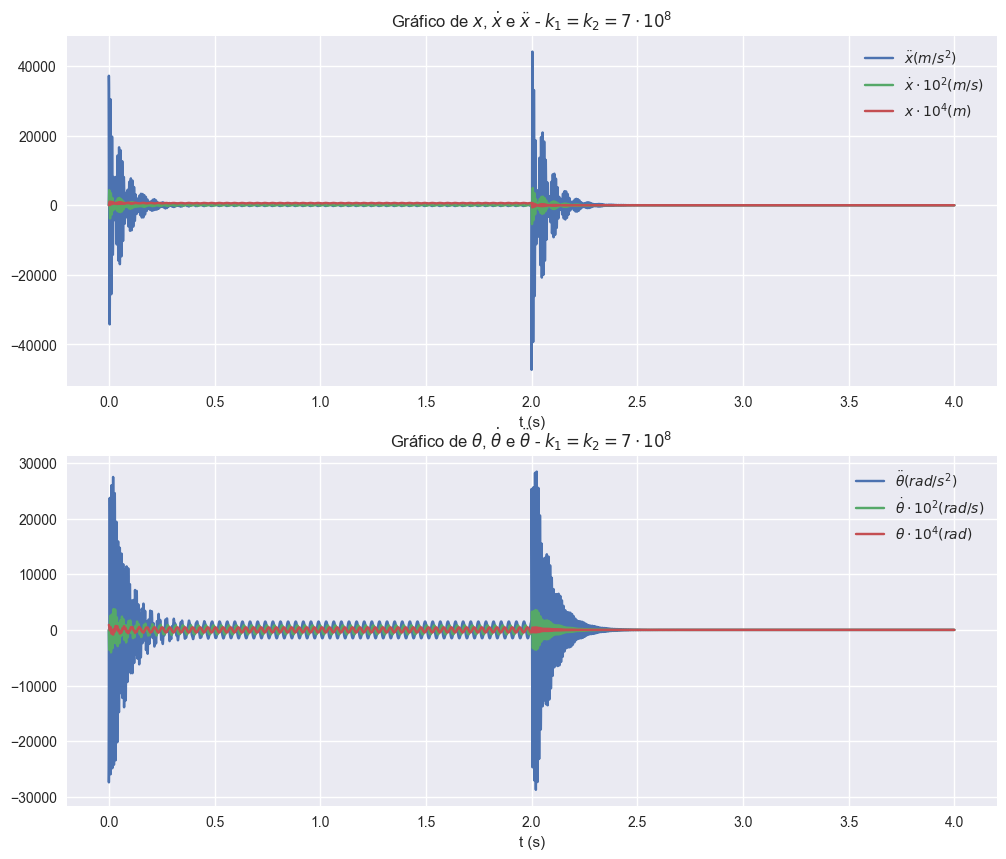

In [39]:
# Plotar os resultados de x
plt.figure(figsize = ((12, 10)))
plt.subplot(2, 1, 1)
plt.plot(t, ydotdot[:,0], label=r'$\ddot{x} (m/s^2)$')
plt.plot(t, y[:,1]*(10**2), label=r'$\dot{x} \cdot 10^2 (m/s)$')
plt.plot(t, y[:,0]*(10**4), label=r'$x \cdot 10^4 (m)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $x$, $\dot{x}$ e $\ddot{x}$ - $k_1=k_2=7 \cdot 10^8$')
plt.legend()

# Plotar os resultados de theta
plt.subplot(2, 1, 2)
plt.plot(t, ydotdot[:,1], label=r'$\ddot{\theta} (rad/s^2)$')
plt.plot(t, y[:,3]*(10**2), label=r'$\dot{\theta} \cdot 10^2 (rad/s)$')
plt.plot(t, y[:,2]*(10**4), label=r'$\theta \cdot 10^4 (rad)$')
plt.xlabel('t (s)')
plt.title(r'Gráfico de $\theta$, $\dot{\theta}$ e $\ddot{\theta}$ - $k_1=k_2=7 \cdot 10^8$')
plt.legend()

#### Conclusões

Para suspensões menos rígidas, isto é, com $k_1 = k_2$ menor do que o padrão $2,8\cdot 10^7$, as variações de altura da estrada são absorvidos com menor frequência. Com isso, as oscilações são menores, e é mantido um valor aproximadamente constante de altura. Contudo, isso implica em variações mais longas quando a estrada muda abruptamente. Isso é observado com facilidade nos instantes $t = 0s$ e $t = 2s$ no gráfico de $k_1 = k_2 = 5\cdot 10^4$: no início das perturbações, há uma grande variação, tanto em $x$, quanto em $\theta$, que então é mantida estável em aproximadamente $x = 0,06m$, enquanto a carroceria ainda balança conforme a estrada. Quando as perturbações cessam, há um período para que a carroceria volte a estabilizar em torno de $x = 0m$.

Quando aumenta-se a rigidez da mola, o efeito contrário é percebido: há pouca variação de posição, mesmo quando $d_1(t)$ e $d_2(t)$ estão ativos. Isso é observado no gráfico de $k_1 = k_2 = 7\cdot 10^8$, em que a variação de $x$ é praticamente nula, e a de $\theta$ é muito pequena. Sendo assim, fica claro que a carroceria fica mais estável. No entanto, nota-se também um aumento na amplitude da aceleração, quando comparado a casos com $k$ menor. Isso indica que a variação na posição é muito mais brusca, pois a força de mola é muito maior, o que pode ser prejudicial para o conforto dos passageiros.

--------------

## **2. Parte 2**

O tema desta seção é analisar as forças geradas pelo ar em um escoamento ao longo de um carro. A partir de um modelo bidimensional simplificado da carrorecia (considerada como um simples semicírculo), deve-se simular o escoamento de ar em torno do veículo.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%matplotlib inline

### Definindo constantes no SI

In [41]:
V = 100/3.6
# Dimensoes do carro
h = 0.15
L = 3
# Propriedades do ar
ro = 1.25
gama_ar = 1.4
k_ar = 0.026
cp_ar = 1002
# Dimensoes do dominio
d = 0.5*L
H = 2*L
# Temperaturas
Tdentro = 25
Tmotor = 80
Tfora = 20

Considerando que o escoamento seja irrotacional, invíscido, em regime permanente, de ar como fluido compressível e desconsiderando efeitos gravitacionais, obtém-se a equação de escoamento potencial compressível:

$$(1-M_x^2)\dfrac{\partial^2 \Phi}{\partial x^2}+(1-M_y^2)\dfrac{\partial^2 \Phi}{\partial y^2}-2 M_x M_y \dfrac{\partial^2 \Phi}{\partial y \partial x}=0$$

- $M_x=\dfrac{1}{c}\dfrac{\partial \Phi}{\partial x}$ e $M_y=\dfrac{1}{c}\dfrac{\partial \Phi}{\partial y}$ são as componentes do número de Mach

- $c$ é a velocidade do som local. 

- $\nabla \Phi = \vec{U} = u \hat{i}+v \hat{j}$ é o gradiente do potencial de velocidade $\Phi$.

Para escoamentos subsônicos com número de Mach desprezível ($M_x \rightarrow 0$ 𝑒 $M_y \rightarrow 0$), temos uma simplificação que resulta na equação:

$$\dfrac{d^2 \Phi}{dx^2}+\dfrac{d^2 \Phi}{dy^2}=0$$

A imposição das condições de contorno é mais simples utilizando a função de corrente $\psi$:

$$\dfrac{\partial \psi}{\partial x} = -\dfrac{\partial \Phi}{\partial y} = -v \textrm{ ; } \dfrac{\partial \psi}{\partial y} = \dfrac{\partial \Phi}{\partial x} = u$$

Portanto, é equivalente resolver a equação:

$$\dfrac{d^2 \psi}{dx^2}+\dfrac{d^2 \psi}{dy^2}=0$$

Com uma malha quadrada adequada, ou seja $\Delta x = \Delta y$, implemente o método de “sobrerrelaxação” para a solução do sistema linear de equações resultante da aplicação do MDF (utilize $\lambda=1,85$ e e tolerância de convergência de $0,01$). Verifique a influência da discretização ($\Delta x$) sobre a solução (explique como chegou no valor de $\Delta x$ utilizado). Utilize diferenças finitas para contornos irregulares para os nós mais próximos do contorno do veículo.

### **2.1 Parte I**

Considerando a carroceria do carro como um semicírculo de raio $L/2$ , pede-se:

#### $(a)$ Plotar a função de corrente ψ do escoamento

Para resolver  a Equação Diferencial Parcial de segunda ordem $\dfrac{d^2 \psi}{dx^2}+\dfrac{d^2 \psi}{dy^2}=0$, podemos utilizar o Método das Diferenças Finitas (MDF) com as condições de contorno apresentadas na figura abaixo, em que $V$ é a velocidade do vento. Lembrando que não estamos resolvendo para o domínio interno do carro, apenas a interação entre a carroceria e o ar escoando ao seu redor.

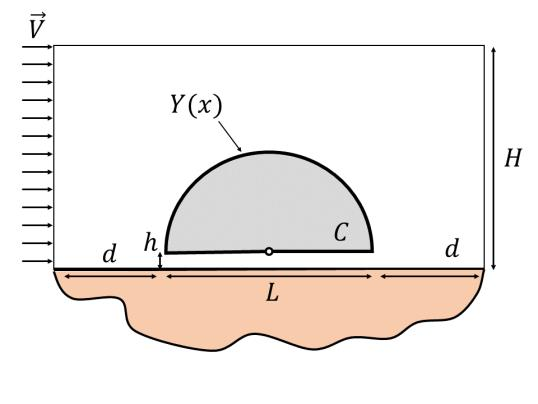 
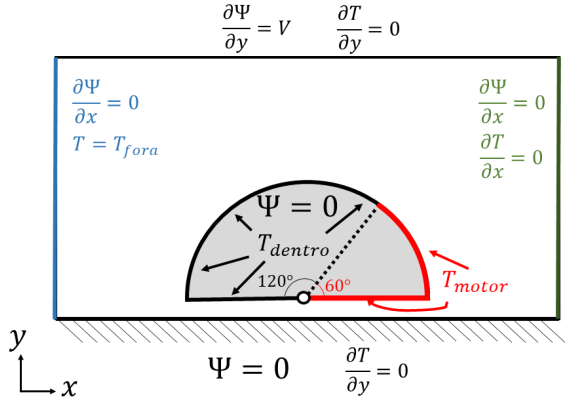

In [42]:
# Domínio do problema
Lx = L + 2*d 
Ly = H  
dx = 0.05
dy = dx

Nx = int((Lx/dx)+1) # elementos de malha em x
Ny = int((Ly/dy)+1) # elementos de malha em y

Dado o espaço e os elementos, é necessário criar uma malha discretizada para o domínio. Para isso, utilizamos a função `meshgrid` do `numpy` para criar uma malha de pontos no domínio. Ela recebe como parâmetros os vetores `x` e `y` que definem o domínio e retorna duas matrizes, uma com as coordenadas `x` de cada ponto e outra com as coordenadas `y` de cada ponto.

In [43]:
# Criar a malha retangular de pontos
x = np.linspace(0, Lx, Nx)
y = np.linspace(Ly, 0, Ny)
X, Y = np.meshgrid(x, y)

#### **Interior da Malha**

Precisamos substituir as derivadas parciais por diferenças finitas. Para os pontos do interior, vamos utilizar a segunda diferença central:

$$\left.\dfrac{\partial^2 \psi}{\partial x ^2}\right| _{i,j} = \dfrac{\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}}{\Delta x^2}$$

$$\left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{i,j} = \dfrac{\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1}}{\Delta y^2}$$

Substituindo na EDP $\dfrac{d^2 \psi}{dx^2}+\dfrac{d^2 \psi}{dy^2}=0$, temos:

$$\dfrac{\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}}{\Delta x^2}+\dfrac{\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1}}{\Delta y^2}=0$$

Sendo $\Delta x = \Delta y$, pode-se agrupar os termos:

$$\psi_{i+1,j}+\psi_{i-1,j}+\psi_{i,j+1}+\psi_{i,j-1}-4\psi_{i,j}=0$$

$$\Rightarrow \psi_{i,j} = \dfrac{\psi_{i+1,j}+\psi_{i-1,j}+\psi_{i,j+1}+\psi_{i,j-1}}{4}$$

(Relação válida para todos os pontos **interiores** do *grid*).

#### **Condições de Contorno**

Considerando a malha para solução da equação de corrente, a única borda que apresenta condições de contorno de Dirichlet é a borda inferior. Para as demais bordas, são fornecidas condições de Neumann. 

A EDP de diferenças finitas não é válida para os pontos de fronteira (limites dos intervalos), visto que haverão valores na expressão que não são definidos nessas posições. Precisamos recorrer à expansão em série de Taylor para obter $\dfrac{d^2 \psi}{dx^2}$ ou $\dfrac{d^2 \psi}{dy^2}$ nesses pontos.

-----------------------------------------------------------------

- **Borda Inferior:** (Dirichlet)

    $$\boxed{\psi=0}$$

    $\psi_{i,0} = 0$ 

-----------------------------------------------------------------

- **Borda Superior**: (Neumann)

    $$\boxed{\dfrac{\partial \psi}{\partial y}=V}$$

    - $X$ - Segunda Diferença Aproximada Central:
    
    $$\left.\dfrac{\partial^2 \psi}{\partial x ^2}\right| _{i,N_y-1} = \dfrac{\psi_{i+1,N_y-1}-2\psi_{i,N_y-1}+\psi_{i-1,N_y-1}}{\Delta x^2}$$

    - $Y$ - Expansão em Taylor:

    $$\psi_{i,N_y-2} = \psi_{i,N_y-1} - \Delta y \cdot \left.\dfrac{\partial \psi}{\partial y}\right| _{i,N_y-1} + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{i,N_y-1}$$
    
    $$\psi_{i,N_y-2} = \psi_{i,N_y-1} - \Delta y \cdot V + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{i,N_y-1}$$

    $$\left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{i,N_y-1} = \dfrac{2\cdot (\psi_{i,N_y-2}-\psi_{i,N_y-1}+\Delta y \cdot V)}{\Delta y^2}$$

    Substituindo na EDP $\dfrac{d^2 \psi}{dx^2}+\dfrac{d^2 \psi}{dy^2}=0$, temos:

    $$\dfrac{\psi_{i+1,N_y-1}-2\psi_{i,N_y-1}+\psi_{i-1,N_y-1}}{\Delta x^2} + \dfrac{2\cdot (\psi_{i,N_y-2}-\psi_{i,N_y-1}+\Delta y \cdot V)}{\Delta y^2} = 0$$

    Isolando $\psi_{i, N_y-1}$:

    $$\psi_{i, N_y-1} = \frac{\Delta y^2 \cdot(\psi_{i+1, N_y-1} + \psi_{i-1, N_y-1}) + 2\Delta x^2 \cdot (\psi_{i, N_y-2} + \Delta y \cdot V)}{2 \Delta x^2+ 2\Delta y^2}$$

-----------------------------------------------------------------

- **Borda Esquerda**: (Neumann)

    $$\boxed{\dfrac{\partial \psi}{\partial x}=0}$$

    $X$ - Expansão em Taylor:

    $$\psi_{1,j} = \psi_{0,j} + \Delta x \cdot \left.\dfrac{\partial \psi}{\partial x}\right| _{0,j} + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{0,j}$$
    
    $$\psi_{1,j} = \psi_{0,j} + \Delta x \cdot 0 + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 \psi}{\partial x ^2}\right| _{0,j}$$

    $$\left.\dfrac{\partial^2 \psi}{\partial x ^2}\right| _{0,j} = \dfrac{2\cdot (\psi_{1,j}-\psi_{0,j})}{\Delta x^2}$$

    $Y$ - Segunda Diferença Aproximada Central:

    $$\left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{0,j} = \dfrac{\psi_{0,j+1}-2\psi_{0,j}+\psi_{0,j-1}}{\Delta y^2}$$

    Substituindo na EDP $\dfrac{d^2 \psi}{dx^2}+\dfrac{d^2 \psi}{dy^2}=0$, temos:

    $$\dfrac{2\cdot (\psi_{1,j}-\psi_{0,j})}{\Delta x^2} + \dfrac{\psi_{0,j+1}-2\psi_{0,j}+\psi_{0,j-1}}{\Delta y^2} = 0$$

    Isolando $\psi_{0,j}$:

    $$\psi_{0,j} = \dfrac{2 \Delta y^2 \cdot\psi_{1,j} + \Delta x^2 \cdot(\psi_{0,j+1}+\psi_{0,j-1})}{2 \Delta x^2+ 2\Delta y^2}$$


-----------------------------------------------------------------
    
- **Borda Direita**: (Neumann)

    $$\boxed{\dfrac{\partial \psi}{\partial x}=0}$$

    $X$ - Expansão em Taylor:

    $$\psi_{N_x-2,j} = \psi_{N_x-1,j} - \Delta x \cdot \left.\dfrac{\partial \psi}{\partial x}\right| _{N_x-1,j} + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{N_x-1,j}$$
    
    $$\psi_{N_x-2,j} = \psi_{N_x-1,j} - \Delta x \cdot 0 + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 \psi}{\partial x ^2}\right| _{N_x-1,j}$$

    $$\left.\dfrac{\partial^2 \psi}{\partial x ^2}\right| _{N_x-1,j} = \dfrac{2\cdot (\psi_{N_x-2,j}-\psi_{N_x-1,j})}{\Delta x^2}$$

    $Y$ - Segunda Diferença Aproximada Central:

    $$\left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{N_x-1,j} = \dfrac{\psi_{N_x-1,j+1}-2\psi_{N_x-1,j}+\psi_{N_x-1,j-1}}{\Delta y^2}$$

    Substituindo na EDP $\dfrac{d^2 \psi}{dx^2}+\dfrac{d^2 \psi}{dy^2}=0$, temos:

    $$\dfrac{2\cdot (\psi_{N_x-2,j}-\psi_{N_x-1,j})}{\Delta x^2} + \dfrac{\psi_{N_x-1,j+1}-2\psi_{N_x-1,j}+\psi_{N_x-1,j-1}}{\Delta y^2} = 0$$

    Isolando $\psi_{N_x-1,j}$:

    $$\psi_{N_x-1,j} = \dfrac{2 \Delta y^2 \cdot\psi_{N_x-2,j} + \Delta x^2 \cdot(\psi_{N_x-1,j+1}+\psi_{N_x-1,j-1})}{2 \Delta x^2+ 2\Delta y^2}$$
    
-----------------------------------------------------------------

**Obs.:** É importante ressaltar que utilizamos os índices $i$ e $j$ na dedução acima pensando em uma malha retangular com o índice $i$ variando sobre o eixo $x$ e o índice $j$ variando sobre o eixo $y$ como na figura abaixo. Desta forma, dado $\psi_{i,j}$, o elemento imediatamente abaixo dele é o $\psi_{i,j-1}$.

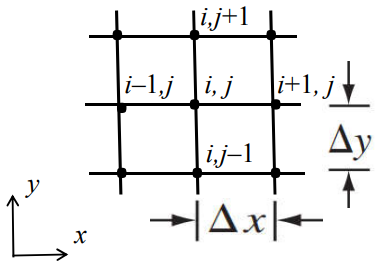

|   (0,2)    |   (1,2)    |   (2,2)    |
| ---------- | ---------- | ---------- |
|  **(0,1)** |  **(1,1)** |  **(2,1)** |
| **(0,0)**  | **(1,0)**  |  **(2,0)** |


A indexação matricial em *Python* é bastante diferente deste esquema. Ao selecionar o elemento $\psi[i][j]$, estamos acessando o elemento da matriz $\psi$ que se encontra na **linha** $\textbf{i}$ e **coluna** $\textbf{j}$. Desta forma, se desejamos nos deslocar para um elemento imediatamente abaixo dele, descemos uma linha e acessamos $\psi[i+1][j]$.


|   (0,0)    |   (0,1)    |   (0,2)    |
| ---------- | ---------- | ---------- |
|  **(1,0)** |  **(1,1)** |  **(1,3)** |
| **(2,0)**  | **(2,1)**  |  **(2,2)** |


**Vamos utilizar a indexação no código de tal forma que o *plot* da malha esteja visualmente coerente com o que foi fornecido, pensando na matriz como um retângulo de pontos (como na figura).** Para isso, ao criar a malha discretizada do domínio, inicializa-se os vetores e a malha da seguinte forma:

#### **Domínio do Veículo**

A carroceria do carro é aproximada por um semicírculo e pode ser definida por uma equação com a altura do carro. Vale lembrar que o assoalho do carro encontra-se a uma distância de $h=0.15 \,m$ do "chão" (borda inferior).

$$Y_{carro}(x) = \sqrt{\left(\dfrac{L}{2}\right)^2-\left(x-d-\dfrac{L}{2}\right)^2} + h$$

In [44]:
def Ycarro(x):
    if (x>d and x<d+L):
        y = (np.sqrt((L/2)**2 - (x-d-L/2)**2) + h)
    else:
        y=0
    return y

In [45]:
mask = (X - d - L/2)**2 + (Y - h)**2 > (L/2)**2
mask |= Y < h

x_carro = np.ma.masked_array(X, mask=mask)
y_carro = np.ma.masked_array(Y, mask=mask)

In [46]:
border = (X - d - L/2)**2 + (Y - h)**2 >= (L/2)**2
border |= Y <= h

x_border = np.ma.masked_array(X, mask=~border)
y_border = np.ma.masked_array(Y, mask=~border)

Podemos exibir o formato do "carro" para verificar se está coerente com o esperado. Vamos plotar as variáveis ``x_carro`` e ``y_carro`` definidas com a máscara acima (em preto):

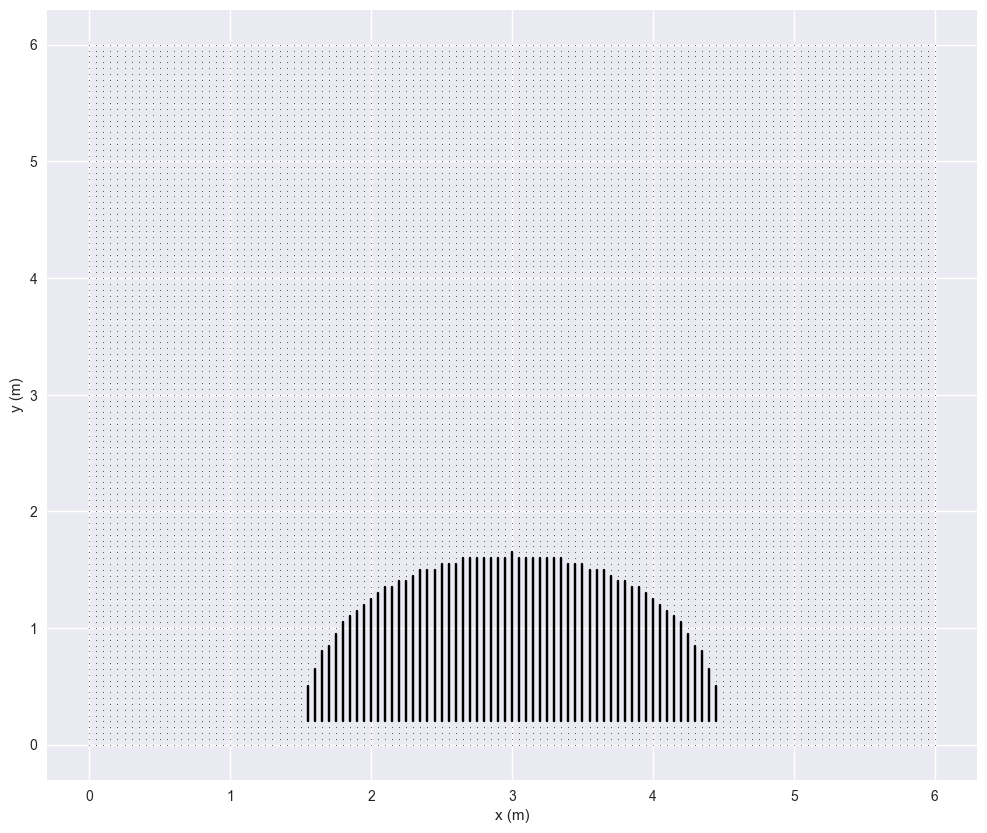

In [47]:
# Plotar os resultados
plt.figure(figsize = ((12, 10)))
plt.plot(X, Y, 'ko', markersize=0.5) # Grid
plt.plot(x_carro, y_carro, 'black') # Contorno
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

E, coerentemente, o domínio do problema será todo o grid, excluindo o carro:

In [48]:
x_domain = np.ma.masked_array(X, mask=~mask)
y_domain = np.ma.masked_array(Y, mask=~mask)

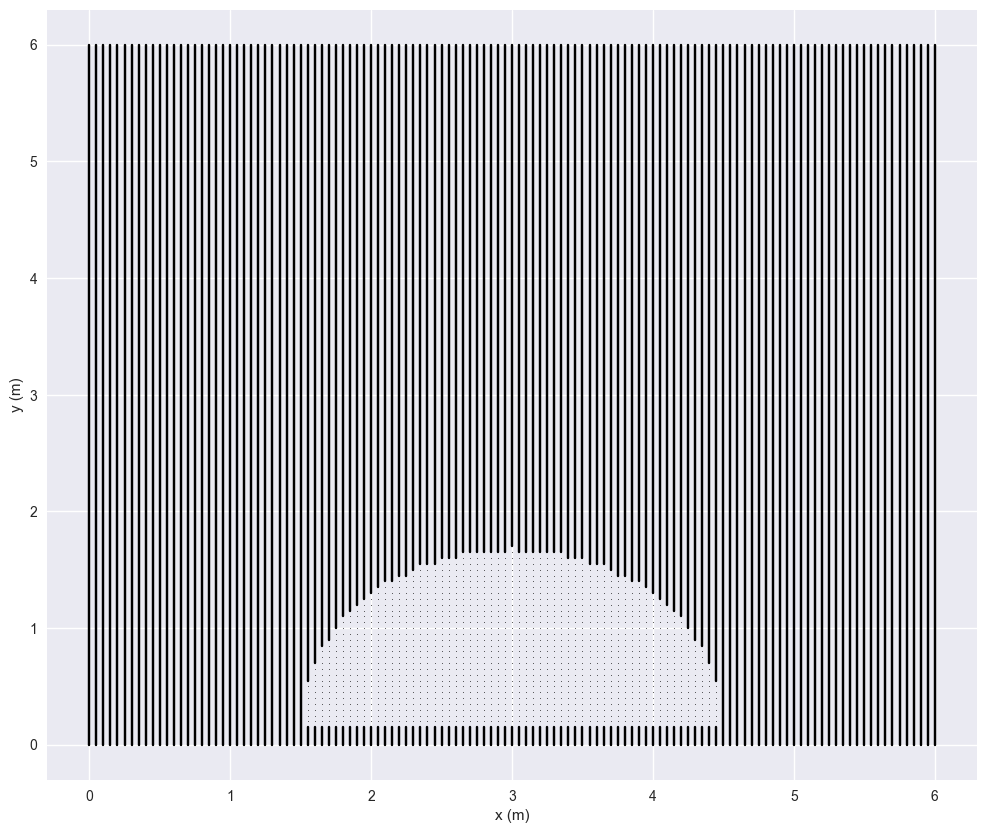

In [49]:
plt.figure(figsize = ((12, 10)))
plt.plot(X, Y, 'ko', markersize=0.5) # Grid
plt.plot(x_domain, y_domain, 'black') # Contorno
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

### Contorno Irregular no Veículo

A figura abaixo descreve todos os casos de contorno irregular do problema em cores diferentes. O lado esquerdo do esboço é análogo:

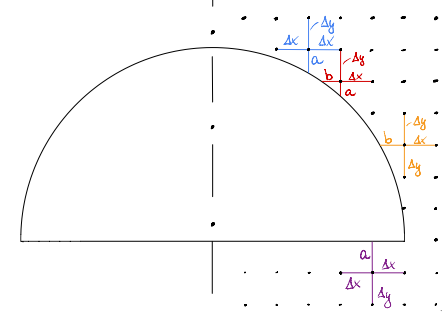

Para os **lados esquerdo e direito** do contorno, sempre haverá contorno irregular em $x$, mas precisamos verificar se também existirá em $y$.
Se não existir, podemos aplicar diretamente diferença central em $y$.
Para as **partes superior e inferior** do contorno, sempre haverá contorno irregular em $y$, sendo que em $x$ o contorno é regular, então podemos usar diretamente diferença central em $x$.

Vamos considerar que $(i,j)$ é ponto do contorno.

--------

#### Lado Esquerdo do Contorno

- Irregular somente em x:

$$\psi_{i+1,j} = \psi_{i,j}+b\Delta x\cdot \left.\dfrac{\partial \psi}{\partial x}\right|_{i,j} + \dfrac{(b\Delta x)^2}{2} \cdot \left.\dfrac{\partial^2 \psi}{\partial x^2}\right|_{i,j}$$
$$\psi_{i-1,j} = \psi_{i,j}-\Delta x\cdot \left.\dfrac{\partial \psi}{\partial x}\right|_{i,j} + \dfrac{\Delta x^2}{2} \cdot \left.\dfrac{\partial^2 \psi}{\partial x^2}\right|_{i,j}$$

Multiplicando a segunda equação por $b$ e somando as duas resulta em:

$$\left.\dfrac{\partial^2 \psi}{\partial x^2}\right|_{i,j} = \dfrac{2[\psi_{i+1,j}+b\psi_{i-1,j}-(1+b)\psi_{i,j}]}{\Delta x^2 (b^2+b)}$$

Segunda diferença central em $y$:

$$\left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{i,j} = \dfrac{\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1}}{\Delta y^2}$$

Substituindo na EDP:

$$\dfrac{2[\psi_{i+1,j}+b\psi_{i-1,j}-(1+b)\psi_{i,j}]}{\Delta x^2(b^2+b)} + \dfrac{\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1}}{\Delta y^2} = 0$$

Isolando $\psi_{i,j}:$

$$\boxed{\psi_{i,j} = \dfrac{2(\psi_{i+1,j}+b\psi_{i-1,j})+(b^2+b)(\psi_{i,j-1}+\psi_{i,j+1})}{2(b+1)^2}}$$

------------------

- Irregular em x e em y:

$$\psi_{i+1,j} = \psi_{i,j}+b\Delta x\cdot \left.\dfrac{\partial \psi}{\partial x}\right|_{i,j} + \dfrac{(b\Delta x)^2}{2} \cdot \left.\dfrac{\partial^2 \psi}{\partial x^2}\right|_{i,j}$$
$$\psi_{i-1,j} = \psi_{i,j}-\Delta x\cdot \left.\dfrac{\partial \psi}{\partial x}\right|_{i,j} + \dfrac{\Delta x^2}{2} \cdot \left.\dfrac{\partial^2 \psi}{\partial x^2}\right|_{i,j}$$

Multiplicando a segunda equação por $b$ e somando as duas resulta em:

$$\left.\dfrac{\partial^2 \psi}{\partial x^2}\right|_{i,j} = \dfrac{2[\psi_{i+1,j}+b\psi_{i-1,j}-(1+b)\psi_{i,j}]}{\Delta x^2 (b^2+b)}$$

$$\psi_{i,j-1} = \psi_{i,j}-a\Delta y\cdot \left.\dfrac{\partial \psi}{\partial y}\right|_{i,j} + \dfrac{(a\Delta y)^2}{2} \cdot \left.\dfrac{\partial^2 \psi}{\partial y^2}\right|_{i,j}$$
$$\psi_{i,j+1} = \psi_{i,j}+\Delta y\cdot \left.\dfrac{\partial \psi}{\partial y}\right|_{i,j} + \dfrac{\Delta y^2}{2} \cdot \left.\dfrac{\partial^2 \psi}{\partial y^2}\right|_{i,j}$$

Multiplicando a segunda equação por $a$ e somando as duas resulta em:

$$\left.\dfrac{\partial^2 \psi}{\partial y^2}\right|_{i,j} = \dfrac{2[\psi_{i,j-1}+a\psi_{i,j+1}-(1+a)\psi_{i,j}]}{\Delta y^2 (a^2+a)}$$

Substituindo na EDP:

$$\dfrac{2[\psi_{i+1,j}+b\psi_{i-1,j}-(1+b)\psi_{i,j}]}{\Delta x^2 (b^2+b)} + \dfrac{2[\psi_{i,j-1}+a\psi_{i,j+1}-(1+a)\psi_{i,j}]}{\Delta y^2 (a^2+a)} = 0$$

Isolando $\psi_{i,j}:$

$$\boxed{\psi_{i,j} = \dfrac{(a^2+a)(\psi_{i+1,j}+b\psi_{i-1,j})+(b^2+b)(\psi_{i,j-1}+a\psi_{i,j+1}))}{(a^2+a)(1+b)+(b^2+b)(1+a)}}$$

--------

#### Lado Direito do Contorno

Para o lado direito, os cálculos são análogos.

- Irregular somente em x:

    $$\left.\dfrac{\partial^2 \psi}{\partial x^2}\right|_{i,j} = \dfrac{2[\psi_{i-1,j}+b\psi_{i_1,j}-(1+b)\psi_{i,j}]}{\Delta x^2 (b^2+b)}$$

    $$\left.\dfrac{\partial^2 \psi}{\partial y ^2}\right| _{i,j} = \dfrac{\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1}}{\Delta y^2}$$

    Substituindo na EDP:

    $$\dfrac{2[\psi_{i-1,j}+b\psi_{i+1,j}-(1+b)\psi_{i,j}]}{\Delta x^2(b^2+b)} + \dfrac{\psi_{i,j+1}-2\psi_{i,j}+\psi_{i,j-1}}{\Delta y^2} = 0$$

    Isolando $\psi_{i,j}:$

    $$\boxed{\psi_{i,j} = \dfrac{2(\psi_{i-1,j}+b\psi_{i+1,j})+(b^2+b)(\psi_{i,j-1}+\psi_{i,j+1})}{2(b+1)^2}}$$

------------

- Irregular em x e em y:

    $$\left.\dfrac{\partial^2 \psi}{\partial x^2}\right|_{i,j} = \dfrac{2[\psi_{i-1,j}+b\psi_{i_1,j}-(1+b)\psi_{i,j}]}{\Delta x^2 (b^2+b)}$$

    $$\left.\dfrac{\partial^2 \psi}{\partial y^2}\right|_{i,j} = \dfrac{2[\psi_{i,j-1}+a\psi_{i,j+1}-(1+a)\psi_{i,j}]}{\Delta y^2 (a^2+a)}$$

    Substituindo na EDP:

    $$\dfrac{2[\psi_{i-1,j}+b\psi_{i+1,j}-(1+b)\psi_{i,j}]}{\Delta x^2 (b^2+b)} + \dfrac{2[\psi_{i,j-1}+a\psi_{i,j+1}-(1+a)\psi_{i,j}]}{\Delta y^2 (a^2+a)} = 0$$

    Isolando $\psi_{i,j}:$

    $$\boxed{\psi_{i,j} = \dfrac{(a^2+a)(\psi_{i-1,j}+b\psi_{i+1,j})+(b^2+b)(\psi_{i,j-1}+a\psi_{i,j+1}))}{(a^2+a)(1+b)+(b^2+b)(1+a)}}$$

--------

#### Parte Superior do Contorno

Segunda diferença central em $x$:

$$\left.\dfrac{\partial^2 \psi}{\partial x ^2}\right| _{i,j} = \dfrac{\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}}{\Delta x^2}$$

Contorno irregular em $y$:

$$\psi_{i,j-1} = \psi_{i,j}-a\Delta y\cdot \left.\dfrac{\partial \psi}{\partial y}\right|_{i,j} + \dfrac{(a\Delta y)^2}{2} \cdot \left.\dfrac{\partial^2 \psi}{\partial y^2}\right|_{i,j}$$
$$\psi_{i,j+1} = \psi_{i,j}+\Delta y\cdot \left.\dfrac{\partial \psi}{\partial y}\right|_{i,j} + \dfrac{\Delta y^2}{2} \cdot \left.\dfrac{\partial^2 \psi}{\partial y^2}\right|_{i,j}$$

Multiplicando a segunda equação por $a$ e somando as duas resulta em:

$$\left.\dfrac{\partial^2 \psi}{\partial y^2}\right|_{i,j} = \dfrac{2[\psi_{i,j-1}+a\psi_{i,j+1}-(1+a)\psi_{i,j}]}{\Delta y^2 (a^2+a)}$$

Substituindo na EDP:

$$\dfrac{\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}}{\Delta x^2} + \dfrac{2[\psi_{i,j-1}+a\psi_{i,j+1}-(1+a)\psi_{i,j}]}{\Delta y^2 (a^2+a)} = 0$$

Isolando $\psi_{i,j}:$

$$\boxed{\psi_{i,j} = \dfrac{(a^2+a)(\psi_{i+1,j}+\psi_{i-1,j})+2(\psi_{i,j-1}+a\psi_{i,j+1}))}{2(a+1)^2}}$$


--------

#### Parte Inferior do Contorno

Para a parte inferior, os cálculos são análogos.


$$\left.\dfrac{\partial^2 \psi}{\partial x ^2}\right| _{i,j} = \dfrac{\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}}{\Delta x^2}$$

$$\left.\dfrac{\partial^2 \psi}{\partial y^2}\right|_{i,j} = \dfrac{2[\psi_{i,j+1}+a\psi_{i,j-1}-(1+a)\psi_{i,j}]}{\Delta y^2 (a^2+a)}$$

Substituindo na EDP:

$$\dfrac{\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j}}{\Delta x^2} + \dfrac{2[\psi_{i,j+1}+a\psi_{i,j-1}-(1+a)\psi_{i,j}]}{\Delta y^2 (a^2+a)} = 0$$

Isolando $\psi_{i,j}:$

$$\boxed{\psi_{i,j} = \dfrac{(a^2+a)(\psi_{i+1,j}+\psi_{i-1,j})+2(\psi_{i,j+1}+a\psi_{i,j-1}))}{2(a+1)^2}}$$

--------

Em seguida, itera-se a solução até haver convergência, isto é, o erro ser menor que a tolerância exigida (critério de parada):

$$|(\epsilon_a)_{max}| = max\left|\dfrac{\psi_{i,j}^{\, novo} - \psi_{i,j}^{\, velho}}{\psi_{i,j}^{\, novo}}\right|_{i,j} < \epsilon$$

Para implementar condições de contorno irregular necessárias no veículo, vamos filtrar os pontos `FORA` do carro, `DENTRO` do carro e no `CONTORNO` do carro:

In [50]:
grid = np.zeros((Ny, Nx))

CONTORNO = 0
DENTRO = 1
FORA = 2

grid[~mask] = DENTRO # interior do carro
grid[mask] = FORA # fora do carro

for j in range(Ny-1):
    for i in range(Nx-1):
        if grid[j, i] == DENTRO:
            if grid[j, i-1] == FORA:
                grid[j, i-1] = CONTORNO
            
            if grid[j, i+1] == FORA:
                grid[j, i+1] = CONTORNO
            
            if grid[j-1, i] == FORA:
                grid[j-1, i] = CONTORNO

            if grid[j+1, i] == FORA:
                grid[j+1, i] = CONTORNO

Podemos exibir essa classificação realizada:

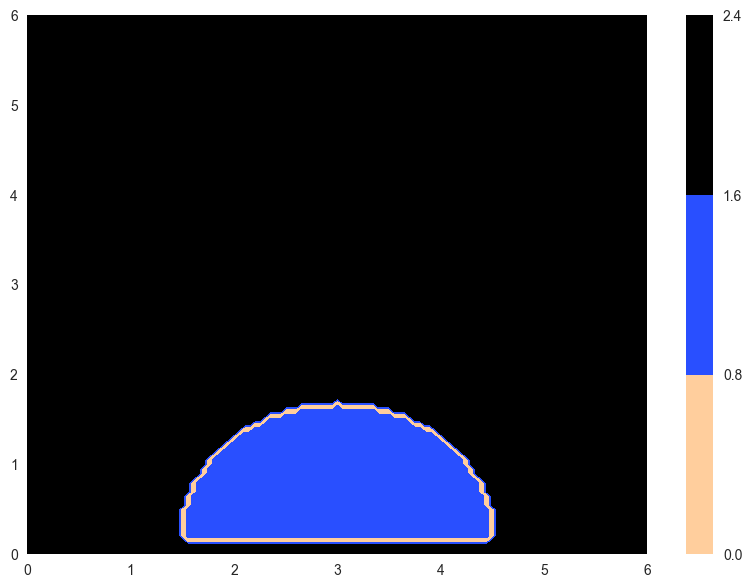

In [51]:
plt.figure(figsize = ((10, 7)))
plt.contourf(X, Y, grid, levels=2, vmax = 2, cmap = 'flag')
plt.colorbar()

Para usar condições de contorno irregular no `CONTORNO`, vamos precisar de uma função que retorna as distâncias em $x$ e $y$ do ponto $(i,j)$ de interesse do `CONTORNO` até a superfície da carroceria do carro (aproximado pelo semicírculo). Vamos criar essa função `dist_to_circle`.

Para encontrar $a$ e $b$ utilizados com frequência no equacionamento irregular, basta dividir as distâncias encontradas em cada eixo pelas suas respectivas discretizações ($\Delta$) na malha:

$$b = dist\_X/\Delta x$$
$$a = dist\_Y/\Delta y$$

In [52]:
def dist_to_circle(x, y, h, d, L, delta):
    dist_X = delta
    dist_Y = delta

    if  (h < y < h+L/2+delta) and (d - delta <= x <= d+L+delta):

        theta = np.arctan2(y - h, x - (d + L / 2))

        var = np.abs(np.sqrt((x-(d+L/2))**2 + (y-h)**2) - L/2)

        dist_X = np.abs(var*np.cos(theta))
        dist_Y = np.abs(var*np.sin(theta))

    return dist_X, dist_Y

In [54]:
# Inicializar a solução
psi = np.zeros((Ny, Nx)) # (Ny linhas) x (Nx colunas)

# Iterar até a convergência da solução
conv = False # Indicador de convergência
count = 0
epsilon = 0.01  # Tolerância de convergência
lamb = 1.85 # Fator de sobrerrelaxação

while not (conv):
    count += 1
    psi_old = psi.copy()
    
    # Nunca entra na última linha da matriz (=0 sempre)
    for j in range(0, Ny-1):
        for i in range(0, Nx):
            if grid[j,i] == FORA:
                if j == 0 and i == 0: # Canto superior esquerdo
                    current = (psi[j, i+1]+psi[j+1, i]+dy*V)/2 

                elif j == 0 and i == Nx-1: # Canto superior direito
                    current = (psi[j,i-1]+psi[j+1,i]+dy*V)/2 

                elif j == 0: # Borda superior
                    current = (dy**2 *(psi[j,i+1]+psi[j,i-1])+2*dx**2 *(psi[j+1,i]+dy*V))/(2*dx**2+2*dy**2)

                elif i == 0: # Borda da esquerda
                    current = (2*dy**2 *psi[j, i+1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)

                elif i == Nx-1: # Borda da direita
                    current = (2*dy**2 *psi[j, i-1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)
                    
                else: # Ponto genérico do interior da malha
                    current = (psi[j,i+1]+psi[j,i-1]+psi[j+1,i]+psi[j-1,i])/4
                
            elif grid[j,i] == DENTRO: # Dentro do carro
                current = 0
                psi[j, i] = 0

            elif grid[j, i] == CONTORNO: # Contorno do carro
                dist_x, dist_y = dist_to_circle(X[j, i], Y[j, i], h, d, L, dx)
                
                b = dist_x/dx
                a = dist_y/dy

                if grid[j, i+1] == DENTRO: # Lado esquerdo do contorno (irregular em x)
                    
                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i+1]+b*psi[j,i-1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i+1]+b*psi[j,i-1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)

                elif grid[j, i-1] == DENTRO: ## Lado direito do contorno (irregular em x)

                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i-1]+b*psi[j,i+1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i-1]+b*psi[j,i+1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)
                    
                elif grid[j+1, i] == DENTRO: # Contorno superior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j+1,i]+a*psi[j-1,i]))/(2*(a+1)**2)
                     
                elif grid[j-1, i] == DENTRO: # Contorno inferior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j-1,i]+a*psi[j+1,i]))/(2*(a+1)**2)
                
            psi[j,i] = lamb*current + (1-lamb)*psi[j,i]  # Atualiza com sobrerrelaxacao
            
    error = np.nanmax(np.abs(np.divide(psi - psi_old, psi, where=(psi!=0))))

    print("Iteração %d - Erro = %.6f" %(count, error))
    if error < epsilon:
        conv = True

Iteração 1 - Erro = 1.000000
Iteração 2 - Erro = 1.000000
Iteração 3 - Erro = 1.000000
Iteração 4 - Erro = 1.000000
Iteração 5 - Erro = 1.000000
Iteração 6 - Erro = 1.000000
Iteração 7 - Erro = 1.000000
Iteração 8 - Erro = 1.000000
Iteração 9 - Erro = 0.999999
Iteração 10 - Erro = 0.999977
Iteração 11 - Erro = 0.999924
Iteração 12 - Erro = 0.999923
Iteração 13 - Erro = 0.999920
Iteração 14 - Erro = 0.999903
Iteração 15 - Erro = 108.123185
Iteração 16 - Erro = 58.561560
Iteração 17 - Erro = 23.200170
Iteração 18 - Erro = 277.209908
Iteração 19 - Erro = 3.001384
Iteração 20 - Erro = 1.174945
Iteração 21 - Erro = 24.915918
Iteração 22 - Erro = 294.158701
Iteração 23 - Erro = 284.231209
Iteração 24 - Erro = 272.155703
Iteração 25 - Erro = 13.052399
Iteração 26 - Erro = 61.819940
Iteração 27 - Erro = 61.284948
Iteração 28 - Erro = 1110.925635
Iteração 29 - Erro = 2.215972
Iteração 30 - Erro = 356.513760
Iteração 31 - Erro = 24.837928
Iteração 32 - Erro = 98.680663
Iteração 33 - Erro = 108.8

Note que, durante as atualizações sucessivas do Método de Sobrerrelaxação, é necessário verificar se o ponto em questão encontra-se dentro, fora ou no contorno do carro. Isso é feito utilizando o filtro criado anteriormente (`DENTRO`, `FORA`, `CONTORNO`).

- Para a parte de `FORA`, verificamos se o ponto é um **canto** (superior esquerdo ou superio direito), se faz parte das **bordas** (esquerda, direita e superior) ou é um **ponto genérico do meio da malha**. Na borda inferior nunca mexemos porque ela deve permanecer com $\psi=0$ sempre (Condição de Dirichlet).
Para cada caso verificado acima `FORA` do carro, existe uma equação diferente utilizada, sendo que as deduções foram apresentadas previamente.

- `DENTRO` do carro os elementos são $\psi=0$ diretamente. 

- No `CONTORNO`, também existem algumas verificações a serem feitas para aplicar as equações de contorno irregular, como se o ponto faz parte do **contorno esquerdo**, **contorno direito**, **contorno superior**, **contorno inferior**. Para cada um desses casos foram deduzidas equações diferentes, apresentadas também previamente. Vale ressaltar que para os pontos do contorno esquerdo e direito, precisamos verificar também se ele é irregular somente em $x$ ou se é irregular em ambas as direções ($x$ e $y$).

-------

#### Visualização dos Resultados

Apenas para confirmação, é interessante mostrar que **existe** escoamento abaixo do carro, mesmo que **pequeno**. Para isso, vamos exibir as 10 últimas linhas do *grid* com os valores de $\psi$.

In [55]:
np.set_printoptions(linewidth=np.inf) # permite infinitas linhas ao printar

for k in range(-10,0): 
    print(np.array2string(np.ravel(psi[k]), separator=', '))

[0.59993949, 0.60251193, 0.60425199, 0.60513917, 0.60514789, 0.6042473 , 0.60240105, 0.59956703, 0.59569701, 0.59073634, 0.5846235 , 0.57728964, 0.5686581 , 0.55864381, 0.5471527 , 0.53408097, 0.51931438, 0.50272741, 0.48418235, 0.46352833, 0.44060019, 0.41521731, 0.38718217, 0.35627878, 0.32227086, 0.28489971, 0.24388199, 0.1989078 , 0.1496401 , 0.09571863, 0.03677818, 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0. 

O resultado parece consistente. A última linha representa a borda inferior do grid, que apresenta $\psi=0$ e os pontos do "meio" que estão zerados em conjunto são os pontos dentro do carro, que também possuem $\psi=0$.

Resolvida a equação, podemos **plotar a função de corrente $\psi$**:

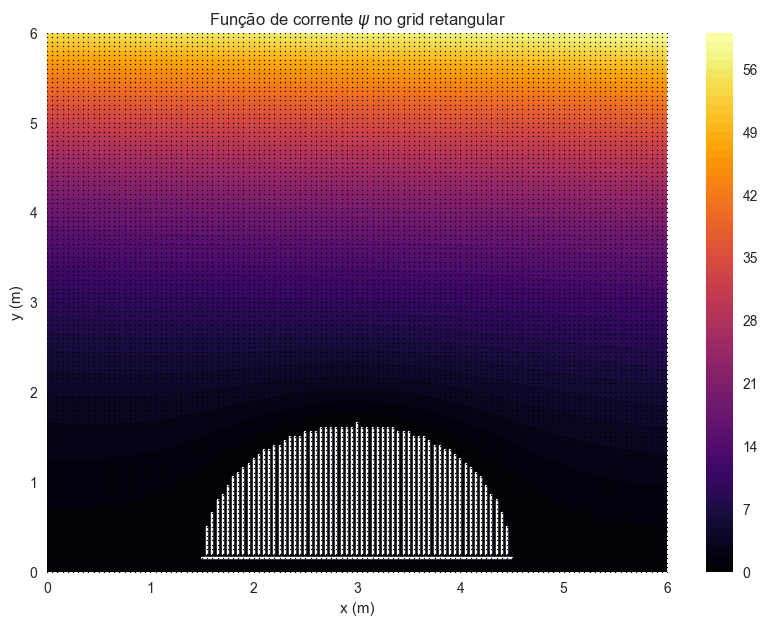

In [56]:
# Carro
plt.figure(figsize = ((10, 7)))
plt.plot(x_carro, y_carro, 'white')
plt.axhline(y=h, xmin=1.5/6, xmax=4.5/6, color='white')

# Corrente
plt.plot(X, Y, 'ko', markersize=1) # Grid

plt.contourf(X, Y, psi, levels=70, vmax=np.max(psi), cmap='inferno')
plt.colorbar()  
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'Função de corrente $\psi$ no grid retangular')
plt.show()

#### $(b)$ Plotar os vetores de velocidade absoluta do escoamento

Para obter os vetores velocidade absoluta do escoamento, vamos utilizar a relação:

$$v = -\dfrac{\partial \psi}{\partial x} = \dfrac{\partial \Phi}{\partial y} \textrm{ ; } u = \dfrac{\partial \psi}{\partial y} = \dfrac{\partial \Phi}{\partial x}$$

Como já obtivemos a solução $\psi(x,y)$ no grid, basta analisar as derivadas parciais acima para obter os vetores velocidade. Para isso, vamos utilizar novamente o método das diferenças finitas, analisando cada parte do domínio separadamente.


#### **Interior da Malha**

Para os pontos do interior, pode-se fazer uso da primeira diferença central:

$$\dfrac{\partial \psi}{\partial x}=\dfrac{\psi_{i+1,j}-\psi_{i-1,j}}{2 \Delta x}\Rightarrow v = -\dfrac{\psi_{i+1,j}-\psi_{i-1,j}}{2 \Delta x}$$
$$\dfrac{\partial \psi}{\partial y}=\dfrac{\psi_{i,j+1}-\psi_{i,j-1}}{2 \Delta y}\Rightarrow u = \dfrac{\psi_{i,j+1}-\psi_{i,j-1}}{2 \Delta y}$$

(Relação válida para todos os pontos **interiores** do *grid*).

-----

#### Condições de Contorno

Agora, deve-se analisar as condições de contorno separadamente para $u$ e para $v$. As derivadas de $\psi$ em $x$ são conhecidas nas bordas direita, esquerda e inferior. Já as derivadas de $\psi$ em $y$ são conhecidas nas bordas superior e inferior. Como essas derivadas são precisamente os valores das velocidades, tem-se, nesses contornos, condições de Dirichlet para $v$ e $u$, respectivamente. 

Nos casos restantes, isto é, para derivadas de $\psi$ em $y$ nas bordas direita e esquerda e para derivadas de $\psi$ em $x$ na borda superior, tem-se condições de Neumann para $u$ e $v$. Como foram encontrados os valores de $\psi$ em todos os pontos do *grid*, pode-se utilizar as fórmulas de primeiras diferenças para aproximar as derivadas necessárias.

-----------------------------------------------------------------

- **Borda Inferior:** (Dirichlet)

    $$\psi=0 \Rightarrow \frac{\partial\psi}{\partial x} = 0,\, \frac{\partial\psi}{\partial y} = 0$$

    $$\Rightarrow \boxed{u = 0; \, v = 0}$$

-----------------------------------------------------------------

- **Borda Superior**: (Dirichlet para $u$, Neumann para $v$)

    Neste caso, tem-se a derivada de $\psi$ em $y$ conhecida, mas não em $x$. Portanto, aproxima-se $\frac{\partial\psi}{\partial x}$ por uma diferença central:

    $$\frac{\partial\psi}{\partial y} = V$$

    $$\frac{\partial\psi}{\partial x} = \dfrac{\psi_{i+1,j}-\psi_{i-1,j}}{2 \Delta x}$$

    $$\Rightarrow \boxed{u = V; \, v = -\dfrac{\psi_{i+1,j}-\psi_{i-1,j}}{2 \Delta x}}$$

-----------------------------------------------------------------

- **Borda Esquerda**: (Neumann para $u$, Dirichlet para $v$)

Na borda esquerda, a derivada em $x$ é conhecida, e em $y$, não. Logo:

$$\frac{\partial\psi}{\partial x} = 0$$

$$\frac{\partial\psi}{\partial y} = \dfrac{\psi_{i,j+1}-\psi_{i,j-1}}{2 \Delta y}$$

$$\Rightarrow \boxed{u = \dfrac{\psi_{i,j+1}-\psi_{i,j-1}}{2 \Delta y}; \, v = 0}$$

-----------------------------------------------------------------


- **Borda Direita**: (Neumann para $u$, Dirichlet para $v$)

Na borda direita, tem-se a mesma situação da esquerda: a derivada em $x$ é conhecida, e em $y$, não. Logo:

$$\frac{\partial\psi}{\partial x} = 0$$

$$\frac{\partial\psi}{\partial y} = \dfrac{\psi_{i,j+1}-\psi_{i,j-1}}{2 \Delta y}$$

$$\Rightarrow \boxed{u = \dfrac{\psi_{i,j+1}-\psi_{i,j-1}}{2 \Delta y}; \, v = 0}$$

-----------------------------------------------------------------


- **Canto superior direito**: (Dirichlet para $u$, Dirichlet para $v$)

Nesse canto, tem-se propriedades tanto da parede direita, quanto da borda superior. Assim:

$$\frac{\partial\psi}{\partial x} = 0$$

$$\frac{\partial\psi}{\partial y} = V$$

$$\Rightarrow \boxed{u = V; \, v = 0}$$

-----------------------------------------------------------------


- **Canto superior esquerdo**: (Dirichlet para $u$, Dirichlet para $v$)

Nesse canto, tem-se propriedades tanto da parede esquerda, quanto da borda superior. Assim:

$$\frac{\partial\psi}{\partial x} = 0$$

$$\frac{\partial\psi}{\partial y} = V$$

$$\Rightarrow \boxed{u = V; \, v = 0}$$

-----------------------------------------------------------------


In [57]:
u = np.zeros((Ny,Nx))
v = np.zeros((Ny,Nx))

for j in range(0, Ny-1):
    for i in range(0, Nx):
        if j == 0 and i == 0: # Canto superior esquerdo
            v[j, i] = 0
            u[j, i] = V

        elif j == 0 and i == Nx-1: # Canto superior direito
            v[j, i] = 0
            u[j, i] = V

        elif j == 0: # Borda superior
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = V

        elif i == 0: # Borda da esquerda
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        elif i == Nx-1: #Borda da direita
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)
            
        elif (grid[j,i] == DENTRO): # Interior do carro
            v[j,i] = 0
            u[j,i] = 0

        else:
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

Usando a função ``.quiver`` do Matplotlib, conseguimos exibir o campo de velocidades em cada ponto da malha:

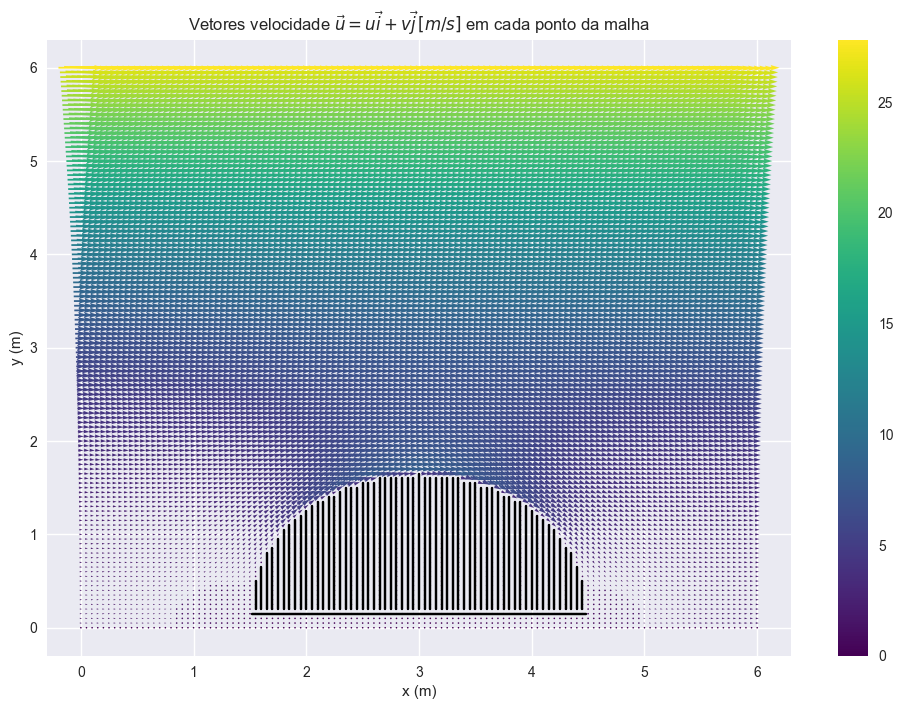

In [58]:
# Carro
plt.figure(figsize = ((12, 8)))
plt.plot(x_carro, y_carro, 'black')
plt.axhline(y=h, xmin=0.275, xmax=0.725, color='black')
plt.fill(x_carro, y_carro, 'gray')

# Velocidade
mod = np.sqrt(u**2+v**2)
plt.quiver(X, Y, u, v, mod, angles='xy', scale_units='xy', pivot='mid', scale = 70, cmap='viridis')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'Vetores velocidade $\vec{u}=u\vec{i}+v\vec{j} \, [m/s]$ em cada ponto da malha')
plt.show()

#### $(c)$ Plotar a pressão no domínio

A partir do campo de velocidade $u$, pode-se obter a pressão utilizando a equação de Bernoulli:

$$\dfrac{(\sqrt{u(x,y)^2+v(x,y)^2})^2}{2}+\dfrac{\gamma_{ar}}{\gamma_{ar}-1}\dfrac{p(x,y)}{\rho}=C$$

Portanto, a partir das condições de contorno na fronteira superior temos a variação de pressão no
domínio:

$$p(x,y)-p_{atm}=\rho \dfrac{\gamma_{ar}-1}{\gamma_{ar}}\left(\dfrac{V^2}{2}-\dfrac{\left(\sqrt{u(x,y)^2+v(x,y)^2}\right)^2}{2}\right)$$

Em que a pressão atmosférica é $p_{atm}=101,325 \, Pa$ no SI.

Vamos implementar o cálculo da pressão $p(x,y)$ em cada ponto da malha:

In [59]:
Patm = 101.325 #SI

P = np.zeros((Ny,Nx))

for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
                if (X[j, i]*mask[j, i] and Y[j, i]*mask[j, i]): #interior do carro
                        P[j, i] = Patm + (ro*(gama_ar-1)/gama_ar)*(V**2/2 - (u[j,i]**2+v[j,i]**2)/2)

                else:
                        P[j, i] = 0

Agora, basta exibir os resultados:

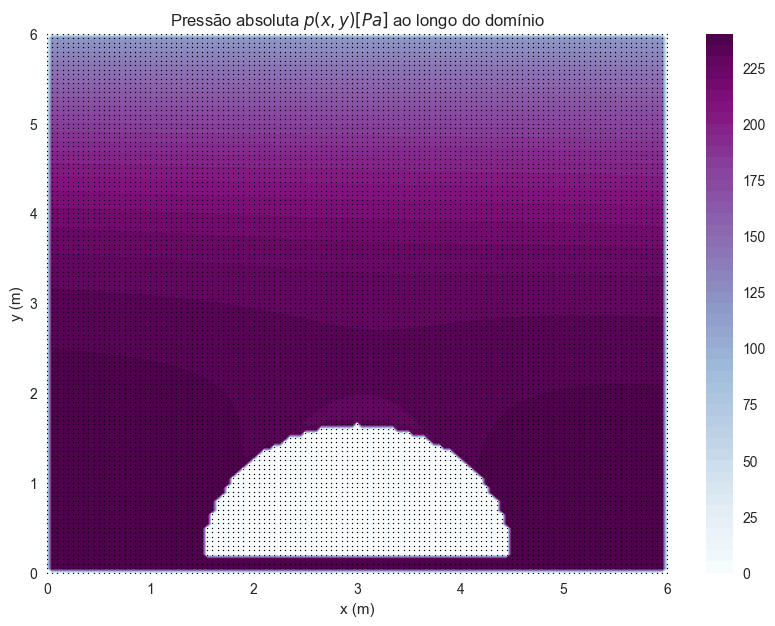

In [60]:
# Carro
plt.figure(figsize = ((10, 7)))
plt.plot(x_carro, y_carro, 'white')
plt.axhline(y=h, xmin=1.5/6, xmax=1.5/6, color='white')

# Pressão
plt.contourf(X,Y,P, levels=50, cmap='BuPu')
plt.plot(X, Y, 'ko', markersize=1) # Grid
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title(r'Pressão absoluta $p(x,y) [Pa]$ ao longo do domínio')
plt.show()

#### $(d)$ Plotar a pressão ao longo da carroceria, explicitando seu valor mínimo

Basta filtrar a pressão nos pontos de contorno do carro utilizando `CONTORNO` e anular todos os demais elementos do *array*:

In [61]:
# Cria um Fitro
filter = np.zeros_like(P)
filter[grid == CONTORNO] = 1
P_cont = P*filter

Agora podemos plotar:

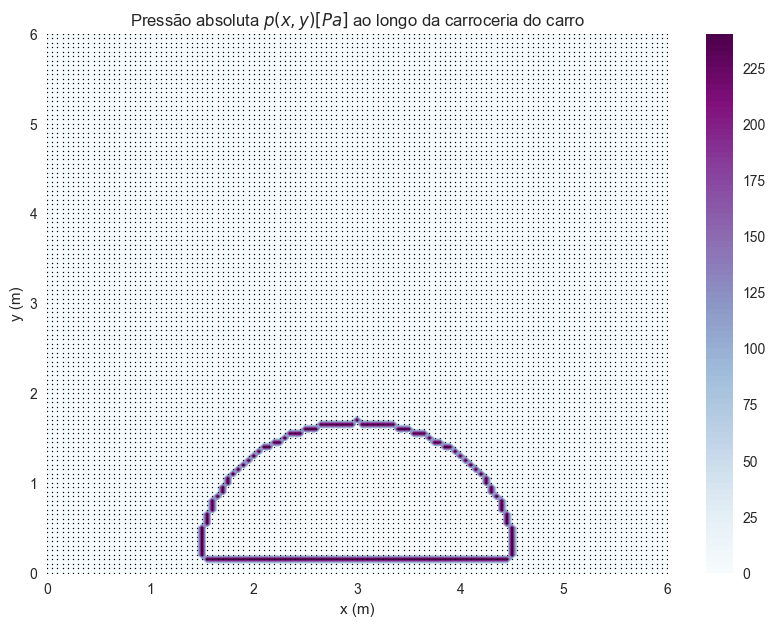

In [62]:
# Carro
plt.figure(figsize = ((10, 7)))
plt.plot(x_carro, y_carro, 'white')
plt.axhline(y=h, xmin=1.5/6, xmax=1.5/6, color='white')

# Pressão
plt.contourf(X, Y, P_cont, levels=100, vmax=np.max(P_cont), cmap='BuPu')
plt.plot(X, Y, 'ko', markersize=1) # Grid
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title(r'Pressão absoluta $p(x,y) [Pa]$ ao longo da carroceria do carro')
plt.show()

#### $(e)$ Calcular a força vertical resultante que atua no veículo

Como não foi fornecida a massa do carro, vamos desprezar o peso e considerar que a força vertical resultante é a componente vertical da própria força de sustentação $F_{lift}$. Isso é coerente com as considerações de escoamento irrotacional e invíscido.

A força de sustentação é a somatória das forças de pressão ao longo da superfície da carroceria,
podendo ser calculada pela integral:

$$F_{lift}=\int_A \vec{P} \cdot \vec{n} \, dA$$

- Utilizaremos a pressão relativa para o cálculo da força, já que a pressão atmosférica age dentro do veículo também
- As integrais são calculadas sobre a superfície do veículo (semicírculo)
- $\theta$ é o menor ângulo que a normal à superfície do veículo faz com a horizontal (direção do escoamento)

Como só queremos a componente vertical da força, podemos simplificar a integral para:

$$F_{vert}^R = F_{lift}^y = \int_{A} P(x,y) \cdot \sin(\theta) dA$$

Primeiro, precisamos calcular o ângulo $\theta$ que cada versor normal $\vec{n}$ da superfície de contorno do carro faz com a horizontal. Para isso, vamos "deslocar" a origem do sistema de coordenadas para o centro do semicírculo e utilizar a ferrramenta `arctan2` do numpy para calcular o ângulo em radianos. Isso será feito para todos os pontos do domínio, mas os pontos $(i,j)$ de real interesse são aqueles que pertecem ao `CONTORNO` do carro.

In [63]:
# Cálculo do ângulo theta
theta = np.arctan2(Y - h, X - (d + L / 2))

Podemos exibir o resultado graficamente:

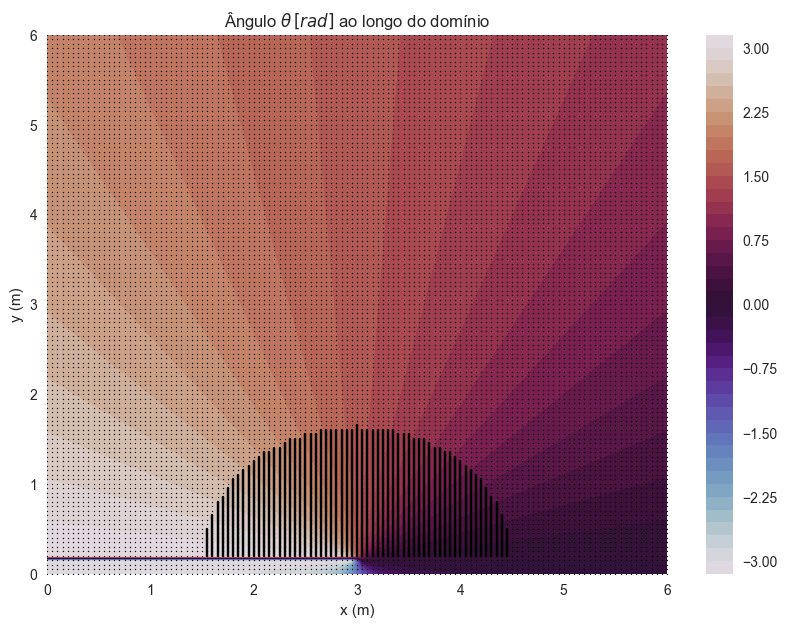

In [64]:
# Carro
plt.figure(figsize = ((10, 7)))
plt.plot(x_carro, y_carro, 'black')
plt.axhline(y=h, xmin=1.5/6, xmax=1.5/6, color='black')

# Theta
plt.contourf(X, Y, theta, levels=50, vmax=np.max(theta), cmap='twilight')
plt.plot(X, Y, 'ko', markersize=1) # Grid
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title(r'Ângulo $\theta \, [rad]$ ao longo do domínio')
plt.show()

Por tratar-se de um problema **bidimensional** (não temos a área superficial real 3D do veículo), o contorno do carro é, na verdade, uma "linha" de pontos e isso permite aproximar a integral dupla por uma integral simples.

Primeiro, precisamos calcular o elemento infinitesimal de "área" $dA$:

1) Parte Circular do Contorno

    Vamos utilizar a relação de arcos e ângulos no setor circular:

    $$d\theta = \dfrac{dA}{R} = \dfrac{dA}{L/2} \Rightarrow dA = \dfrac{L}{2}d\theta$$

    O ângulo $\theta$ deve ser integrado de $0$ a $\pi$ para varrer todo o semicírculo:

    $$F_{vert}^1 = \int_{0}^{\pi}  \dfrac{L}{2} \cdot P(\theta) \cdot \sin(\theta) d\theta$$

2) Base Reta do Contorno

    A base é um segmento de reta horizontal com início em $x=d$ e fim em $x=d+L$. Vamos considerar que o comprimento de cada elemento infinitesimal é $dA=dx$. O vetor normal a essa superfície é sempre da forma $\vec{n} = -\hat{j}$, então $\theta = -\pi/2$ e $\sin(\theta)=-1$.
    
    A integral fica:

    $$F_{vert}^2 = \int_d^{d+L}  -P(x,y) dx$$

    Portanto, a força resultante ao longo da carroceria fica:

    $$F_{vert}^R = \int_{0}^{\pi}  \dfrac{L}{2} \cdot P(\theta) \cdot \sin(\theta) d\theta + \int_d^{d+L}  -P(x,y) dx$$

    Lembrando que $P(x,y)$, neste caso, é um *array* e não uma função, o que resulta nas seguintes somatórias:

    $$F_{vert}^R = \sum_{k=0}^{\pi} \dfrac{L}{2} \cdot P[\theta_k] \cdot \sin(\theta_k) \cdot \Delta \theta +\sum_{k=d}^{d+L} -P[x_k] \cdot \Delta x$$

    Considerando um $\Delta x$ pequeno, vamos utilizar uma aproximação de que $\Delta \theta$ é o ângulo total da parte circular do contorno ($\pi$) multiplicado por $\Delta x$.

In [65]:
P_rel = P_cont - Patm # pressao relativa

F_1 = 0 # forca vertical no contorno circular
F_2 = 0 # forca vertical no contorno inferior

dtheta = np.pi*dx

for j in range(0, Ny):
    for i in range(0, Nx):
        if grid[j,i] == CONTORNO:
            if grid[j-1,i] == DENTRO: # contorno inferior
                F_2 += -P_rel[j,i]*dx
            else: # contorno superior
                F_1 += (L/2)*P_rel[j,i]*np.sin(theta[j,i])*dtheta
            
F_R = F_1 + F_2

print('F1 = %f N, F2 = %f N' %(F_1, F_2))
print("Força Vertical = %f N" %F_R)

F1 = 1713.937792 N, F2 = -406.470272 N
Força Vertical = 1307.467519 N


Obtivemos uma força vertical resultante positiva (tende a levantar a carroceria) de $F_{vert}^R = 1307,5 \, N$, ou seja, $F_{vert}^R \approx 130,75 \, \textrm{kgf}$.

Considerando uma massa aproximada para o carro de $780 \, kg$ (encontrada na ficha técnica do *Volkswagen Fusca 1330 - Ano 1969*), temos um peso $P_{carro} \approx 7800 N$.

Desta forma, o valor da força vertical parece aceitável, porque está longe de ser suficiente para retirar o carro do chão, mas provavelmente exerce grande influência na carroceria, deslocando-a para cima.

### Conclusões - Parte I

Nesta parte do EP, foi implementado o Método das Diferenças Finitas para simular o escoamento em um túnel de vento em torno de um carro aproximado por um semicírculo, representando um Fusca. Com base nos vídeos fornecidos em conjunto ao enunciado do EP, consideramos que os resultados encontrados apresentam-se bastante satisfatórios e condizentes com a realidade de um escoamento, o que indica que o método utilizado foi eficaz para modelar o problema.

A função de corrente $\psi$, os vetores velocidade no escoamento ($u$ e $v$) e a pressão ($P$) ao longo da malha foram plotados, fornecendo informações valiosas sobre o comportamento do escoamento ao redor do carro. Essas visualizações permitem identificar regiões de alta e baixa velocidade, bem como variações de pressão, o que é crucial para compreender o desempenho aerodinâmico do veículo.

Foi possível aplicar conceitos de fluidodinâmica computacional e utilizar o Método das Diferenças Finitas apresentado em aula para modelar um problema realista. Além disso, a análise dos resultados gráficos permitiu uma melhor compreensão do escoamento em torno do carro, fornecendo informações importantes para otimizar o design aerodinâmico e melhorar a eficiência do veículo. No geral, essa simulação demonstra a importância das técnicas computacionais na análise de problemas complexos e sua relevância na engenharia automotiva.

-------

### **2.2 Parte II**

Após determinar o campo de velocidade, pode-se calcular a distribuição de temperaturas no mesmo domínio utilizando a expressão:

$$k\nabla^2 T - \rho \cdot c_p \cdot u \cdot \nabla T = 0$$

A solução desta equação pelo MDF se torna instável com uso de diferenças finitas centrais para esses valores de constantes de propriedades do ar. Isto ocorre devido à dominância do termo convectivo $(\rho \cdot c_p \cdot u \cdot \nabla T)$ na equação. 

Uma maneira de resolver este problema é utilizar diferenças finitas para trás (regressivas). Onde "para trás", no caso, depende da direção do fluxo de ar, isto é:

- Se $u>0$ deve ser utilizado: $\dfrac{\partial T}{\partial x} = \dfrac{T_{i,j}-T_{i-1,j}}{\Delta x} + O(\Delta x)$

- Se $u<0$ deve ser utilizado: $\dfrac{\partial T}{\partial x} = \dfrac{T_{i+1,j}-T_{i,j}}{\Delta x} + O(\Delta x)$

- Se $v>0$ deve ser utilizado: $\dfrac{\partial T}{\partial y} = \dfrac{T_{i,j}-T_{i,j-1}}{\Delta y} + O(\Delta y)$

- Se $v<0$ deve ser utilizado: $\dfrac{\partial T}{\partial y} = \dfrac{T_{i,j+1}-T_{i,j}}{\Delta y} + O(\Delta y)$

Sendo assim, pode-se escrever:

$$\frac{\partial T}{\partial x} = \frac{m\cdot T_{i, j} + n}{\Delta x}$$

$$\frac{\partial T}{\partial y} = \frac{p\cdot T_{i, j} + q}{\Delta y}$$

onde $m$, $n$, $p$ e $q$ dependem da direção do fluxo de ar, ou seja, de $u$ e $v$.

- Se $u > 0$: $m = 1$, $n = -T_{i-1, j}$
- Se $u < 0$: $m = -1$, $n = T_{i+1, j}$
- Se $v > 0$: $p = 1$, $q = -T_{i, j-1}$
- Se $v < 0$: $p = -1$, $q = T_{i, j+1}$


Com os resultados da Parte I, calcule:

#### $(a)$ A distribuição de temperatura no ar (em °C)

A equação que rege a distribuição de temperaturas pode ser reescrita como:

$$k\left(\frac{\partial^2T}{\partial x^2} + \frac{\partial^2T}{\partial y^2}\right)-\rho \cdot c_p \cdot (u,v) \cdot \left(\frac{\partial T}{\partial x},\frac{\partial T}{\partial y}\right) = 0$$

Para definir o domínio, vamos criar um grid cartesiano e atribuir $\psi = 0$ e $T = T_{dentro}$ se $y<Y(x)$ onde a altura do veículo é dada por: $$Y(x)=\sqrt{\left(\dfrac{L}{2}\right)^2 - \left(x-d-\frac{L}{2}\right)^2} + h $$

Depois crie um subdomínio utilizando uma reta inclinada com ângulo de $60°$ saindo do centro do semicírculo e indo até o
limite do semicírculo $[Y(x)]$, os pontos pertencentes ao semicírculo após a intersecção da reta e
da circunferência possuem $T = T_{motor}$, assim como os pontos da reta inferior (do centro até a
direita do semicírculo).

Assim como feito na Parte I, vamos definir máscaras para determinar os pontos que pertencem a cada subdomínio: carro e motor.

In [66]:
V = 100/3.6
# Dimensoes do carro
h = 0.15
L = 3
# Propriedades do ar
ro = 1.25
gama_ar = 1.4
k_ar = 0.026
cp_ar = 1002
# Dimensoes do dominio
d = 0.5*L
H = 2*L
# Temperaturas
Tdentro = 25
Tmotor = 80
Tfora = 20

# Domínio do problema
Lx = L + 2*d 
Ly = H  
dx = L/8
dy = dx

Nx = int((Lx/dx)+1) # elementos de malha em x
Ny = int((Ly/dy)+1) # elementos de malha em y

# Criar a malha retangular de pontos
x = np.linspace(0, Lx, Nx)
y = np.linspace(Ly, 0, Ny)
X, Y = np.meshgrid(x, y)

In [67]:
mask = (X - d - L/2)**2 + (Y - h)**2 > (L/2)**2
mask |= Y < h

# converte coordenadas cartesianas para polares
radius = np.sqrt((X - (d + L / 2))**2 + (Y - h)**2)
angle = np.arctan2(Y - h, X - (d + L / 2))

# Cria a máscara para o semicirculo divido em duas regioes
mask_motor = np.zeros_like(X, dtype=bool)
mask_motor[(radius <= L/2) & ((angle >= 0) & (angle <= np.pi / 3))] = True  # 0 to 60 graus

mask_motor = ~mask_motor

mask_carro = np.zeros_like(X, dtype=bool)
mask_carro[(radius <= L/2) & ((angle >= np.pi / 3) & (angle <= np.pi))] = True  # 60 to 180 graus

mask_carro = ~mask_carro

x_carro = np.ma.masked_array(X, mask=mask_carro)
y_carro = np.ma.masked_array(Y, mask=mask_carro)

x_motor = np.ma.masked_array(X, mask=mask_motor)
y_motor = np.ma.masked_array(Y, mask=mask_motor)

In [68]:
grid = np.zeros((Ny, Nx))

CONTORNO = 0
DENTRO = 1
FORA = 2
MOTOR = 3

grid[~mask] = DENTRO # interior do carro
grid[mask] = FORA # fora do carro
grid[~mask_motor] = MOTOR

for j in range(Ny-1):
    for i in range(Nx-1):
        if (grid[j, i] == DENTRO or grid[j, i] == MOTOR):
            if grid[j, i-1] == FORA:
                grid[j, i-1] = CONTORNO
            
            if grid[j, i+1] == FORA:
                grid[j, i+1] = CONTORNO
            
            if grid[j-1, i] == FORA:
                grid[j-1, i] = CONTORNO

            if grid[j+1, i] == FORA:
                grid[j+1, i] = CONTORNO

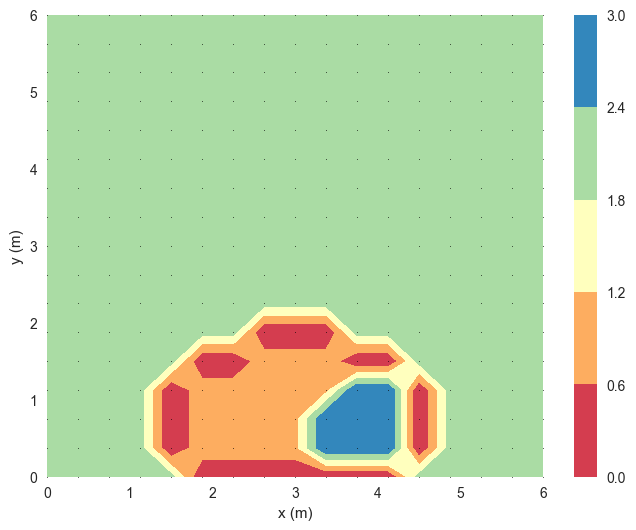

In [69]:
# Plotar os resultados
plt.figure(figsize = ((8,6)))
plt.plot(X, Y, 'ko', markersize=0.5) # Grid
plt.contourf(X, Y, grid, levels=4, cmap='Spectral')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

Precisamos redefinir a função de corrente $\psi$ para calcular a distribuição de temperatura:

In [70]:
# Inicializar a solução
psi = np.zeros((Ny, Nx)) # (Ny linhas) x (Nx colunas)

# Iterar até a convergência da solução
conv = False # Indicador de convergência
count = 0
epsilon = 0.01  # Tolerância de convergência
lamb = 1.85 # Fator de sobrerrelaxação

while not (conv):
    count += 1
    psi_old = psi.copy()
    
    # Nunca entra na última linha da matriz (=0 sempre)
    for j in range(0, Ny-1):
        for i in range(0, Nx):
            if grid[j,i] == FORA:
                if j == 0 and i == 0: # Canto superior esquerdo
                    current = (psi[j, i+1]+psi[j+1, i]+dy*V)/2 

                elif j == 0 and i == Nx-1: # Canto superior direito
                    current = (psi[j,i-1]+psi[j+1,i]+dy*V)/2 

                elif j == 0: # Borda superior
                    current = (dy**2 *(psi[j,i+1]+psi[j,i-1])+2*dx**2 *(psi[j+1,i]+dy*V))/(2*dx**2+2*dy**2)

                elif i == 0: # Borda da esquerda
                    current = (2*dy**2 *psi[j, i+1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)

                elif i == Nx-1: # Borda da direita
                    current = (2*dy**2 *psi[j, i-1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)
                    
                else: # Ponto genérico do interior da malha
                    current = (psi[j,i+1]+psi[j,i-1]+psi[j+1,i]+psi[j-1,i])/4
                
            elif grid[j,i] == DENTRO: # Dentro do carro
                current = 0
                psi[j, i] = 0

            elif grid[j, i] == CONTORNO: # Contorno do carro
                dist_x, dist_y = dist_to_circle(X[j, i], Y[j, i], h, d, L, dx)
                
                b = dist_x/dx
                a = dist_y/dy

                if grid[j, i+1] == DENTRO: # Lado esquerdo do contorno (irregular em x)
                    
                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i+1]+b*psi[j,i-1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i+1]+b*psi[j,i-1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)

                elif grid[j, i-1] == DENTRO: ## Lado direito do contorno (irregular em x)

                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i-1]+b*psi[j,i+1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i-1]+b*psi[j,i+1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)
                    
                elif grid[j+1, i] == DENTRO: # Contorno superior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j+1,i]+a*psi[j-1,i]))/(2*(a+1)**2)
                     
                elif grid[j-1, i] == DENTRO: # Contorno inferior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j-1,i]+a*psi[j+1,i]))/(2*(a+1)**2)
                
            psi[j,i] = lamb*current + (1-lamb)*psi[j,i]  # Atualiza com sobrerrelaxacao
            
    error = np.nanmax(np.abs(np.divide(psi - psi_old, psi, where=(psi!=0))))

    print("Iteração %d - Erro = %.6f" %(count, error))
    if error < epsilon:
        conv = True

Iteração 1 - Erro = 2.700000
Iteração 2 - Erro = 85058276209151067317046014422591083173557175542150868309427250324617029246187851694086844775507547133943398326175188749138576191030760969510603784842975738722203418544895687057280460911080131149399331757511497753423358040143001332256760514701451181065667198650245588189184.000000
Iteração 3 - Erro = 0.931142
Iteração 4 - Erro = 0.824967
Iteração 5 - Erro = 0.874135
Iteração 6 - Erro = 0.402029
Iteração 7 - Erro = 0.451480
Iteração 8 - Erro = 0.539421
Iteração 9 - Erro = 0.287669
Iteração 10 - Erro = 0.225351
Iteração 11 - Erro = 0.202521
Iteração 12 - Erro = 0.152917
Iteração 13 - Erro = 0.144423
Iteração 14 - Erro = 0.095003
Iteração 15 - Erro = 0.101556
Iteração 16 - Erro = 0.100546
Iteração 17 - Erro = 0.161830
Iteração 18 - Erro = 0.140646
Iteração 19 - Erro = 0.089464
Iteração 20 - Erro = 0.091141
Iteração 21 - Erro = 0.086399
Iteração 22 - Erro = 0.092502
Iteração 23 - Erro = 0.080905
Iteração 24 - Erro = 0.082753
Iteração 25 - Erro

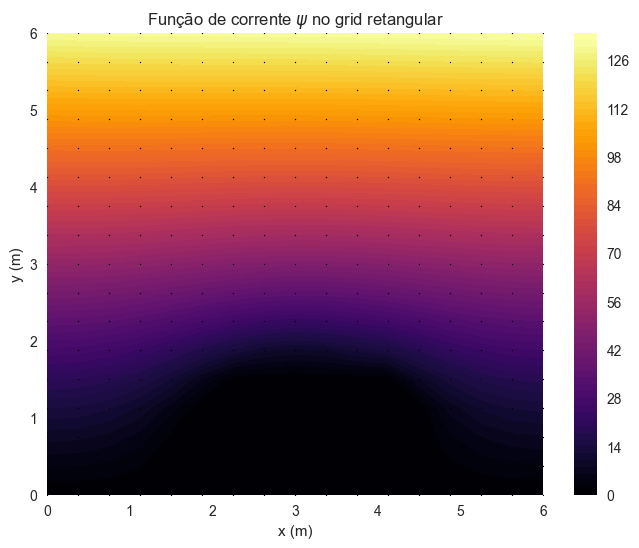

In [71]:
# Corrente
plt.figure(figsize = ((8,6)))
plt.plot(X, Y, 'ko', markersize=1) # Grid

plt.contourf(X, Y, psi, levels=70, vmax=np.max(psi), cmap='inferno')
plt.colorbar()  
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'Função de corrente $\psi$ no grid retangular')
plt.show()

Precisamos redefinir os vetores velocidade $\vec{u} = u\hat{i}+v\hat{j}$ para calcular a distribuição de temperatura, visto que o fenômento depende das velocidades:

In [72]:
u = np.zeros((Ny,Nx))
v = np.zeros((Ny,Nx))

for j in range(0, Ny-1):
    for i in range(0, Nx):
        if j == 0 and i == 0: # Canto superior esquerdo
            v[j, i] = 0
            u[j, i] = V

        elif j == 0 and i == Nx-1: # Canto superior direito
            v[j, i] = 0
            u[j, i] = V

        elif j == 0: # Borda superior
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = V

        elif i == 0: # Borda da esquerda
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        elif i == Nx-1: #Borda da direita
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)
            
        elif (grid[j,i] == DENTRO or grid[j,i] == MOTOR): # Interior do carro/motor
            v[j,i] = 0
            u[j,i] = 0

        else:
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

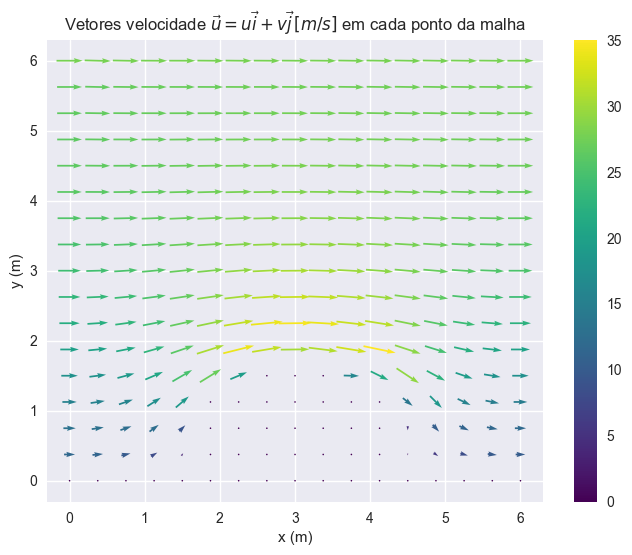

In [73]:
# Velocidade
plt.figure(figsize = ((8,6)))
plt.quiver(X, Y, u, v, np.sqrt(u**2+v**2), angles='xy', scale_units='xy', pivot='mid', scale = 80, cmap='viridis')
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'Vetores velocidade $\vec{u}=u\vec{i}+v\vec{j} \, [m/s]$ em cada ponto da malha')
plt.show()

#### **Interior da Malha**

Para os pontos do interior, vamos utilizar a segunda diferença central para as derivadas de segunda ordem

$$\left.\dfrac{\partial^2 T}{\partial x ^2}\right| _{i,j} = \dfrac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2}$$

$$\left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{i,j} = \dfrac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2}$$

Substituindo na EDP:

$$k\left(\dfrac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2} +\dfrac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2}\right)-\rho \cdot c_p \cdot \left(u_{i,j} \cdot \frac{m\cdot T_{i, j} + n}{\Delta x} + v_{i,j}\cdot\frac{p\cdot T_{i, j} + q}{\Delta y}\right) = 0$$

$$\boxed{\Rightarrow T_{i,j} = \frac{k\left(\frac{T_{i+1,j}+T_{i-1,j}}{\Delta x^2}+\frac{T_{i,j+1}+T_{i,j-1}}{\Delta y^2}\right)-\rho c_p\left(\frac{n\cdot u_{i,j}}{\Delta x} + \frac{q\cdot v_{i,j}}{\Delta y}\right)}{2k\left(\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2}\right)+\rho c_p\left(\frac{m\cdot u_{i,j}}{\Delta x}+\frac{p\cdot v_{i,j}}{\Delta y}\right)}}$$

(Relação válida para todos os pontos **interiores** do *grid*).

--------

- Canto Superior Esquerdo

$$\boxed{T = T_{fora}}$$
$$\dfrac{\partial T}{\partial y} = 0$$

$$\boxed{T_{0, Ny-1} = T_{fora}}$$

--------

- Canto Superior Direito

    $$\boxed{\dfrac{\partial T}{\partial x} = 0, \, \dfrac{\partial T}{\partial y} = 0}$$

    - $X$:

    Expansão em Taylor:

    $$T_{N_x-2,Ny-1} = T_{N_x-1,Ny-1} - \Delta x \cdot \left.\dfrac{\partial T}{\partial x}\right| _{N_x-1,Ny-1} + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,Ny-1}$$
    $$\Rightarrow T_{N_x-2,Ny-1} = T_{N_x-1,Ny-1} - \Delta x \cdot 0 + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,Ny-1}$$

    $$\Rightarrow \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,Ny-1} = \dfrac{2}{\Delta x^2}(T_{N_x-2,Ny-1}-T_{N_x-1,Ny-1})$$

    - $Y$:

    Expansão em Taylor:

    $$T_{N_x-1,Ny-2} = T_{N_x-1,Ny-1} - \Delta y \cdot \left.\dfrac{\partial T}{\partial y}\right| _{N_x-1,Ny-1} + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,Ny-1}$$

    $$\Rightarrow T_{N_x-1,Ny-2} = T_{N_x-1,Ny-1} - \Delta y \cdot 0 + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,Ny-1}$$

    $$\Rightarrow \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,Ny-1} = \dfrac{2}{\Delta y^2}(T_{N_x-1,Ny-2}-T_{N_x-1,Ny-1})$$

    Substituindo na EDP:

    $$k\left[\dfrac{2}{\Delta x^2}(T_{N_x-2,Ny-1}-T_{N_x-1,Ny-1})+\dfrac{2}{\Delta y^2}(T_{N_x-1,Ny-2}-T_{N_x-1,Ny-1}\right]-\rho \cdot c_p (u_{N_x-1,Ny-1} \cdot 0 + v_{N_x-1,Ny-1} \cdot 0)) = 0$$

    $$\Rightarrow k\left[\dfrac{2}{\Delta x^2}(T_{N_x-2,Ny-1}-T_{N_x-1,Ny-1})+\dfrac{2}{\Delta y^2}(T_{N_x-1,Ny-2}-T_{N_x-1,Ny-1})\right] = 0$$

    Como $\Delta x = \Delta y$:

    $$\Rightarrow \dfrac{2k}{\Delta x^2}\left[T_{N_x-2,Ny-1}-T_{N_x-1,Ny-1}+T_{N_x-1,Ny-2}-T_{N_x-1,Ny-1}\right] = 0$$

    $$\boxed{T_{N_x-1,Ny-1} =  \dfrac{T_{N_x-2,Ny-1}+T_{N_x-1,Ny-2}}{2}}$$

--------

- Canto Inferior Esquerdo

$$\boxed{T = T_{fora}}$$
$$\dfrac{\partial T}{\partial y} = 0$$

$$\boxed{T_{0, 0} = T_{fora}}$$

--------

- Canto Inferior Direito

    $$\boxed{\dfrac{\partial T}{\partial x} = 0, \, \dfrac{\partial T}{\partial y} = 0}$$

    - $X$:

    Expansão em Taylor:

    $$T_{N_x-2,0} = T_{N_x-1,0} - \Delta x \cdot \left.\dfrac{\partial T}{\partial x}\right| _{N_x-1,0} + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,0}$$
    $$\Rightarrow T_{N_x-2,0} = T_{N_x-1,0} - \Delta x \cdot 0 + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,0}$$

    $$\Rightarrow \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,0} = \dfrac{2}{\Delta x^2}(T_{N_x-2,0}-T_{N_x-1,0})$$

    - $Y$:

    Expansão em Taylor:

    $$T_{N_x-1,1} = T_{N_x-1,0} + \Delta y \cdot \left.\dfrac{\partial T}{\partial y}\right| _{N_x-1,0} + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,0}$$

    $$\Rightarrow T_{N_x-1,1} = T_{N_x-1,0} + \Delta y \cdot 0 + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,0}$$

    $$\Rightarrow \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,0} = \dfrac{2}{\Delta y^2}(T_{N_x-1,1}-T_{N_x-1,0})$$

    Substituindo na EDP:

    $$k\left[\dfrac{2}{\Delta x^2}(T_{N_x-2,0}-T_{N_x-1,0})+\dfrac{2}{\Delta y^2}(T_{N_x-1,1}-T_{N_x-1,0})\right]-\rho \cdot c_p (u_{N_x-1,0} \cdot 0 + v_{N_x-1,0} \cdot 0)) = 0$$

    $$\Rightarrow k\left[\dfrac{2}{\Delta x^2}(T_{N_x-2,0}-T_{N_x-1,0})+\dfrac{2}{\Delta y^2}(T_{N_x-1,1}-T_{N_x-1,0})\right] = 0$$

    Como $\Delta x = \Delta y$:

    $$\Rightarrow \dfrac{2k}{\Delta x^2}\left[T_{N_x-2,0}-T_{N_x-1,0}+T_{N_x-1,1}-T_{N_x-1,0}\right] = 0$$

    $$\boxed{T_{N_x-1,0} =  \dfrac{T_{N_x-2,0}+T_{N_x-1,1}}{2}}$$

-----------------------------------------------------------------

- **Borda Inferior:** (Neumann)

    $$\boxed{\frac{\partial T}{\partial y}=0}$$ 

    - $X$: 
    
    Segunda Diferença Aproximada Central:
    
    $$\left.\dfrac{\partial^2 T}{\partial x ^2}\right| _{i,0} = \dfrac{T_{i+1,0}-2T_{i,0}+T_{i-1,0}}{\Delta x^2}$$

    - $Y$:
    
    Expansão em Taylor:

    $$T_{i,1} = T_{i,0} + \Delta y \cdot \left.\dfrac{\partial T}{\partial y}\right| _{i,0} + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{i,0}$$
    
    $$T_{i,1} = T_{i,0} + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{i,0}$$

    $$\left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{i,0} = \dfrac{2\cdot (T_{i,1}-T_{i,0})}{\Delta y^2}$$

    $$k\left(\frac{T_{i+1, 0}-2T_{i, 0}+T_{i-1, 0}}{\Delta x^2}+\frac{2}{\Delta y^2}(T_{i, 1}-T_{i, 0})\right)-\rho c_p\left(u_{i, 0}\frac{\partial T}{\partial x}+v_{i, j}\frac{\partial T}{\partial y}\right) = 0$$

    $$k\left(\frac{T_{i+1, 0}-2T_{i, 0}+T_{i-1, 0}}{\Delta x^2}+\frac{2}{\Delta y^2}(T_{i, 1}-T_{i, 0})\right)-\rho c_p\left(u_{i, 0}\frac{m\cdot T_{i, 0} + n}{\Delta x}+v_{i, 0}\frac{p\cdot T_{i, 0} + q}{\Delta y}\right) = 0$$

    $$\boxed{T_{i,0} = \frac{k\left(\frac{T_{i+1,0}+T_{i-1,0}}{\Delta x^2}+\frac{2}{\Delta y^2}T_{i,1}\right)-\rho c_p\left(\frac{n\cdot u_{i,0}}{\Delta x} + \frac{q\cdot v_{i,0}}{\Delta y}\right)}{2k\left(\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2}\right)+\rho c_p\left(\frac{m\cdot u_{i,0}}{\Delta x}+\frac{p\cdot v_{i,0}}{\Delta y}\right)}}$$


-----------------------------------------------------------------

- **Borda Superior**: (Neumann)

    $$\boxed{\frac{\partial T}{\partial y}=0}$$ 

    - $X$: 
    
    Segunda Diferença Aproximada Central:
    
    $$\left.\dfrac{\partial^2 T}{\partial x ^2}\right| _{i,N_y-1} = \dfrac{T_{i+1,N_y-1}-2T_{i,N_y-1}+T_{i-1,N_y-1}}{\Delta x^2}$$

    - $Y$:
    
    Expansão em Taylor:

    $$T_{i,N_y-2} = T_{i,N_y-1} - \Delta y \cdot \left.\dfrac{\partial T}{\partial y}\right| _{i,N_y-1} + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{i,N_y-1}$$
    
    $$T_{i,N_y-2} = T_{i,N_y-1} + \dfrac{\Delta y^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{i,N_y-1}$$

    $$\left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{i,N_y-1} = \dfrac{2\cdot (T_{i,N_y-2}-T_{i,N_y-1})}{\Delta y^2}$$

    $$\Rightarrow k\left(\dfrac{T_{i+1,N_y-1}-2T_{i,N_y-1}+T_{i-1,N_y-1}}{\Delta x^2}+\frac{2}{\Delta y^2}(T_{i, N_y-2}-T_{i, N_y-1})\right)-\rho c_p\left(u_{i, N_y-1}\frac{\partial T}{\partial x}+v_{i, N_y-1}\frac{\partial T}{\partial y}\right) = 0$$

    $$\Rightarrow k\left(\frac{T_{i+1, N_y-1}-2T_{i, N_y-1}+T_{i-1, N_y-1}}{\Delta x^2}+\frac{2}{\Delta y^2}(T_{i, N_y-2}-T_{i, N_y-1})\right)-\rho c_p\left(u_{i, j}\frac{m\cdot T_{i, N_y-1} + n}{\Delta x}+v_{i, N_y-1}\frac{p\cdot T_{i, N_y-1} + q}{\Delta y}\right) = 0$$

    $$\boxed{\Rightarrow T_{i,j} = \frac{k\left(\frac{T_{i+1,N_y-1}+T_{i-1,N_y-1}}{\Delta x^2}+\frac{2}{\Delta y^2}T_{i,N_y-2}\right)-\rho c_p\left(\frac{n\cdot u_{i,N_y-1}}{\Delta x} + \frac{q\cdot v_{i,N_y-1}}{\Delta y}\right)}{2k\left(\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2}\right)+\rho c_p\left(\frac{m\cdot u_{i,N_y-1}}{\Delta x}+\frac{p\cdot v_{i,N_y-1}}{\Delta y}\right)}}$$

-----------------------------------------------------------------

- **Borda Esquerda**: (Dirichlet)

    $$\boxed{T=T_{fora}}$$

    $$\boxed{T_{0, j} = T_{fora}}$$

--------

- **Borda Direita**: (Neumann)

    $$\boxed{\dfrac{\partial T}{\partial x}=0}$$

    $X$ - Expansão em Taylor:

    $$T_{N_x-2,j} = T_{N_x-1,j} - \Delta x \cdot \left.\dfrac{\partial T}{\partial x}\right| _{N_x-1,j} + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,j}$$
    
    $$T_{N_x-2,j} = T_{N_x-1,j} - \Delta x \cdot 0 + \dfrac{\Delta x^2}{2}\cdot \left.\dfrac{\partial^2 T}{\partial x ^2}\right| _{N_x-1,j}$$

    $$\left.\dfrac{\partial^2 T}{\partial x ^2}\right| _{N_x-1,j} = \dfrac{2\cdot (T_{N_x-2,j}-T_{N_x-1,j})}{\Delta x^2}$$

    $Y$ - Segunda Diferença Aproximada Central:

    $$\left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{N_x-1,j} = \dfrac{T_{N_x-1,j+1}-2T_{N_x-1,j}+T_{N_x-1,j-1}}{\Delta y^2}$$

    $$\Rightarrow k\left(\frac{2}{\Delta x^2}(T_{N_x-2, j}-T_{N_x-1, j})+\frac{T_{N_x-1, j+1}-2T_{N_x-1, j}+T_{N_x-1, j-1}}{\Delta y^2}\right)-\rho c_p\left(u_{N_x-1, j}\frac{\partial T}{\partial x}+v_{N_x-1, j}\frac{\partial T}{\partial y}\right) = 0$$

    $$\Rightarrow k\left(\frac{2}{\Delta x^2}(T_{N_x-2, j}-T_{N_x-1, j})+\frac{T_{N_x-1, j+1}-2T_{N_x-1, j}+T_{N_x-1, j-1}}{\Delta y^2}\right)-\rho c_p\left(u_{N_x-1, j}\frac{m\cdot T_{N_x-1, j} + n}{\Delta x}+v_{N_x-1, j}\frac{p\cdot T_{N_x-1, j} + q}{\Delta y}\right) = 0$$

    $$\boxed{\Rightarrow T_{N_x-1,j} = \frac{k\left(\frac{2}{\Delta x^2}T_{N_x-2,j}+\frac{T_{N_x-1,j+1}+T_{N_x-1,j-1}}{\Delta y^2}\right)-\rho c_p\left(\frac{n\cdot u_{N_x-1,j}}{\Delta x} + \frac{q\cdot v_{N_x-1,j}}{\Delta y}\right)}{2k\left(\frac{1}{\Delta x^2}+\frac{1}{\Delta y^2}\right)+\rho c_p\left(\frac{m\cdot u_{N_x-1,j}}{\Delta x}+\frac{p\cdot v_{N_x-1,j}}{\Delta y}\right)}}$$
-----------------------------------------------------------------

#### Contorno Irregular no Veículo

Para os **lados esquerdo e direito** do contorno, sempre haverá contorno irregular em $x$, mas precisamos verificar se também existirá em $y$.
Se não existir, podemos aplicar diretamente diferença central e regressiva em $y$.
Para as **partes superior e inferior** do contorno, sempre haverá contorno irregular em $y$, sendo que em $x$ o contorno é regular, então podemos usar diretamente diferença central e regressiva em $x$.

Vamos considerar que $(i,j)$ é ponto do contorno.

--------

#### Lado Esquerdo do Contorno

- Irregular somente em x:

$$T_{i+1,j} = T_{i,j}+b\Delta x\cdot \left.\dfrac{\partial T}{\partial x}\right|_{i,j} + \dfrac{(b\Delta x)^2}{2} \cdot \left.\dfrac{\partial^2 T}{\partial x^2}\right|_{i,j}$$
$$T_{i-1,j} = T_{i,j}-\Delta x\cdot \left.\dfrac{\partial T}{\partial x}\right|_{i,j} + \dfrac{\Delta x^2}{2} \cdot \left.\dfrac{\partial^2 T}{\partial x^2}\right|_{i,j}$$

Multiplicando a segunda equação por $b$ e somando as duas resulta em:

$$\left.\dfrac{\partial^2 T}{\partial x^2}\right|_{i,j} = \dfrac{2[T_{i+1,j}+bT_{i-1,j}-(1+b)T_{i,j}]}{\Delta x^2 (b^2+b)}$$

Segunda diferença central em $y$:

$$\left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{i,j} = \dfrac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2}$$

Substituindo na EDP:

$$k\left\{\dfrac{2[T_{i+1,j}+bT_{i-1,j}-(1+b)T_{i,j}]}{\Delta x^2(b^2+b)} + \dfrac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2}\right\} -\rho c_p\left(u_{i, j}\frac{m\cdot T_{i, j} + n}{\Delta x}+v_{i, j}\frac{p\cdot T_{i, j} + q}{\Delta y}\right) = 0$$



Isolando $T_{i,j}:$

$$\boxed{T_{i, j} = \frac{{k \left( \frac{2[{T_{i+1,j} +bT_{i-1,j}}]}{{\Delta x^2(b^2+b)}} + \frac{T_{i, j+1}+T_{i, j-1}}{{\Delta y^2}} \right) - \rho c_p \left(\frac{{u_{i,j}\cdot n}}{{\Delta x}} +  \frac{{v_{i, j}\cdot q}}{{\Delta y}} \right)}}{{2k \left(\frac{1}{{b \cdot\Delta x^2}} + \frac{1}{{\Delta y^2}} \right)}+\rho c_p\left(\frac{u_{i,j}\cdot m}{\Delta x}+\frac{v_{i,j}\cdot p}{\Delta y}\right)}}$$



------------------

- Irregular em x e em y:

$$T_{i+1,j} = T_{i,j}+b\Delta x\cdot \left.\dfrac{\partial T}{\partial x}\right|_{i,j} + \dfrac{(b\Delta x)^2}{2} \cdot \left.\dfrac{\partial^2 T}{\partial x^2}\right|_{i,j}$$
$$T_{i-1,j} = T_{i,j}-\Delta x\cdot \left.\dfrac{\partial T}{\partial x}\right|_{i,j} + \dfrac{\Delta x^2}{2} \cdot \left.\dfrac{\partial^2 T}{\partial x^2}\right|_{i,j}$$

Multiplicando a segunda equação por $b$ e somando as duas resulta em:

$$\left.\dfrac{\partial^2 T}{\partial x^2}\right|_{i,j} = \dfrac{2[T_{i+1,j}+bT_{i-1,j}-(1+b)T_{i,j}]}{\Delta x^2 (b^2+b)}$$

$$T_{i,j-1} = T_{i,j}-a\Delta y\cdot \left.\dfrac{\partial T}{\partial y}\right|_{i,j} + \dfrac{(a\Delta y)^2}{2} \cdot \left.\dfrac{\partial^2 T}{\partial y^2}\right|_{i,j}$$
$$T_{i,j+1} = T_{i,j}+\Delta y\cdot \left.\dfrac{\partial T}{\partial y}\right|_{i,j} + \dfrac{\Delta y^2}{2} \cdot \left.\dfrac{\partial^2 T}{\partial y^2}\right|_{i,j}$$

Multiplicando a segunda equação por $a$ e somando as duas resulta em:

$$\left.\dfrac{\partial^2 T}{\partial y^2}\right|_{i,j} = \dfrac{2[T_{i,j-1}+aT_{i,j+1}-(1+a)T_{i,j}]}{\Delta y^2 (a^2+a)}$$

Substituindo na EDP:

$$k\left\{\dfrac{2[T_{i+1,j}+bT_{i-1,j}-(1+b)T_{i,j}]}{\Delta x^2 (b^2+b)} + \dfrac{2[T_{i,j-1}+aT_{i,j+1}-(1+a)T_{i,j}]}{\Delta y^2 (a^2+a)}\right\} -\rho c_p\left(u_{i, j}\frac{m\cdot T_{i, j} + n}{\Delta x}+v_{i, j}\frac{p\cdot T_{i, j} + q}{\Delta y}\right) = 0$$


Isolando $T_{i,j}:$

$$\boxed{T_{i, j} = \frac{{k \left(\frac{2[{T_{i+1,j} +bT_{i-1,j}}]}{{\Delta x^2(b^2+b)}} + \frac{2[{T_{i,j-1} +aT_{i,j+1}}]}{{\Delta y^2(a^2+a)}} \right) - \rho c_p \left(\frac{{u_{i,j}\cdot n}}{{\Delta x}} +  \frac{{v_{i, j}\cdot q}}{{\Delta y}} \right)}}{{2k \left(\frac{1}{{b \cdot\Delta x^2}} + \frac{1}{{a \Delta y^2}} \right)}+\rho c_p\left(\frac{u_{i,j}\cdot m}{\Delta x}+\frac{v_{i,j}\cdot p}{\Delta y}\right)}}$$

--------

#### Lado Direito do Contorno

Para o lado direito, os cálculos são análogos.

- Irregular somente em x:

    $$\left.\dfrac{\partial^2 T}{\partial x^2}\right|_{i,j} = \dfrac{2[T_{i-1,j}+bT_{i_1,j}-(1+b)T_{i,j}]}{\Delta x^2 (b^2+b)}$$

    $$\left.\dfrac{\partial^2 T}{\partial y ^2}\right| _{i,j} = \dfrac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2}$$

    Substituindo na EDP:

    $$k\left\{\dfrac{2[T_{i-1,j}+bT_{i+1,j}-(1+b)T_{i,j}]}{\Delta x^2(b^2+b)} + \dfrac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2}\right\} -\rho c_p\left(u_{i, j}\frac{m\cdot T_{i, j} + n}{\Delta x}+v_{i, j}\frac{p\cdot T_{i, j} + q}{\Delta y}\right) = 0$$

    Isolando $T_{i,j}:$



$$\boxed{T_{i, j} = \frac{{k \left( \frac{2[{T_{i-1,j} +bT_{i+1,j}}]}{{\Delta x^2(b^2+b)}} + \frac{T_{i, j+1}+T_{i, j-1}}{{\Delta y^2}} \right) - \rho c_p \left(\frac{{u_{i,j}\cdot n}}{{\Delta x}} +  \frac{{v_{i, j}\cdot q}}{{\Delta y}} \right)}}{{2k \left(\frac{1}{{b \cdot\Delta x^2}} + \frac{1}{{\Delta y^2}} \right)}+\rho c_p\left(\frac{u_{i,j}\cdot m}{\Delta x}+\frac{v_{i,j}\cdot p}{\Delta y}\right)}}$$



------------

- Irregular em x e em y:

    $$\left.\dfrac{\partial^2 T}{\partial x^2}\right|_{i,j} = \dfrac{2[T_{i-1,j}+bT_{i_1,j}-(1+b)T_{i,j}]}{\Delta x^2 (b^2+b)}$$

    $$\left.\dfrac{\partial^2 T}{\partial y^2}\right|_{i,j} = \dfrac{2[T_{i,j-1}+aT_{i,j+1}-(1+a)T_{i,j}]}{\Delta y^2 (a^2+a)}$$



Substituindo na EDP:

$$k\left\{\dfrac{2[T_{i-1,j}+bT_{i+1,j}-(1+b)T_{i,j}]}{\Delta x^2 (b^2+b)} + \dfrac{2[T_{i,j-1}+aT_{i,j+1}-(1+a)T_{i,j}]}{\Delta y^2 (a^2+a)}\right\} -\rho c_p\left(u_{i, j}\frac{m\cdot T_{i, j} + n}{\Delta x}+v_{i, j}\frac{p\cdot T_{i, j} + q}{\Delta y}\right) = 0$$




Substituindo na EDP:

$$k\left\{\dfrac{2[T_{i-1,j}+bT_{i+1,j}-(1+b)T_{i,j}]}{\Delta x^2 (b^2+b)} + \dfrac{2[T_{i,j-1}+aT_{i,j+1}-(1+a)T_{i,j}]}{\Delta y^2 (a^2+a)}\right\} -\rho c_p\left(u_{i, j}\frac{m\cdot T_{i, j} + n}{\Delta x}+v_{i, j}\frac{p\cdot T_{i, j} + q}{\Delta y}\right) = 0$$



#### Parte Superior do Contorno

Segunda diferença central em $x$:

$$\left.\dfrac{\partial^2 T}{\partial x ^2}\right| _{i,j} = \dfrac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2}$$

Contorno irregular em $y$:

$$T_{i,j-1} = T_{i,j}-a\Delta y\cdot \left.\dfrac{\partial T}{\partial y}\right|_{i,j} + \dfrac{(a\Delta y)^2}{2} \cdot \left.\dfrac{\partial^2 T}{\partial y^2}\right|_{i,j}$$
$$T_{i,j+1} = T_{i,j}+\Delta y\cdot \left.\dfrac{\partial T}{\partial y}\right|_{i,j} + \dfrac{\Delta y^2}{2} \cdot \left.\dfrac{\partial^2 T}{\partial y^2}\right|_{i,j}$$

Multiplicando a segunda equação por $a$ e somando as duas resulta em:

$$\left.\dfrac{\partial^2 T}{\partial y^2}\right|_{i,j} = \dfrac{2[T_{i,j-1}+aT_{i,j+1}-(1+a)T_{i,j}]}{\Delta y^2 (a^2+a)}$$

Substituindo na EDP:

$$k\left\{\dfrac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2} + \dfrac{2[T_{i,j-1}+aT_{i,j+1}-(1+a)T_{i,j}]}{\Delta y^2 (a^2+a)}\right\} -\rho c_p\left(u_{i, j}\frac{m\cdot T_{i, j} + n}{\Delta x}+v_{i, j}\frac{p\cdot T_{i, j} + q}{\Delta y}\right) = 0$$



Isolando $T_{i,j}:$

$$\boxed{T_{i, j} = \frac{{k \left( \frac{{T_{i+1,j} + T_{i-1,j}}}{{\Delta x^2}} + \frac{{2[T_{i,j-1} + aT_{i,j+1}]}}{{\Delta y^2 (a^2+a)}} \right) - \rho c_p \left(\frac{{u_{i,j}\cdot n}}{{\Delta x}} +  \frac{{v_{i, j}\cdot q}}{{\Delta y}} \right)}}{{2k \left(\frac{1}{{\Delta x^2}} + \frac{1}{{ a\cdot \Delta y^2}} \right)}+\rho c_p\left(\frac{u_{i,j}\cdot m}{\Delta x}+\frac{v_{i,j}\cdot p}{\Delta y}\right)}}$$


--------

#### Parte Inferior do Contorno

Para a parte inferior, os cálculos são análogos.


$$\left.\dfrac{\partial^2 T}{\partial x ^2}\right| _{i,j} = \dfrac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2}$$

$$\left.\dfrac{\partial^2 T}{\partial y^2}\right|_{i,j} = \dfrac{2[T_{i,j+1}+aT_{i,j-1}-(1+a)T_{i,j}]}{\Delta y^2 (a^2+a)}$$

Substituindo na EDP:

$$k\left\{\dfrac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2} + \dfrac{2[T_{i,j+1}+aT_{i,j-1}-(1+a)T_{i,j}]}{\Delta y^2 (a^2+a)}\right\} -\rho c_p\left(u_{i, j}\frac{m\cdot T_{i, j} + n}{\Delta x}+v_{i, j}\frac{p\cdot T_{i, j} + q}{\Delta y}\right) = 0$$



Isolando $T_{i,j}:$

$$\boxed{T_{i, j} = \frac{{k \left( \frac{{T_{i+1,j} + T_{i-1,j}}}{{\Delta x^2}} + \frac{{2[T_{i,j+1} + aT_{i,j-1}]}}{{\Delta y^2 (a^2+a)}} \right) - \rho c_p \left(\frac{{u_{i,j}\cdot n}}{{\Delta x}} +  \frac{{v_{i, j}\cdot q}}{{\Delta y}} \right)}}{{2k \left(\frac{1}{{\Delta x^2}} + \frac{1}{{ a\cdot \Delta y^2}} \right)}+\rho c_p\left(\frac{u_{i,j}\cdot m}{\Delta x}+\frac{v_{i,j}\cdot p}{\Delta y}\right)}}$$

--------

In [74]:
# Inicializar a solução
T = np.zeros((Ny, Nx)) # (Ny linhas) x (Nx colunas)

# Iterar até a convergência da solução
conv = False # Indicador de convergência
count = 0
epsilon = 0.01  # Tolerância de convergência
lamb = 1.15 # Fator de sobrerrelaxação

while not (conv):
    count += 1
    T_old = T.copy()
    
    for j in range(0, Ny):
        for i in range(0, Nx):
            if (u[j, i] > 0 and i>0):
                m = 1
                n = -T[j, i-1]
            elif (u[j, i] < 0 and i<Nx-1):
                m = -1
                n = T[j, i+1]

            if (v[j, i] > 0 and j>0):
                p = 1
                q = -T[j-1, i]

            elif (v[j, i] < 0 and j<Ny-1):
                p = -1
                q = T[j+1, i]

            if grid[j,i] == FORA:
                if j == 0 and i == 0: # Canto superior esquerdo
                    current = Tfora
                    T[j, i] = Tfora

                elif j == 0 and i == Nx-1: # Canto superior direito
                    current = (T[j,i-1]+T[j+1,i])/2 
                    
                elif j == Ny-1 and i == 0: # Canto inferior esquerdo
                    current = Tfora
                    T[j, i] = Tfora
                    
                elif j == Ny-1 and i == Nx-1: # Canto inferior direito
                    current = (T[j,i-1]+T[j-1,i])/2 

                elif j == Ny-1: # Borda inferior
                    current = (k*((T[j, i+1]+T[j, i-1])/(dx**2)+2*T[j-1, i]/(dy**2))-ro*cp_ar*(n*u[j, i]/dx+q*v[j, i]/dy))/(2*k*(1/(dx**2)+1/(dy**2))+ro*cp_ar*(m*u[j, i]/dx+p*v[j, i]/dy))

                elif j == 0: # Borda superior
                    current = (k*((T[j, i+1]+T[j, i-1])/(dx**2)+2*T[j+1, i]/(dy**2))-ro*cp_ar*(n*u[j, i]/dx+q*v[j, i]/dy))/(2*k*(1/(dx**2)+1/(dy**2))+ro*cp_ar*(m*u[j, i]/dx+p*v[j, i]/dy))

                elif i == 0: # Borda da esquerda
                     current = Tfora
                     T[j, i] = Tfora

                elif i == Nx-1: # Borda da direita
                    current = (k*((T[j+1, i]+T[j-1, i])/(dy**2)+2*T[j, i-1]/(dx**2))-ro*cp_ar*(n*u[j, i]/dx+q*v[j, i]/dy))/(2*k*(1/(dx**2)+1/(dy**2))+ro*cp_ar*(m*u[j, i]/dx+p*v[j, i]/dy))
                    
                else: # Ponto genérico do interior da malha
                    current = (k*((T[j+1, i]+T[j-1, i])/(dy**2)+T[j, i+1]+T[j, i-1]/(dx**2))-ro*cp_ar*(n*u[j, i]/dx+q*v[j, i]/dy))/(2*k*(1/(dx**2)+1/(dy**2))+ro*cp_ar*(m*u[j, i]/dx+p*v[j, i]/dy))
            
            elif grid[j, i] == MOTOR:
                current = Tmotor
                T[j, i] = Tmotor
                    
               
            elif grid[j,i] == DENTRO: # Dentro do carro
                current = Tdentro
                T[j, i] = Tdentro

            elif grid[j, i] == CONTORNO: # Contorno do carro
                dist_x, dist_y = dist_to_circle(X[j, i], Y[j, i], h, d, L, dx)
                
                b = dist_x/dx
                a = dist_y/dy

                if grid[j, i+1] == DENTRO: # Lado esquerdo do contorno (irregular em x)
                    
                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = (k*(2*(T[j, i+1]+b*T[j, i-1])/((b**2+b)*dx**2)+2*(T[j+1, i]+a*T[j-1, i])/((a**2+a)*dy**2))-ro*cp_ar*(u[j, i]*n/dx+v[j, i]*q/dy))/(2*k*(1/(b*dx**2)+1/(a*dy**2))+ro*cp_ar*(u[j, i]*m/dx+v[j, i]*p/dy))
                        
                    else: # regular em y
                        current = (k*(2*(T[j, i+1]+b*T[j, i-1])/((b**2+b)*dx**2)+(T[j-1, i]+T[j+1, i])/(dy**2))-ro*cp_ar*(u[j, i]*n/dx+v[j, i]*q/dy))/(2*k*(1/(b*dx**2)+1/(dy**2))+ro*cp_ar*(u[j, i]*m/dx+v[j, i]*p/dy))

                elif grid[j, i-1] == DENTRO: ## Lado direito do contorno (irregular em x)

                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = (k*(2*(T[j, i-1]+b*T[j, i+1])/((b**2+b)*dx**2)+2*(T[j+1, i]+T[j-1, i])/((a**2+a)*dy**2))-ro*cp_ar*(u[j, i]*n/dx+v[j, i]*q/dy))/(2*k*(1/(b*dx**2)+1/(a*dy**2))+ro*cp_ar*(u[j, i]*m/dx+v[j, i]*p/dy))
                        
                    else: # regular em y
                        current = (k*(2*(T[j, i-1]+b*T[j, i+1])/((b**2+b)*dx**2)+(T[j-1, i]+T[j+1, i])/(dy**2))-ro*cp_ar*(u[j, i]*n/dx+v[j, i]*q/dy))/(2*k*(1/(b*dx**2)+1/(dy**2))+ro*cp_ar*(u[j, i]*m/dx+v[j, i]*p/dy))
                    
                elif j < Ny-1:
                    if grid[j+1, i] == DENTRO: # Contorno superior
                    
                        current = (k*((T[j, i+1]+T[j, i-1])/(dx**2)+2*(T[j+1, i]+a*T[j-1, i])/((a**2+a)*dy**2))-ro*cp_ar*(u[j, i]*n/dx+v[j, i]*q/dy))/(2*k*(1/(dx**2)+1/(a*dy**2))+ro*cp_ar*(u[j, i]*m/dx+v[j, i]*p/dy))
                
                elif i < Nx-1 and j < Ny-1:
                    if grid[j-1, i] == DENTRO: # Contorno inferior
                    
                        current = (k*((T[j, i+1]+T[j, i-1])/(dx**2)+(T[j-1, i]+a*T[j+1, i])/((a**2+a)*dy**2))-ro*cp_ar*(u[j, i]*n/dx+v[j, i]*q/dy))/(2*k*(1/(dx**2)+1/(a*dy**2))+ro*cp_ar*(u[j, i]*m/dx+v[j, i]*p/dy))
            
    
            T[j,i] = lamb*current + (1-lamb)*T[j,i]  # Atualiza com sobrerrelaxacao
            
    error = np.nanmax(np.abs(np.divide(T - T_old, T, where=(T!=0))))

    print("Iteração %d - Erro = %.6f" %(count, error))
    if error < epsilon:
        conv = True

Iteração 1 - Erro = 1.000000
Iteração 2 - Erro = 435.250394
Iteração 3 - Erro = 2.093386
Iteração 4 - Erro = 181.007787
Iteração 5 - Erro = 11.438695
Iteração 6 - Erro = 897.804131
Iteração 7 - Erro = 26.251863
Iteração 8 - Erro = 29.943668
Iteração 9 - Erro = 2.093678
Iteração 10 - Erro = 1.511143
Iteração 11 - Erro = 0.440107
Iteração 12 - Erro = 0.267649
Iteração 13 - Erro = 0.106884
Iteração 14 - Erro = 0.046993
Iteração 15 - Erro = 0.018334
Iteração 16 - Erro = 0.007107


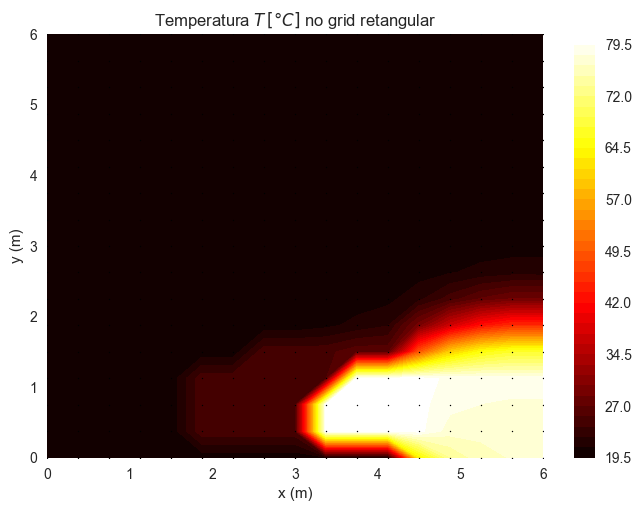

In [75]:
# Temperatura
plt.plot(X, Y, 'ko', markersize=1) # Grid

plt.contourf(X, Y, T, levels=50, vmax=np.max(T), cmap='hot')
plt.colorbar()  
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'Temperatura $T \, [°C]$ no grid retangular')
plt.show()


#### $(b)$ A taxa de calor retirada do carro

O fluxo de calor $\vec{Q}(x, y)$ (em $W/m^2$) que flui através das superfícies externa do carro é dado por:

$$\vec{Q}|_{prédio} = -k\dfrac{\partial T}{\partial n} \vec{n} = -(k\nabla T \cdot \vec{n})\vec{n}$$

Em que $\vec{n}$ é o versor normal a carroceria do carro $\textbf{direcionado para fora}$.

Assim, a quantidade de calor total (unidade $W$) trocada pela área $A$ do veículo com o ar é:

$$q = \int_A \vec{Q}\cdot \vec{n} \, dA = -\int_A k\dfrac{\partial T}{\partial n}dA = -\int_A k\nabla T \cdot \vec{n} \,dA$$

Vamos criar um filtro, exatamente como na parte das pressões, para pegar apenas os pontos de contorno do carro:

In [76]:
# Cria um Fitro
filter = np.zeros_like(T)
filter[grid == CONTORNO] = 1
T_cont = T*filter

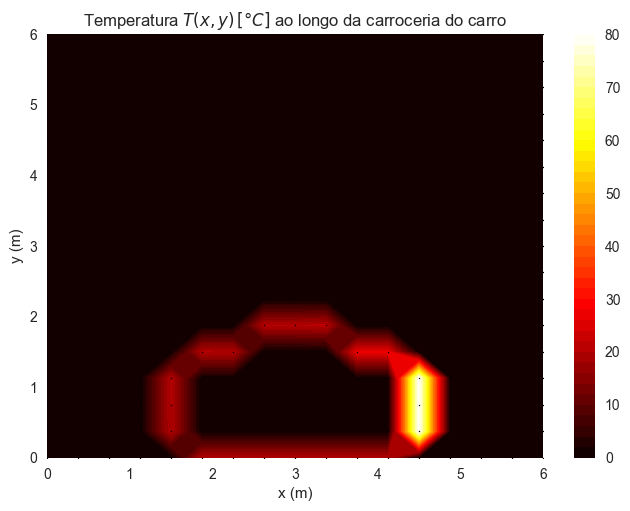

In [77]:
# Temperatura
plt.plot(X, Y, 'ko', markersize=1) # Grid

plt.contourf(X, Y, T_cont, levels=50, vmax=np.max(T), cmap='hot')
plt.colorbar()  
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'Temperatura $T(x,y) \, [°C]$ ao longo da carroceria do carro')
plt.show()

A fórmula para o fluxo de calor $\vec{Q}$ em cada ponto da malha fica:

$$\vec{Q} = -k\dfrac{\partial T}{\partial n} \vec{n} = - (k\nabla T \cdot \vec{n})\cdot \vec{n}$$

O gradiente de temperatura é dado por $\nabla T = \left(\dfrac{\partial T}{\partial x},\dfrac{\partial T}{\partial y}\right) = \dfrac{\partial T}{\partial x}\hat{i} + \dfrac{\partial T}{\partial y}\hat{j}$

Seja $\vec{n}$ o versor normal a superfície do carro, ele pode ser decomposto como $\vec{n} = \cos(\theta) \hat{i} + \sin(\theta) \hat{j}$. 

$$\Rightarrow (k\nabla T \cdot \vec{n}) = k \dfrac{\partial T}{\partial x} \cos(\theta) + k \dfrac{\partial T}{\partial y} \sin(\theta)$$

Assim, a fórmula do fluxo fica:

$$\vec{Q} = -k \left(\dfrac{\partial T}{\partial x} \cos(\theta) + \dfrac{\partial T}{\partial y} \sin(\theta)\right) \vec{n} = -k \left(\dfrac{\partial T}{\partial x} \cos(\theta) + \dfrac{\partial T}{\partial y} \sin(\theta)\right)\cos(\theta) \hat{i} -k \left(\dfrac{\partial T}{\partial x} \cos(\theta) + \dfrac{\partial T}{\partial y} \sin(\theta)\right) \sin(\theta) \hat{j}$$

$$\Rightarrow \boxed{Q_x = -k \left(\dfrac{\partial T}{\partial x} \cos(\theta) + \dfrac{\partial T}{\partial y} \sin(\theta)\right)\cos(\theta)}$$

$$\Rightarrow \boxed{Q_y = -k \left(\dfrac{\partial T}{\partial x} \cos(\theta) + \dfrac{\partial T}{\partial y} \sin(\theta)\right) \sin(\theta) }$$

Assim como utilizado anteriormente, a derivada de primeira ordem da temperatura pode ser aproximada nos pontos da superfície do carro por:

$$\left.\frac{\partial T}{\partial x}\right|_{i,j} = \frac{m\cdot T_{i, j} + n}{\Delta x}$$

$$\left.\frac{\partial T}{\partial y}\right|_{i,j} = \frac{p\cdot T_{i, j} + q}{\Delta y}$$

onde $m$, $n$, $p$ e $q$ dependem da direção do fluxo de ar, ou seja, de $u$ e $v$.

- Se $u > 0$: $m = 1$, $n = -T_{i-1, j}$
- Se $u < 0$: $m = -1$, $n = T_{i+1, j}$
- Se $v > 0$: $p = 1$, $q = -T_{i, j-1}$
- Se $v < 0$: $p = -1$, $q = T_{i, j+1}$

Vamos dividir nos dois trechos do contorno do carro:

1) Parte Circular do Contorno

    $$Q_x = -k \left(\dfrac{\partial T}{\partial x} \cos(\theta) + \dfrac{\partial T}{\partial y} \sin(\theta)\right)\cos(\theta)$$

    $$Q_y = -k \left(\dfrac{\partial T}{\partial x} \cos(\theta) + \dfrac{\partial T}{\partial y} \sin(\theta)\right) \sin(\theta) $$

2) Base Reta do Contorno

    $$\theta = -90° \Rightarrow \cos(\theta)=0, \, \sin(\theta)=-1$$

    $$Q_x = 0$$

    $$Q_y = -k \left(\dfrac{\partial T}{\partial x} \cdot 0 + \dfrac{\partial T}{\partial y} \cdot (-1)\right) \cdot (-1)  = -k\dfrac{\partial T}{\partial y}$$

Implementando as fórmulas:

In [78]:
Qx = np.zeros((Ny,Nx))
Qy = np.zeros((Ny,Nx))

for j in range(0, Ny):
    for i in range(0, Nx):
        
        # Define a primeira derivada de acordo com a velocidade (u,v)
        if (u[j, i] > 0 and i>0):
            m = 1
            n = -T_cont[j, i-1]
        elif (u[j, i] < 0 and i<Nx-1):
            m = -1
            n = T_cont[j, i+1]

        if (v[j, i] > 0 and j>0):
            p = 1
            q = -T_cont[j-1, i]

        elif (v[j, i] < 0 and j<Ny-1):
            p = -1
            q = T_cont[j+1, i]

        if grid[j,i] == CONTORNO:
            if (grid[j-1,i] == DENTRO or grid[j-1,i] == MOTOR):# contorno inferior
                Qx[j,i] = 0
                Qy[j,i] = -k*((p*T_cont[j,i]+q)/dy)
            else: # contorno superior
                Qx[j,i] = -k*(((m*T_cont[j,i]+n)/dx)*np.cos(theta[j,i])+((p*T_cont[j,i]+q)/dy)*np.sin(theta[j,i]))*np.cos(theta[j,i])
                Qy[j,i] = -k*(((m*T_cont[j,i]+n)/dx)*np.cos(theta[j,i])+((p*T_cont[j,i]+q)/dy)*np.sin(theta[j,i]))*np.sin(theta[j,i])

Podemos exibir os vetores fluxo de calor $\vec{Q}(x,y)$ em um gráfico com a função `.quiver` do *MatplotLib*:

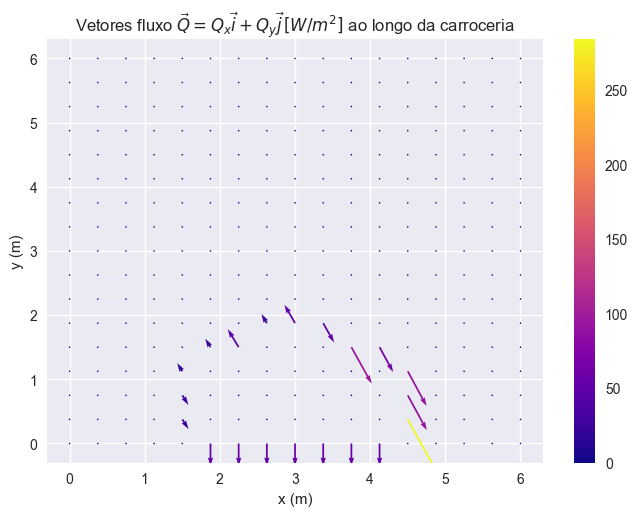

In [79]:
# Fluxo de calor Q
plt.quiver(X, Y, Qx, Qy, np.sqrt(Qx**2+Qy**2), angles='xy', scale_units='xy', pivot='tail', cmap = 'plasma', scale = 150)
plt.colorbar()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(r'Vetores fluxo $\vec{Q}=Q_x\vec{i}+Q_y\vec{j} \, [W/m^2]$ ao longo da carroceria')
plt.show()

Tendo a distribuição de $\vec{Q}$, podemos calcular a quantidade de calor total $q$ trocada pela superfície do veículo com o ar:

Por estarmos trabalhando com uma simulação bidimensional, novamente a integral de superfície reduz-se a uma integral de linha (sobre uma linha de pontos).

$$q = \int_A \vec{Q}\cdot \vec{n} \, dA$$

Primeiro, precisamos calcular o elemento infinitesimal de "área" $dA$:

1) Parte Circular do Contorno

    Vamos utilizar a relação de arcos e ângulos no setor circular:

    $$d\theta = \dfrac{dA}{R} = \dfrac{dA}{L/2} \Rightarrow dA = \dfrac{L}{2}d\theta$$

    O ângulo $\theta$ deve ser integrado de $0$ a $\pi$ para varrer todo o semicírculo:

    $$q_1 = \dfrac{L}{2} \int_{0}^{\pi} \vec{Q}_1\cdot \vec{n} \, d\theta =\dfrac{L}{2} \int_{0}^{\pi} |\vec{Q}_1| \, d\theta  = \dfrac{L}{2} \int_{0}^{\pi} \sqrt{Q_{1x}^2+Q_{1y}^2} \, d\theta $$

2) Base Reta do Contorno

    A base é um segmento de reta horizontal com início em $x=d$ e fim em $x=d+L$. Vamos considerar que o comprimento de cada elemento infinitesimal é $dA=dx$.
    
    A integral fica:

    $$q_2 = \int_d^{d+L} \vec{Q}_2\cdot \vec{n} \, dx = \int_d^{d+L} |\vec{Q}_2| \, dx = \int_d^{d+L} \sqrt{Q_{2x}^2+Q_{2y}^2} \, dx  $$

    Portanto, a quantidade de calor total trocada ao longo da carroceria fica:

    $$q_R =\dfrac{L}{2} \int_{0}^{\pi} \sqrt{Q_{1x}^2+Q_{1y}^2} \, d\theta  + \int_d^{d+L} \sqrt{Q_{2x}^2+Q_{2y}^2} \, dx$$

    Considerando um $\Delta x$ pequeno, vamos utilizar uma aproximação de que $\Delta \theta$ é o ângulo total da parte circular do contorno ($\pi$) multiplicado por $\Delta x$.

Precisamos do ângulo $\theta$ ao longo da carroceria para fazer a integral na parte circular:

In [80]:
# Cálculo do ângulo theta
theta = np.arctan2(Y - h, X - (d + L / 2))

Exibindo o resultado:

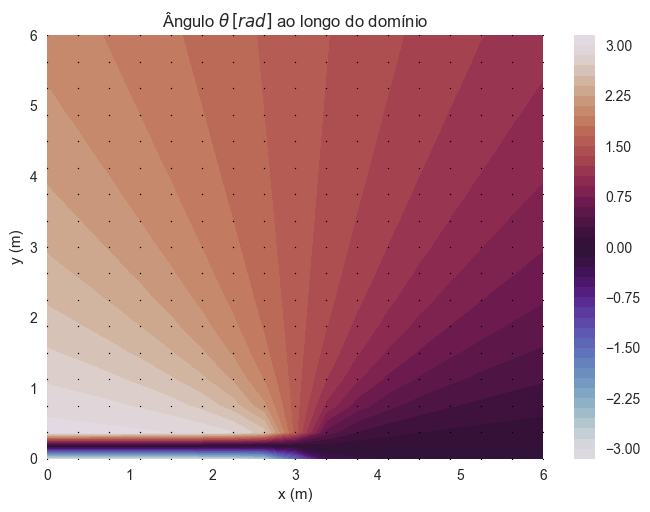

In [81]:
# Theta
plt.contourf(X, Y, theta, levels=50, vmax=np.max(theta), cmap='twilight')
plt.plot(X, Y, 'ko', markersize=1) # Grid
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title(r'Ângulo $\theta \, [rad]$ ao longo do domínio')
plt.show()

Implementando a integral aproximada ao longo da superfície (contorno do carro):

*Obs.: Como todos os fluxos na superfície do carro "apontam para fora dele", eles retiram calor, logo $q<0$ nesses pontos.*

In [82]:
q1 = 0 # calor trocado no contorno circular
q2 = 0 # calor trocado no contorno inferior

dtheta = np.pi*dx

for j in range(0, Ny):
    for i in range(0, Nx):
        if grid[j,i] == CONTORNO:
            if grid[j-1,i] == DENTRO: # contorno inferior
                q2 += -np.sqrt(Qx[j,i]**2+Qy[j,i]**2)*dx
            else: # contorno superior
                q1 += -(L/2)*np.sqrt(Qx[j,i]**2+Qy[j,i]**2)*dtheta

qr = q1 + q2

print('q1 = %f W, q2 = %f W' %(q1, q2))
print("Calor Total = %f W" %qr)

q1 = -1848.516706 W, q2 = -79.737591 W
Calor Total = -1928.254297 W


Temos um calor total retirado de $q = -1928,254297 \, W$, ou seja, $q \approx -1,93 \, kW$.

### **2.3 Parte III**

Resolva novamente as equações, analisando agora apenas a força vertical resultante,
mas dessa vez:

#### $(a)$ Varie os parâmetros do carro, como altura ($h=0,10; 0,05; 0,20; 0,025 \, m$).

In [420]:
V = 100/3.6
# Dimensoes do carro
h = 0.1
L = 3
# Propriedades do ar
ro = 1.25
gama_ar = 1.4
k_ar = 0.026
cp_ar = 1002
# Dimensoes do dominio
d = 0.5*L
H = 2*L

In [421]:
# Domínio do problema
Lx = L + 2*d 
Ly = H  
dx = 0.05
dy = dx

Nx = int((Lx/dx)+1) # elementos de malha em x
Ny = int((Ly/dy)+1) # elementos de malha em y

# Criar a malha retangular de pontos
x = np.linspace(0, Lx, Nx)
y = np.linspace(Ly, 0, Ny)
X, Y = np.meshgrid(x, y)

def Ycarro(x):
    if (x>d and x<d+L):
        y = (np.sqrt((L/2)**2 - (x-d-L/2)**2) + h)
    else:
        y=0
    return y

mask = (X - d - L/2)**2 + (Y - h)**2 > (L/2)**2
mask |= Y < h

x_carro = np.ma.masked_array(X, mask=mask)
y_carro = np.ma.masked_array(Y, mask=mask)

border = (X - d - L/2)**2 + (Y - h)**2 >= (L/2)**2
border |= Y <= h

x_border = np.ma.masked_array(X, mask=~border)
y_border = np.ma.masked_array(Y, mask=~border)

grid = np.zeros((Ny, Nx))

CONTORNO = 0
DENTRO = 1
FORA = 2

grid[~mask] = DENTRO # interior do carro
grid[mask] = FORA # fora do carro

for j in range(Ny-1):
    for i in range(Nx-1):
        if grid[j, i] == DENTRO:
            if grid[j, i-1] == FORA:
                grid[j, i-1] = CONTORNO
            
            if grid[j, i+1] == FORA:
                grid[j, i+1] = CONTORNO
            
            if grid[j-1, i] == FORA:
                grid[j-1, i] = CONTORNO

            if grid[j+1, i] == FORA:
                grid[j+1, i] = CONTORNO

# Inicializar a solução
psi = np.zeros((Ny, Nx)) # (Ny linhas) x (Nx colunas)

# Iterar até a convergência da solução
conv = False # Indicador de convergência
count = 0
epsilon = 0.01  # Tolerância de convergência
lamb = 1.85 # Fator de sobrerrelaxação

while not (conv):
    count += 1
    psi_old = psi.copy()
    
    for j in range(0, Ny-1):
        for i in range(0, Nx):
            if grid[j,i] == FORA:
                if j == 0 and i == 0: # Canto superior esquerdo
                    current = (psi[j, i+1]+psi[j+1, i]+dy*V)/2 

                elif j == 0 and i == Nx-1: # Canto superior direito
                    current = (psi[j,i-1]+psi[j+1,i]+dy*V)/2 

                elif j == 0: # Borda superior
                    current = (dy**2 *(psi[j,i+1]+psi[j,i-1])+2*dx**2 *(psi[j+1,i]+dy*V))/(2*dx**2+2*dy**2)

                elif i == 0: # Borda da esquerda
                    current = (2*dy**2 *psi[j, i+1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)

                elif i == Nx-1: # Borda da direita
                    current = (2*dy**2 *psi[j, i-1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)
                    
                else: # Ponto genérico do interior da malha
                    current = (psi[j,i+1]+psi[j,i-1]+psi[j+1,i]+psi[j-1,i])/4
                
            elif grid[j,i] == DENTRO: # Dentro do carro
                current = 0
                psi[j, i] = 0

            elif grid[j, i] == CONTORNO: # Contorno do carro
                dist_x, dist_y = dist_to_circle(X[j, i], Y[j, i], h, d, L, dx)
                
                b = dist_x/dx
                a = dist_y/dy

                if grid[j, i+1] == DENTRO: # Lado esquerdo do contorno (irregular em x)
                    
                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i+1]+b*psi[j,i-1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i+1]+b*psi[j,i-1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)

                elif grid[j, i-1] == DENTRO: ## Lado direito do contorno (irregular em x)

                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i-1]+b*psi[j,i+1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i-1]+b*psi[j,i+1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)
                    
                elif grid[j+1, i] == DENTRO: # Contorno superior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j+1,i]+a*psi[j-1,i]))/(2*(a+1)**2)
                     
                elif grid[j-1, i] == DENTRO: # Contorno inferior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j-1,i]+a*psi[j+1,i]))/(2*(a+1)**2)
                
            psi[j,i] = lamb*current + (1-lamb)*psi[j,i]  # Atualiza com sobrerrelaxacao
            
    error1 = np.nanmax(np.abs(np.divide(psi - psi_old, psi, where=(psi!=0))))

    print("Iteração %d - Erro = %.6f" %(count, error1))
    if error1 < epsilon:
        conv = True

u = np.zeros((Ny,Nx))
v = np.zeros((Ny,Nx))

for j in range(0, Ny-1):
    for i in range(0, Nx):
        if j == 0 and i == 0: # Canto superior esquerdo
            v[j, i] = 0
            u[j, i] = V

        elif j == 0 and i == Nx-1: # Canto superior direito
            v[j, i] = 0
            u[j, i] = V

        elif j == 0: # Borda superior
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = V

        elif i == 0: # Borda da esquerda
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        elif i == Nx-1: #Borda da direita
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        else:
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

Patm = 101.325 #SI

P = np.zeros((Ny,Nx))

for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
                if (X[j, i]*mask[j, i] and Y[j, i]*mask[j, i]): #interior do carro
                        P[j, i] = Patm + (ro*(gama_ar-1)/gama_ar)*(V**2/2 - (u[j,i]**2+v[j,i]**2)/2)

                else:
                        P[j, i] = 0

# Cria um Fitro
filter = np.zeros_like(P)
filter[grid == CONTORNO] = 1
P_cont = P*filter

# Cálculo do ângulo theta
theta = np.arctan2(Y - h, X - (d + L / 2))

P_rel = P_cont - Patm # pressao relativa

F_11 = 0 # forca vertical no contorno circular
F_21 = 0 # forca vertical no contorno inferior

dtheta = np.pi*dx

for j in range(0, Ny):
    for i in range(0, Nx):
        if grid[j,i] == CONTORNO:
            if grid[j-1,i] == DENTRO: # contorno inferior
                F_21 += -P_rel[j,i]*dx
            else: # contorno superior
                F_11 += (L/2)*P_rel[j,i]*np.sin(theta[j,i])*dtheta
            
F_R1 = F_11 + F_21

print('F1 = %f, F2 = %f' %(F_11, F_21))
print("h = 0,1m - Força Vertical =", F_R1)

Iteração 1 - Erro = 1.000000
Iteração 2 - Erro = 1.000000
Iteração 3 - Erro = 1.000000
Iteração 4 - Erro = 1.000000
Iteração 5 - Erro = 1.000000
Iteração 6 - Erro = 1.000000
Iteração 7 - Erro = 1.000000
Iteração 8 - Erro = 1.000000
Iteração 9 - Erro = 1.000000
Iteração 10 - Erro = 1.000000
Iteração 11 - Erro = 13.459941
Iteração 12 - Erro = 31.927480
Iteração 13 - Erro = 33.927444
Iteração 14 - Erro = 13.110800
Iteração 15 - Erro = 29.283653
Iteração 16 - Erro = 16.137746
Iteração 17 - Erro = 32.353678
Iteração 18 - Erro = 9.559551
Iteração 19 - Erro = 207.993880
Iteração 20 - Erro = 74.673736
Iteração 21 - Erro = 111.487526
Iteração 22 - Erro = 72.785601
Iteração 23 - Erro = 10.231669
Iteração 24 - Erro = 72.206638
Iteração 25 - Erro = 21.299672
Iteração 26 - Erro = 1150.297577
Iteração 27 - Erro = 215.821794
Iteração 28 - Erro = 62.449347
Iteração 29 - Erro = 29.041180
Iteração 30 - Erro = 17.553218
Iteração 31 - Erro = 496.614863
Iteração 32 - Erro = 31.262485
Iteração 33 - Erro = 4

In [436]:
V = 100/3.6
# Dimensoes do carro
h = 0.05
L = 3
# Propriedades do ar
ro = 1.25
gama_ar = 1.4
k_ar = 0.026
cp_ar = 1002
# Dimensoes do dominio
d = 0.5*L
H = 2*L

In [437]:
# Domínio do problema
Lx = L + 2*d 
Ly = H  
dx = 0.06
dy = dx

Nx = int((Lx/dx)+1) # elementos de malha em x
Ny = int((Ly/dy)+1) # elementos de malha em y

# Criar a malha retangular de pontos
x = np.linspace(0, Lx, Nx)
y = np.linspace(Ly, 0, Ny)
X, Y = np.meshgrid(x, y)

def Ycarro(x):
    if (x>d and x<d+L):
        y = (np.sqrt((L/2)**2 - (x-d-L/2)**2) + h)
    else:
        y=0
    return y

mask = (X - d - L/2)**2 + (Y - h)**2 > (L/2)**2
mask |= Y < h

x_carro = np.ma.masked_array(X, mask=mask)
y_carro = np.ma.masked_array(Y, mask=mask)

border = (X - d - L/2)**2 + (Y - h)**2 >= (L/2)**2
border |= Y <= h

x_border = np.ma.masked_array(X, mask=~border)
y_border = np.ma.masked_array(Y, mask=~border)

grid = np.zeros((Ny, Nx))

CONTORNO = 0
DENTRO = 1
FORA = 2

grid[~mask] = DENTRO # interior do carro
grid[mask] = FORA # fora do carro

for j in range(Ny-1):
    for i in range(Nx-1):
        if grid[j, i] == DENTRO:
            if grid[j, i-1] == FORA:
                grid[j, i-1] = CONTORNO
            
            if grid[j, i+1] == FORA:
                grid[j, i+1] = CONTORNO
            
            if grid[j-1, i] == FORA:
                grid[j-1, i] = CONTORNO

            if grid[j+1, i] == FORA:
                grid[j+1, i] = CONTORNO

# Inicializar a solução
psi = np.zeros((Ny, Nx)) # (Ny linhas) x (Nx colunas)

# Iterar até a convergência da solução
conv = False # Indicador de convergência
count = 0
epsilon = 0.01  # Tolerância de convergência
lamb = 1.85 # Fator de sobrerrelaxação

while not (conv):
    count += 1
    psi_old = psi.copy()
    
    for j in range(0, Ny-1):
        for i in range(0, Nx):
            if grid[j,i] == FORA:
                if j == 0 and i == 0: # Canto superior esquerdo
                    current = (psi[j, i+1]+psi[j+1, i]+dy*V)/2 

                elif j == 0 and i == Nx-1: # Canto superior direito
                    current = (psi[j,i-1]+psi[j+1,i]+dy*V)/2 

                elif j == 0: # Borda superior
                    current = (dy**2 *(psi[j,i+1]+psi[j,i-1])+2*dx**2 *(psi[j+1,i]+dy*V))/(2*dx**2+2*dy**2)

                elif i == 0: # Borda da esquerda
                    current = (2*dy**2 *psi[j, i+1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)

                elif i == Nx-1: # Borda da direita
                    current = (2*dy**2 *psi[j, i-1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)
                    
                else: # Ponto genérico do interior da malha
                    current = (psi[j,i+1]+psi[j,i-1]+psi[j+1,i]+psi[j-1,i])/4
                
            elif grid[j,i] == DENTRO: # Dentro do carro
                current = 0
                psi[j, i] = 0

            elif grid[j, i] == CONTORNO: # Contorno do carro
                dist_x, dist_y = dist_to_circle(X[j, i], Y[j, i], h, d, L, dx)
                
                b = dist_x/dx
                a = dist_y/dy

                if grid[j, i+1] == DENTRO: # Lado esquerdo do contorno (irregular em x)
                    
                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i+1]+b*psi[j,i-1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i+1]+b*psi[j,i-1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)

                elif grid[j, i-1] == DENTRO: ## Lado direito do contorno (irregular em x)

                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i-1]+b*psi[j,i+1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i-1]+b*psi[j,i+1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)
                    
                elif grid[j+1, i] == DENTRO: # Contorno superior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j+1,i]+a*psi[j-1,i]))/(2*(a+1)**2)
                     
                elif grid[j-1, i] == DENTRO: # Contorno inferior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j-1,i]+a*psi[j+1,i]))/(2*(a+1)**2)
                
            psi[j,i] = lamb*current + (1-lamb)*psi[j,i]  # Atualiza com sobrerrelaxacao
            
    error2 = np.nanmax(np.abs(np.divide(psi - psi_old, psi, where=(psi!=0))))

    print("Iteração %d - Erro = %.6f" %(count, error2))
    if error2 < epsilon:
        conv = True

u = np.zeros((Ny,Nx))
v = np.zeros((Ny,Nx))

for j in range(0, Ny-1):
    for i in range(0, Nx):
        if j == 0 and i == 0: # Canto superior esquerdo
            v[j, i] = 0
            u[j, i] = V

        elif j == 0 and i == Nx-1: # Canto superior direito
            v[j, i] = 0
            u[j, i] = V

        elif j == 0: # Borda superior
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = V

        elif i == 0: # Borda da esquerda
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        elif i == Nx-1: #Borda da direita
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        else:
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

Patm = 101.325 #SI

P = np.zeros((Ny,Nx))

for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
                if (X[j, i]*mask[j, i] and Y[j, i]*mask[j, i]): #interior do carro
                        P[j, i] = Patm + (ro*(gama_ar-1)/gama_ar)*(V**2/2 - (u[j,i]**2+v[j,i]**2)/2)

                else:
                        P[j, i] = 0

# Cria um Fitro
filter = np.zeros_like(P)
filter[grid == CONTORNO] = 1
P_cont = P*filter

# Cálculo do ângulo theta
theta = np.arctan2(Y - h, X - (d + L / 2))

P_rel = P_cont - Patm # pressao relativa

F_12 = 0 # forca vertical no contorno circular
F_22 = 0 # forca vertical no contorno inferior

dtheta = np.pi*dx

for j in range(0, Ny):
    for i in range(0, Nx):
        if grid[j,i] == CONTORNO:
            if grid[j-1,i] == DENTRO: # contorno inferior
                F_22 += -P_rel[j,i]*dx
            else: # contorno superior
                F_12 += (L/2)*P_rel[j,i]*np.sin(theta[j,i])*dtheta
            
F_R2 = F_12 + F_22

print('F1 = %f, F2 = %f' %(F_12, F_22))
print("h = 0,05m - Força Vertical =", F_R2)

Iteração 1 - Erro = 1.000000
Iteração 2 - Erro = 0.999745
Iteração 3 - Erro = 0.998139
Iteração 4 - Erro = 0.995727
Iteração 5 - Erro = 0.992239
Iteração 6 - Erro = 0.987591
Iteração 7 - Erro = 0.981687
Iteração 8 - Erro = 0.974411
Iteração 9 - Erro = 0.965629
Iteração 10 - Erro = 0.955177
Iteração 11 - Erro = 0.942861
Iteração 12 - Erro = 0.928449
Iteração 13 - Erro = 0.911657
Iteração 14 - Erro = 0.892146
Iteração 15 - Erro = 0.869501
Iteração 16 - Erro = 0.843218
Iteração 17 - Erro = 0.812690
Iteração 18 - Erro = 0.777194
Iteração 19 - Erro = 0.735902
Iteração 20 - Erro = 0.687942
Iteração 21 - Erro = 0.633689
Iteração 22 - Erro = 0.573476
Iteração 23 - Erro = 0.507972
Iteração 24 - Erro = 0.440526
Iteração 25 - Erro = 0.379968
Iteração 26 - Erro = 0.330974
Iteração 27 - Erro = 0.295639
Iteração 28 - Erro = 0.267612
Iteração 29 - Erro = 0.244411
Iteração 30 - Erro = 0.224809
Iteração 31 - Erro = 0.208388
Iteração 32 - Erro = 0.194351
Iteração 33 - Erro = 0.182076
Iteração 34 - Erro 

In [371]:
V = 100/3.6
# Dimensoes do carro
h = 0.2
L = 3
# Propriedades do ar
ro = 1.25
gama_ar = 1.4
k_ar = 0.026
cp_ar = 1002
# Dimensoes do dominio
d = 0.5*L
H = 2*L

In [372]:
# Domínio do problema
Lx = L + 2*d 
Ly = H  
dx = 0.05
dy = dx
error = 1

Nx = int((Lx/dx)+1) # elementos de malha em x
Ny = int((Ly/dy)+1) # elementos de malha em y

# Criar a malha retangular de pontos
x = np.linspace(0, Lx, Nx)
y = np.linspace(Ly, 0, Ny)
X, Y = np.meshgrid(x, y)

def Ycarro(x):
    if (x>d and x<d+L):
        y = (np.sqrt((L/2)**2 - (x-d-L/2)**2) + h)
    else:
        y=0
    return y

mask = (X - d - L/2)**2 + (Y - h)**2 > (L/2)**2
mask |= Y < h

x_carro = np.ma.masked_array(X, mask=mask)
y_carro = np.ma.masked_array(Y, mask=mask)

border = (X - d - L/2)**2 + (Y - h)**2 >= (L/2)**2
border |= Y <= h

x_border = np.ma.masked_array(X, mask=~border)
y_border = np.ma.masked_array(Y, mask=~border)

grid = np.zeros((Ny, Nx))

CONTORNO = 0
DENTRO = 1
FORA = 2

grid[~mask] = DENTRO # interior do carro
grid[mask] = FORA # fora do carro

for j in range(Ny-1):
    for i in range(Nx-1):
        if grid[j, i] == DENTRO:
            if grid[j, i-1] == FORA:
                grid[j, i-1] = CONTORNO
            
            if grid[j, i+1] == FORA:
                grid[j, i+1] = CONTORNO
            
            if grid[j-1, i] == FORA:
                grid[j-1, i] = CONTORNO

            if grid[j+1, i] == FORA:
                grid[j+1, i] = CONTORNO

# Inicializar a solução
psi = np.zeros((Ny, Nx)) # (Ny linhas) x (Nx colunas)

# Iterar até a convergência da solução
conv = False # Indicador de convergência
count = 0
epsilon = 0.01  # Tolerância de convergência
lamb = 1.85 # Fator de sobrerrelaxação

while not (conv):
    count += 1
    psi_old = psi.copy()
    
    for j in range(0, Ny-1):
        for i in range(0, Nx):
            if grid[j,i] == FORA:
                if j == 0 and i == 0: # Canto superior esquerdo
                    current = (psi[j, i+1]+psi[j+1, i]+dy*V)/2 

                elif j == 0 and i == Nx-1: # Canto superior direito
                    current = (psi[j,i-1]+psi[j+1,i]+dy*V)/2 

                elif j == 0: # Borda superior
                    current = (dy**2 *(psi[j,i+1]+psi[j,i-1])+2*dx**2 *(psi[j+1,i]+dy*V))/(2*dx**2+2*dy**2)

                elif i == 0: # Borda da esquerda
                    current = (2*dy**2 *psi[j, i+1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)

                elif i == Nx-1: # Borda da direita
                    current = (2*dy**2 *psi[j, i-1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)
                    
                else: # Ponto genérico do interior da malha
                    current = (psi[j,i+1]+psi[j,i-1]+psi[j+1,i]+psi[j-1,i])/4
                
            elif grid[j,i] == DENTRO: # Dentro do carro
                current = 0
                psi[j, i] = 0

            elif grid[j, i] == CONTORNO: # Contorno do carro
                dist_x, dist_y = dist_to_circle(X[j, i], Y[j, i], h, d, L, dx)
                
                b = dist_x/dx
                a = dist_y/dy

                if grid[j, i+1] == DENTRO: # Lado esquerdo do contorno (irregular em x)
                    
                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i+1]+b*psi[j,i-1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i+1]+b*psi[j,i-1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)

                elif grid[j, i-1] == DENTRO: ## Lado direito do contorno (irregular em x)

                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i-1]+b*psi[j,i+1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i-1]+b*psi[j,i+1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)
                    
                elif grid[j+1, i] == DENTRO: # Contorno superior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j+1,i]+a*psi[j-1,i]))/(2*(a+1)**2)
                     
                elif grid[j-1, i] == DENTRO: # Contorno inferior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j-1,i]+a*psi[j+1,i]))/(2*(a+1)**2)
                
            psi[j,i] = lamb*current + (1-lamb)*psi[j,i]  # Atualiza com sobrerrelaxacao
            
    error3 = np.nanmax(np.abs(np.divide(psi - psi_old, psi, where=(psi!=0))))

    print("Iteração %d - Erro = %.6f" %(count, error3))
    if error3 < epsilon:
        conv = True

u = np.zeros((Ny,Nx))
v = np.zeros((Ny,Nx))

for j in range(0, Ny-1):
    for i in range(0, Nx):
        if j == 0 and i == 0: # Canto superior esquerdo
            v[j, i] = 0
            u[j, i] = V

        elif j == 0 and i == Nx-1: # Canto superior direito
            v[j, i] = 0
            u[j, i] = V

        elif j == 0: # Borda superior
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = V

        elif i == 0: # Borda da esquerda
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        elif i == Nx-1: #Borda da direita
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        else:
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

Patm = 101.325 #SI

P = np.zeros((Ny,Nx))

for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
                if (X[j, i]*mask[j, i] and Y[j, i]*mask[j, i]): #interior do carro
                        P[j, i] = Patm + (ro*(gama_ar-1)/gama_ar)*(V**2/2 - (u[j,i]**2+v[j,i]**2)/2)

                else:
                        P[j, i] = 0

# Cria um Fitro
filter = np.zeros_like(P)
filter[grid == CONTORNO] = 1
P_cont = P*filter

# Cálculo do ângulo theta
theta = np.arctan2(Y - h, X - (d + L / 2))

P_rel = P_cont - Patm # pressao relativa

F_13 = 0 # forca vertical no contorno circular
F_23 = 0 # forca vertical no contorno inferior

dtheta = np.pi*dx

for j in range(0, Ny):
    for i in range(0, Nx):
        if grid[j,i] == CONTORNO:
            if grid[j-1,i] == DENTRO: # contorno inferior
                F_23 += -P_rel[j,i]*dx
            else: # contorno superior
                F_13 += (L/2)*P_rel[j,i]*np.sin(theta[j,i])*dtheta
            
F_R3 = F_13 + F_23

print('F1 = %f, F2 = %f' %(F_13, F_23))
print("h = 0,2m - Força Vertical =", F_R3)

Iteração 1 - Erro = 1.000000
Iteração 2 - Erro = 1.000000
Iteração 3 - Erro = 1.000000
Iteração 4 - Erro = 1.000000
Iteração 5 - Erro = 1.000000
Iteração 6 - Erro = 1.000000
Iteração 7 - Erro = 1.000000
Iteração 8 - Erro = 1.000000
Iteração 9 - Erro = 0.999998
Iteração 10 - Erro = 0.999932
Iteração 11 - Erro = 0.999930
Iteração 12 - Erro = 0.999926
Iteração 13 - Erro = 0.999894
Iteração 14 - Erro = 0.999542
Iteração 15 - Erro = 0.996559
Iteração 16 - Erro = 0.979712
Iteração 17 - Erro = 49.512048
Iteração 18 - Erro = 67.013982
Iteração 19 - Erro = 74.655948
Iteração 20 - Erro = 40.072276
Iteração 21 - Erro = 40.336915
Iteração 22 - Erro = 1.306190
Iteração 23 - Erro = 74.093660
Iteração 24 - Erro = 81.965916
Iteração 25 - Erro = 190.337889
Iteração 26 - Erro = 254.888631
Iteração 27 - Erro = 3.983411
Iteração 28 - Erro = 610.405351
Iteração 29 - Erro = 229.503726
Iteração 30 - Erro = 13.787250
Iteração 31 - Erro = 8.968777
Iteração 32 - Erro = 6.275945
Iteração 33 - Erro = 667.801951
I

In [229]:
V = 100/3.6
# Dimensoes do carro
h = 0.025
L = 3
# Propriedades do ar
ro = 1.25
gama_ar = 1.4
k_ar = 0.026
cp_ar = 1002
# Dimensoes do dominio
d = 0.5*L
H = 2*L

In [230]:
# Domínio do problema
Lx = L + 2*d 
Ly = H  
dx = 0.05
dy = dx

Nx = int((Lx/dx)+1) # elementos de malha em x
Ny = int((Ly/dy)+1) # elementos de malha em y

# Criar a malha retangular de pontos
x = np.linspace(0, Lx, Nx)
y = np.linspace(Ly, 0, Ny)
X, Y = np.meshgrid(x, y)

def Ycarro(x):
    if (x>d and x<d+L):
        y = (np.sqrt((L/2)**2 - (x-d-L/2)**2) + h)
    else:
        y=0
    return y

mask = (X - d - L/2)**2 + (Y - h)**2 > (L/2)**2
mask |= Y < h

x_carro = np.ma.masked_array(X, mask=mask)
y_carro = np.ma.masked_array(Y, mask=mask)

border = (X - d - L/2)**2 + (Y - h)**2 >= (L/2)**2
border |= Y <= h

x_border = np.ma.masked_array(X, mask=~border)
y_border = np.ma.masked_array(Y, mask=~border)

grid = np.zeros((Ny, Nx))

CONTORNO = 0
DENTRO = 1
FORA = 2

grid[~mask] = DENTRO # interior do carro
grid[mask] = FORA # fora do carro

for j in range(Ny-1):
    for i in range(Nx-1):
        if grid[j, i] == DENTRO:
            if grid[j, i-1] == FORA:
                grid[j, i-1] = CONTORNO
            
            if grid[j, i+1] == FORA:
                grid[j, i+1] = CONTORNO
            
            if grid[j-1, i] == FORA:
                grid[j-1, i] = CONTORNO

            if grid[j+1, i] == FORA:
                grid[j+1, i] = CONTORNO

# Inicializar a solução
psi = np.zeros((Ny, Nx)) # (Ny linhas) x (Nx colunas)

# Iterar até a convergência da solução
conv = False # Indicador de convergência
count = 0
epsilon = 0.01  # Tolerância de convergência
lamb = 1.85 # Fator de sobrerrelaxação

while not (conv):
    count += 1
    psi_old = psi.copy()
    
    for j in range(0, Ny-1):
        for i in range(0, Nx):
            if grid[j,i] == FORA:
                if j == 0 and i == 0: # Canto superior esquerdo
                    current = (psi[j, i+1]+psi[j+1, i]+dy*V)/2 

                elif j == 0 and i == Nx-1: # Canto superior direito
                    current = (psi[j,i-1]+psi[j+1,i]+dy*V)/2 

                elif j == 0: # Borda superior
                    current = (dy**2 *(psi[j,i+1]+psi[j,i-1])+2*dx**2 *(psi[j+1,i]+dy*V))/(2*dx**2+2*dy**2)

                elif i == 0: # Borda da esquerda
                    current = (2*dy**2 *psi[j, i+1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)

                elif i == Nx-1: # Borda da direita
                    current = (2*dy**2 *psi[j, i-1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)
                    
                else: # Ponto genérico do interior da malha
                    current = (psi[j,i+1]+psi[j,i-1]+psi[j+1,i]+psi[j-1,i])/4
                
            elif grid[j,i] == DENTRO: # Dentro do carro
                current = 0
                psi[j, i] = 0

            elif grid[j, i] == CONTORNO: # Contorno do carro
                dist_x, dist_y = dist_to_circle(X[j, i], Y[j, i], h, d, L, dx)
                
                b = dist_x/dx
                a = dist_y/dy

                if grid[j, i+1] == DENTRO: # Lado esquerdo do contorno (irregular em x)
                    
                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i+1]+b*psi[j,i-1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i+1]+b*psi[j,i-1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)

                elif grid[j, i-1] == DENTRO: ## Lado direito do contorno (irregular em x)

                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i-1]+b*psi[j,i+1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i-1]+b*psi[j,i+1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)
                    
                elif grid[j+1, i] == DENTRO: # Contorno superior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j+1,i]+a*psi[j-1,i]))/(2*(a+1)**2)
                     
                elif grid[j-1, i] == DENTRO: # Contorno inferior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j-1,i]+a*psi[j+1,i]))/(2*(a+1)**2)
                
            psi[j,i] = lamb*current + (1-lamb)*psi[j,i]  # Atualiza com sobrerrelaxacao
            
    error4 = np.nanmax(np.abs(np.divide(psi - psi_old, psi, where=(psi!=0))))

    print("Iteração %d - Erro = %.6f" %(count, error4))
    if error4 < epsilon:
        conv = True

u = np.zeros((Ny,Nx))
v = np.zeros((Ny,Nx))

for j in range(0, Ny-1):
    for i in range(0, Nx):
        if j == 0 and i == 0: # Canto superior esquerdo
            v[j, i] = 0
            u[j, i] = V

        elif j == 0 and i == Nx-1: # Canto superior direito
            v[j, i] = 0
            u[j, i] = V

        elif j == 0: # Borda superior
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = V

        elif i == 0: # Borda da esquerda
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        elif i == Nx-1: #Borda da direita
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        else:
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

Patm = 101.325 #SI

P = np.zeros((Ny,Nx))

for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
                if (X[j, i]*mask[j, i] and Y[j, i]*mask[j, i]): #interior do carro
                        P[j, i] = Patm + (ro*(gama_ar-1)/gama_ar)*(V**2/2 - (u[j,i]**2+v[j,i]**2)/2)

                else:
                        P[j, i] = 0

# Cria um Fitro
filter = np.zeros_like(P)
filter[grid == CONTORNO] = 1
P_cont = P*filter

# Cálculo do ângulo theta
theta = np.arctan2(Y - h, X - (d + L / 2))

P_rel = P_cont - Patm # pressao relativa

F_14 = 0 # forca vertical no contorno circular
F_24 = 0 # forca vertical no contorno inferior

dtheta = np.pi*dx

for j in range(0, Ny):
    for i in range(0, Nx):
        if grid[j,i] == CONTORNO:
            if grid[j-1,i] == DENTRO: # contorno inferior
                F_24 += -P_rel[j,i]*dx
            else: # contorno superior
                F_14 += (L/2)*P_rel[j,i]*np.sin(theta[j,i])*dtheta
            
F_R4 = F_14 + F_24

print('F1 = %f, F2 = %f' %(F_14, F_24))
print("h = 0,025m, Força Vertical =", F_R4)

Iteração 1 - Erro = 1.000000
Iteração 2 - Erro = 0.999694
Iteração 3 - Erro = 0.998706
Iteração 4 - Erro = 0.997040
Iteração 5 - Erro = 0.994645
Iteração 6 - Erro = 0.991474
Iteração 7 - Erro = 0.987479
Iteração 8 - Erro = 0.982598
Iteração 9 - Erro = 0.976765
Iteração 10 - Erro = 0.969899
Iteração 11 - Erro = 0.961911
Iteração 12 - Erro = 0.952694
Iteração 13 - Erro = 0.942123
Iteração 14 - Erro = 0.930054
Iteração 15 - Erro = 0.916314
Iteração 16 - Erro = 0.900704
Iteração 17 - Erro = 0.882983
Iteração 18 - Erro = 0.862869
Iteração 19 - Erro = 0.840028
Iteração 20 - Erro = 0.814064
Iteração 21 - Erro = 0.784519
Iteração 22 - Erro = 0.750873
Iteração 23 - Erro = 0.712565
Iteração 24 - Erro = 0.669115
Iteração 25 - Erro = 0.621521
Iteração 26 - Erro = 0.569091
Iteração 27 - Erro = 0.512833
Iteração 28 - Erro = 0.455025
Iteração 29 - Erro = 0.400853
Iteração 30 - Erro = 0.355033
Iteração 31 - Erro = 0.318251
Iteração 32 - Erro = 0.290055
Iteração 33 - Erro = 0.266292
Iteração 34 - Erro 

#### $(b)$ Varie a velocidade do escoamento ($V=75; 140 \, km/h$).

In [385]:
V = 75/3.6
# Dimensoes do carro
h = 0.15
L = 3
# Propriedades do ar
ro = 1.25
gama_ar = 1.4
k_ar = 0.026
cp_ar = 1002
# Dimensoes do dominio
d = 0.5*L
H = 2*L

In [386]:
# Domínio do problema
Lx = L + 2*d 
Ly = H  
dx = 0.05
dy = dx

Nx = int((Lx/dx)+1) # elementos de malha em x
Ny = int((Ly/dy)+1) # elementos de malha em y

# Criar a malha retangular de pontos
x = np.linspace(0, Lx, Nx)
y = np.linspace(Ly, 0, Ny)
X, Y = np.meshgrid(x, y)

def Ycarro(x):
    if (x>d and x<d+L):
        y = (np.sqrt((L/2)**2 - (x-d-L/2)**2) + h)
    else:
        y=0
    return y

mask = (X - d - L/2)**2 + (Y - h)**2 > (L/2)**2
mask |= Y < h

x_carro = np.ma.masked_array(X, mask=mask)
y_carro = np.ma.masked_array(Y, mask=mask)

border = (X - d - L/2)**2 + (Y - h)**2 >= (L/2)**2
border |= Y <= h

x_border = np.ma.masked_array(X, mask=~border)
y_border = np.ma.masked_array(Y, mask=~border)

grid = np.zeros((Ny, Nx))

CONTORNO = 0
DENTRO = 1
FORA = 2

grid[~mask] = DENTRO # interior do carro
grid[mask] = FORA # fora do carro

for j in range(Ny-1):
    for i in range(Nx-1):
        if grid[j, i] == DENTRO:
            if grid[j, i-1] == FORA:
                grid[j, i-1] = CONTORNO
            
            if grid[j, i+1] == FORA:
                grid[j, i+1] = CONTORNO
            
            if grid[j-1, i] == FORA:
                grid[j-1, i] = CONTORNO

            if grid[j+1, i] == FORA:
                grid[j+1, i] = CONTORNO

# Inicializar a solução
psi = np.zeros((Ny, Nx)) # (Ny linhas) x (Nx colunas)

# Iterar até a convergência da solução
conv = False # Indicador de convergência
count = 0
epsilon = 0.01  # Tolerância de convergência
lamb = 1.85 # Fator de sobrerrelaxação

while not (conv):
    count += 1
    psi_old = psi.copy()
    
    for j in range(0, Ny-1):
        for i in range(0, Nx):
            if grid[j,i] == FORA:
                if j == 0 and i == 0: # Canto superior esquerdo
                    current = (psi[j, i+1]+psi[j+1, i]+dy*V)/2 

                elif j == 0 and i == Nx-1: # Canto superior direito
                    current = (psi[j,i-1]+psi[j+1,i]+dy*V)/2 

                elif j == 0: # Borda superior
                    current = (dy**2 *(psi[j,i+1]+psi[j,i-1])+2*dx**2 *(psi[j+1,i]+dy*V))/(2*dx**2+2*dy**2)

                elif i == 0: # Borda da esquerda
                    current = (2*dy**2 *psi[j, i+1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)

                elif i == Nx-1: # Borda da direita
                    current = (2*dy**2 *psi[j, i-1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)
                    
                else: # Ponto genérico do interior da malha
                    current = (psi[j,i+1]+psi[j,i-1]+psi[j+1,i]+psi[j-1,i])/4
                
            elif grid[j,i] == DENTRO: # Dentro do carro
                current = 0
                psi[j, i] = 0

            elif grid[j, i] == CONTORNO: # Contorno do carro
                dist_x, dist_y = dist_to_circle(X[j, i], Y[j, i], h, d, L, dx)
                
                b = dist_x/dx
                a = dist_y/dy

                if grid[j, i+1] == DENTRO: # Lado esquerdo do contorno (irregular em x)
                    
                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i+1]+b*psi[j,i-1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i+1]+b*psi[j,i-1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)

                elif grid[j, i-1] == DENTRO: ## Lado direito do contorno (irregular em x)

                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i-1]+b*psi[j,i+1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i-1]+b*psi[j,i+1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)
                    
                elif grid[j+1, i] == DENTRO: # Contorno superior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j+1,i]+a*psi[j-1,i]))/(2*(a+1)**2)
                     
                elif grid[j-1, i] == DENTRO: # Contorno inferior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j-1,i]+a*psi[j+1,i]))/(2*(a+1)**2)
                
            psi[j,i] = lamb*current + (1-lamb)*psi[j,i]  # Atualiza com sobrerrelaxacao
            
    error5 = np.nanmax(np.abs(np.divide(psi - psi_old, psi, where=(psi!=0))))

    print("Iteração %d - Erro = %.6f" %(count, error5))
    if error5 < epsilon:
        conv = True

u = np.zeros((Ny,Nx))
v = np.zeros((Ny,Nx))

for j in range(0, Ny-1):
    for i in range(0, Nx):
        if j == 0 and i == 0: # Canto superior esquerdo
            v[j, i] = 0
            u[j, i] = V

        elif j == 0 and i == Nx-1: # Canto superior direito
            v[j, i] = 0
            u[j, i] = V

        elif j == 0: # Borda superior
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = V

        elif i == 0: # Borda da esquerda
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        elif i == Nx-1: #Borda da direita
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        else:
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

Patm = 101.325 #SI

P = np.zeros((Ny,Nx))

for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
                if (X[j, i]*mask[j, i] and Y[j, i]*mask[j, i]): #interior do carro
                        P[j, i] = Patm + (ro*(gama_ar-1)/gama_ar)*(V**2/2 - (u[j,i]**2+v[j,i]**2)/2)

                else:
                        P[j, i] = 0

# Cria um Fitro
filter = np.zeros_like(P)
filter[grid == CONTORNO] = 1
P_cont = P*filter

# Cálculo do ângulo theta
theta = np.arctan2(Y - h, X - (d + L / 2))

P_rel = P_cont - Patm # pressao relativa

F_15 = 0 # forca vertical no contorno circular
F_25 = 0 # forca vertical no contorno inferior

dtheta = np.pi*dx

for j in range(0, Ny):
    for i in range(0, Nx):
        if grid[j,i] == CONTORNO:
            if grid[j-1,i] == DENTRO: # contorno inferior
                F_25 += -P_rel[j,i]*dx
            else: # contorno superior
                F_15 += (L/2)*P_rel[j,i]*np.sin(theta[j,i])*dtheta
            
F_R5 = F_15 + F_25

print('F1 = %f, F2 = %f' %(F_15, F_25))
print("h = 0,025m, Força Vertical =", F_R5)

Iteração 1 - Erro = 1.000000
Iteração 2 - Erro = 1.000000
Iteração 3 - Erro = 1.000000
Iteração 4 - Erro = 1.000000
Iteração 5 - Erro = 1.000000
Iteração 6 - Erro = 1.000000
Iteração 7 - Erro = 1.000000
Iteração 8 - Erro = 1.000000
Iteração 9 - Erro = 0.999999
Iteração 10 - Erro = 0.999977
Iteração 11 - Erro = 0.999924
Iteração 12 - Erro = 0.999923
Iteração 13 - Erro = 0.999920
Iteração 14 - Erro = 0.999903
Iteração 15 - Erro = 108.123185
Iteração 16 - Erro = 58.561560
Iteração 17 - Erro = 23.200170
Iteração 18 - Erro = 277.209908
Iteração 19 - Erro = 3.001384
Iteração 20 - Erro = 1.174945
Iteração 21 - Erro = 24.915918
Iteração 22 - Erro = 294.158701
Iteração 23 - Erro = 284.231209
Iteração 24 - Erro = 272.155703
Iteração 25 - Erro = 13.052399
Iteração 26 - Erro = 61.819940
Iteração 27 - Erro = 61.284948
Iteração 28 - Erro = 1110.925634
Iteração 29 - Erro = 2.215972
Iteração 30 - Erro = 356.513760
Iteração 31 - Erro = 24.837928
Iteração 32 - Erro = 98.680663
Iteração 33 - Erro = 108.8

In [340]:
V = 140/3.6
# Dimensoes do carro
h = 0.15
L = 3
# Propriedades do ar
ro = 1.25
gama_ar = 1.4
k_ar = 0.026
cp_ar = 1002
# Dimensoes do dominio
d = 0.5*L
H = 2*L

In [341]:
# Domínio do problema
Lx = L + 2*d 
Ly = H  
dx = 0.05
dy = dx

Nx = int((Lx/dx)+1) # elementos de malha em x
Ny = int((Ly/dy)+1) # elementos de malha em y

# Criar a malha retangular de pontos
x = np.linspace(0, Lx, Nx)
y = np.linspace(Ly, 0, Ny)
X, Y = np.meshgrid(x, y)

def Ycarro(x):
    if (x>d and x<d+L):
        y = (np.sqrt((L/2)**2 - (x-d-L/2)**2) + h)
    else:
        y=0
    return y

mask = (X - d - L/2)**2 + (Y - h)**2 > (L/2)**2
mask |= Y < h

x_carro = np.ma.masked_array(X, mask=mask)
y_carro = np.ma.masked_array(Y, mask=mask)

border = (X - d - L/2)**2 + (Y - h)**2 >= (L/2)**2
border |= Y <= h

x_border = np.ma.masked_array(X, mask=~border)
y_border = np.ma.masked_array(Y, mask=~border)

grid = np.zeros((Ny, Nx))

CONTORNO = 0
DENTRO = 1
FORA = 2

grid[~mask] = DENTRO # interior do carro
grid[mask] = FORA # fora do carro

for j in range(Ny-1):
    for i in range(Nx-1):
        if grid[j, i] == DENTRO:
            if grid[j, i-1] == FORA:
                grid[j, i-1] = CONTORNO
            
            if grid[j, i+1] == FORA:
                grid[j, i+1] = CONTORNO
            
            if grid[j-1, i] == FORA:
                grid[j-1, i] = CONTORNO

            if grid[j+1, i] == FORA:
                grid[j+1, i] = CONTORNO

# Inicializar a solução
psi = np.zeros((Ny, Nx)) # (Ny linhas) x (Nx colunas)

# Iterar até a convergência da solução
conv = False # Indicador de convergência
count = 0
epsilon = 0.01  # Tolerância de convergência
lamb = 1.85 # Fator de sobrerrelaxação

while not (conv):
    count += 1
    psi_old = psi.copy()
    
    for j in range(0, Ny-1):
        for i in range(0, Nx):
            if grid[j,i] == FORA:
                if j == 0 and i == 0: # Canto superior esquerdo
                    current = (psi[j, i+1]+psi[j+1, i]+dy*V)/2 

                elif j == 0 and i == Nx-1: # Canto superior direito
                    current = (psi[j,i-1]+psi[j+1,i]+dy*V)/2 

                elif j == 0: # Borda superior
                    current = (dy**2 *(psi[j,i+1]+psi[j,i-1])+2*dx**2 *(psi[j+1,i]+dy*V))/(2*dx**2+2*dy**2)

                elif i == 0: # Borda da esquerda
                    current = (2*dy**2 *psi[j, i+1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)

                elif i == Nx-1: # Borda da direita
                    current = (2*dy**2 *psi[j, i-1] + dx**2 *(psi[j-1, i]+psi[j+1, i]))/(2*dx**2+2*dy**2)
                    
                else: # Ponto genérico do interior da malha
                    current = (psi[j,i+1]+psi[j,i-1]+psi[j+1,i]+psi[j-1,i])/4
                
            elif grid[j,i] == DENTRO: # Dentro do carro
                current = 0
                psi[j, i] = 0

            elif grid[j, i] == CONTORNO: # Contorno do carro
                dist_x, dist_y = dist_to_circle(X[j, i], Y[j, i], h, d, L, dx)
                
                b = dist_x/dx
                a = dist_y/dy

                if grid[j, i+1] == DENTRO: # Lado esquerdo do contorno (irregular em x)
                    
                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i+1]+b*psi[j,i-1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i+1]+b*psi[j,i-1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)

                elif grid[j, i-1] == DENTRO: ## Lado direito do contorno (irregular em x)

                    if grid[j+1,i] == DENTRO: # irregular em y tambem
                        current = ((a**2 + a)*(psi[j,i-1]+b*psi[j,i+1])+(b**2 + b)*(psi[j+1,i]+a*psi[j-1,i]))/((a**2 +a)*(1+b) + (b**2 +b)*(1+a))
                        
                    else: # regular em y
                        current = (2*(psi[j,i-1]+b*psi[j,i+1])+(b**2 +b)*(psi[j+1,i]+psi[j-1,i]))/(2*(b+1)**2)
                    
                elif grid[j+1, i] == DENTRO: # Contorno superior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j+1,i]+a*psi[j-1,i]))/(2*(a+1)**2)
                     
                elif grid[j-1, i] == DENTRO: # Contorno inferior
                    
                    current = ((a**2 +a)*(psi[j,i-1]+psi[j,i+1])+2*(psi[j-1,i]+a*psi[j+1,i]))/(2*(a+1)**2)
                
            psi[j,i] = lamb*current + (1-lamb)*psi[j,i]  # Atualiza com sobrerrelaxacao
            
    error6 = np.nanmax(np.abs(np.divide(psi - psi_old, psi, where=(psi!=0))))

    print("Iteração %d - Erro = %.6f" %(count, error6))
    if error6 < epsilon:
        conv = True

u = np.zeros((Ny,Nx))
v = np.zeros((Ny,Nx))

for j in range(0, Ny-1):
    for i in range(0, Nx):
        if j == 0 and i == 0: # Canto superior esquerdo
            v[j, i] = 0
            u[j, i] = V

        elif j == 0 and i == Nx-1: # Canto superior direito
            v[j, i] = 0
            u[j, i] = V

        elif j == 0: # Borda superior
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = V

        elif i == 0: # Borda da esquerda
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        elif i == Nx-1: #Borda da direita
            v[j, i] = 0
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

        else:
            v[j, i] = -(psi[j, i+1]-psi[j, i-1])/(2*dx)
            u[j, i] = (psi[j-1, i]-psi[j+1, i])/(2*dy)

Patm = 101.325 #SI

P = np.zeros((Ny,Nx))

for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
                if (X[j, i]*mask[j, i] and Y[j, i]*mask[j, i]): #interior do carro
                        P[j, i] = Patm + (ro*(gama_ar-1)/gama_ar)*(V**2/2 - (u[j,i]**2+v[j,i]**2)/2)

                else:
                        P[j, i] = 0

# Cria um Fitro
filter = np.zeros_like(P)
filter[grid == CONTORNO] = 1
P_cont = P*filter

# Cálculo do ângulo theta
theta = np.arctan2(Y - h, X - (d + L / 2))

P_rel = P_cont - Patm # pressao relativa

F_16 = 0 # forca vertical no contorno circular
F_26 = 0 # forca vertical no contorno inferior

dtheta = np.pi*dx

for j in range(0, Ny):
    for i in range(0, Nx):
        if grid[j,i] == CONTORNO:
            if grid[j-1,i] == DENTRO: # contorno inferior
                F_26 += -P_rel[j,i]*dx
            else: # contorno superior
                F_16 += (L/2)*P_rel[j,i]*np.sin(theta[j,i])*dtheta
            
F_R6 = F_16 + F_26

print('F1 = %f, F2 = %f' %(F_16, F_26))
print("h = 0,025m, Força Vertical =", F_R6)

Iteração 1 - Erro = 1.000000
Iteração 2 - Erro = 1.000000
Iteração 3 - Erro = 1.000000
Iteração 4 - Erro = 1.000000
Iteração 5 - Erro = 1.000000
Iteração 6 - Erro = 1.000000
Iteração 7 - Erro = 1.000000
Iteração 8 - Erro = 1.000000
Iteração 9 - Erro = 0.999999
Iteração 10 - Erro = 0.999977
Iteração 11 - Erro = 0.999924
Iteração 12 - Erro = 0.999923
Iteração 13 - Erro = 0.999920
Iteração 14 - Erro = 0.999903
Iteração 15 - Erro = 108.123185
Iteração 16 - Erro = 58.561560
Iteração 17 - Erro = 23.200170
Iteração 18 - Erro = 277.209908
Iteração 19 - Erro = 3.001384
Iteração 20 - Erro = 1.174945
Iteração 21 - Erro = 24.915918
Iteração 22 - Erro = 294.158701
Iteração 23 - Erro = 284.231209
Iteração 24 - Erro = 272.155703
Iteração 25 - Erro = 13.052399
Iteração 26 - Erro = 61.819940
Iteração 27 - Erro = 61.284948
Iteração 28 - Erro = 1110.925634
Iteração 29 - Erro = 2.215972
Iteração 30 - Erro = 356.513760
Iteração 31 - Erro = 24.837928
Iteração 32 - Erro = 98.680663
Iteração 33 - Erro = 108.8

#### $(c)$ Apresente os resultados acima em gráficos com escala adequada (Força x $h$; Força x $V$)

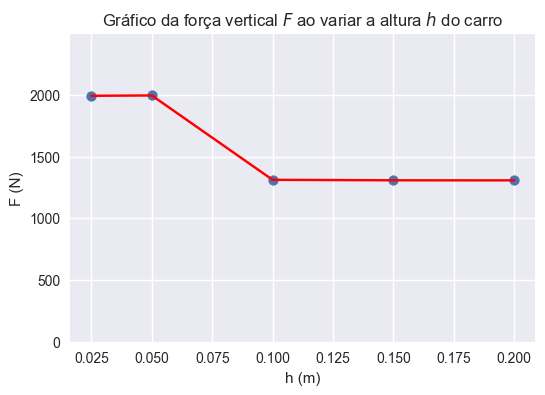

In [438]:
hx = [0.025, 0.05, 0.1, 0.15, 0.2]
Fh = [F_R4, F_R2, F_R1, F_R, F_R3]

plt.figure(figsize = ((6, 4)))
plt.scatter(hx, Fh)
plt.plot(hx, Fh, 'red')
plt.xlabel('h (m)')
plt.ylabel('F (N)')
plt.title(r'Gráfico da força vertical $F$ ao variar a altura $h$ do carro')
plt.ylim(0, np.max(Fh)+500) 
plt.show()

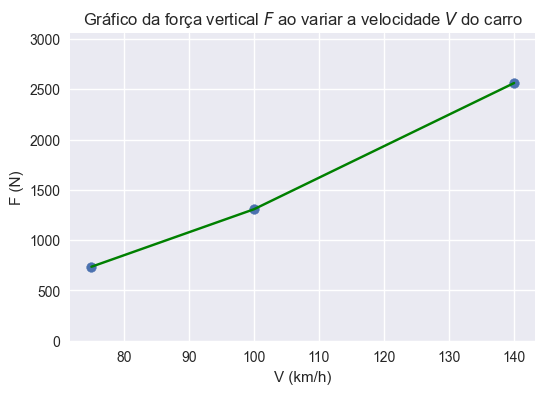

In [439]:
vx = [75, 100, 140]
Fv = [F_R5, F_R, F_R6]

plt.figure(figsize = ((6, 4)))
plt.scatter(vx, Fv)
plt.plot(vx, Fv, 'green')
plt.xlabel('V (km/h)')
plt.ylabel('F (N)')
plt.title(r'Gráfico da força vertical $F$ ao variar a velocidade $V$ do carro')
plt.ylim(0, np.max(Fv)+500) 
plt.show()

#### $(d)$ Discuta brevemente os resultados obtidos. Quais as correlações entre as forças e a variação dos parâmetros?

#### Variação da altura $h$

A força de lift é a força vertical para cima que atua em um objeto, como um carro, quando o fluxo de ar ao redor dele é acelerado. Essa força é gerada devido às diferenças de pressão entre a parte inferior e superior do veículo, conforme o ar flui sobre ele.

Quando o carro está mais alto, a forma como o ar flui ao redor dele pode mudar. Em particular, quando incrementa-se $h$, a área frontal efetiva do carro aumenta, o que aumenta a resistência do ar. Além disso, a mudança na geometria do veículo pode criar turbulência ou redirecionar o fluxo de ar, causando uma redução na pressão na parte superior do carro.

Esses fatores podem resultar em uma redução da força de lift sobre o veículo. Em outras palavras, o carro pode experimentar menos sustentação vertical. Isso pode ter consequências para a estabilidade e o manuseio do veículo, especialmente em altas velocidades.

Isso é provado pelo gráfico **$F \textrm{ vs } h$** apresentado acima: há um intervalo em que o aumento da altura do carro não altera significativamente a força de lift, mas, a partir de um certo ponto, a variação é notável, com a força diminuindo em quase 50%. A partir daí, tem-se diferenças cada vez menores ao alterar a altura.

#### Variação da Velocidade $V$

A força de lift depende, de modo geral, da velocidade relativa entre o carro e o ar incidente. Sendo assim, uma alteração na velocidade do ar afeta proporcionalmente a força vertical.

Se a velocidade do vento aumentar, o módulo da velocidade relativa do ar em relação ao veículo também aumentará. Isso resultará em uma maior diferença de pressão entre a parte inferior e superior do carro, o que levará a um aumento na força vertical de lift. Em outras palavras, o carro experimentará uma maior sustentação vertical.

Por outro lado, se a velocidade do vento diminuir, a velocidade relativa do ar em relação ao veículo também diminuirá, e então o efeito contrário é observado. A diferença de pressão será menor e, consequentemente, força vertical também será. Com isso, o carro terá menos sustentação vertical do que quando submetido a um escoamento de maior velocidade.

É exatamente isso que o gráfico $F \textrm{ vs } V$ mostra: uma curva monotônica crescente. O ponto base foi o intermediário, e, quando diminuiu-se a velocidade, a força também foi reduzida. Quando aumentou-se a velocidade, a força aumentou de forma correspondente. 